# Classical Sound Source Localization Algorithms in the Spherical Harmonic Domain

**Date**: 2023/11/5

**Author**: Gavin

Welcome to this tutorial, where we will delve into the technology of sound source localization in the spherical harmonic domain. First, we will introduce beamforming methods in detail, covering technologies such as PWD, DAS, and MVDR. Then, we will turn to subspace algorithms, exploring the frequency domain MUSIC and spherical harmonic domain SHMUSIC. In the final part of the tutorial, we will use the SHMLE method based on maximum likelihood estimation to estimate the Direction of Arrival (DoA) in a room. To comprehensively evaluate the performance of these algorithms, we have specially designed a series of experiments, examining the impact of different parameters such as broadband and narrowband signals, the number of microphones, the number of arrays, signal-to-noise ratio, and reverberation time on the results.

First, we will introduce several key library functions that we mainly use, then describe the problem and the simulation methods we adopt. We hope that by the end of this tutorial, you will have an understanding of sound source localization in the spherical harmonic domain.

The main contents of this notebook are as follows:

    1. Import Libraries and Modules
    2. What is Sound Source Localization
    3. Conducting Simulations
    4. Results and Conclusion

You can just feel free to have a try on Colab: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alexandergwm/Classical-Sound-Source-Localization-Algorithms-in-Spherical-Domain/blob/main/ENG_%20Sound%20Source%20Localization%20in%20Spherical%20Domain%20copy.ipynb)

Note: Processing on broadband signals will be slow, if there is no error message, please be patient and have fun!

In [ ]:
### If running in Colab, please run this section.
!git clone https://github.com/alexandergwm/Classical-Sound-Source-Localization-Algorithms-in-Spherical-Domain.git
!pip install pyroomacoustics


## Importing Libraries and Modules

This tutorial assumes the reader has some foundational knowledge in Python, array signal processing, and acoustics.

In Python, we can expand the functionality of the language by importing packages and modules. For example, we can perform efficient computational operations on arrays and matrices by importing libraries like "numpy". The numpy library provides a rich set of mathematical functions and advanced data structures, making it highly suitable for handling multidimensional arrays and matrices. For sound source localization technology, such computational capabilities are crucial.

For instance, we can use numpy to create and manipulate arrays, perform linear algebra operations, conduct Fourier transforms, and more. To better understand and apply the algorithms discussed in this tutorial, readers are recommended to familiarize themselves with the basic features and operations of numpy.

In subsequent chapters, we might also use other libraries like scipy for more complex signal processing tasks, or matplotlib for data visualization. These libraries, along with numpy, form a powerful toolkit for scientific computation and data analysis in Python. Therefore, a basic understanding of these libraries will help readers follow the content of this tutorial more smoothly.

---

### Main Libraries Used in This Tutorial and Their Versions:

- **Python**: 
  - **Version**: 3.8.10

- **os**: 
  - **Explanation**: os is a module in Python's standard library that provides methods and functions for interacting with the operating system. This module includes many functions such as file and directory operations (creating, deleting, renaming), obtaining system information, handling environmental variables, etc.

- **numpy**: 
  - **Version**: 1.21.5
  - **Explanation**: Numpy is the fundamental package for scientific computing in Python. It includes powerful N-dimensional array objects, complex functions, tools for integrating C/C++ and Fortran code, linear algebra, Fourier transform, and random number capabilities.

- **pyroomacoustics**: 
  - **Version**: 0.7.2
  - **Explanation**: Pyroomacoustics is a Python library dedicated to audio signal processing and indoor acoustics research. It provides useful tools for tasks such as sound echoes, microphone array signal processing, and sound source localization.

- **matplotlib**: 
  - **Version**: 3.5.1
  - **Explanation**: Matplotlib is a plotting library for Python, used for creating static, dynamic, and interactive visualizations. It can draw various charts such as histograms, scatter plots, line charts, etc., and is very useful for data analysis and presentation.

- **soundfile**: 
  - **Version**: 0.12.1
  - **Explanation**: SoundFile is a Python library for reading and writing sound files, like WAV, FLAC, and OGG. It offers a simple and easy-to-use API, convenient for handling audio data in sound source localization tasks.

- **scipy**:
  - **Version**: 1.9.1
  - **Explanation**: SciPy is an open-source Python library based on Numpy, used for advanced computing. It contains many modules for mathematical, scientific, and engineering calculations.
  - **Featured Module - special**: `special` is a submodule of SciPy containing many special mathematical functions such as Bessel functions, Legendre functions, etc., which are very useful for calculations in the spherical harmonic domain.

---

### Core Modules Used in This Tutorial:

The following modules primarily consist of a series of functions written or compiled by the author, playing a key role in the implementation of algorithms in this tutorial:

**tools**:
- **Description**: The tools module includes a series of computation-related functions involved in this tutorial, with details provided in the comments of each function.

**MicrophoneArray**:
- **Description**: The MicrophoneArray module contains several classes of spherical microphone arrays with different numbers.

**plot_tools**:
- **Description**: The plot_tools module includes all the visualization functions used in this tutorial, with details provided in the comments of each function.

---


For knowledge related to microphone arrays and signal processing in the spherical harmonic domain, you can refer to this book: [Fundamentals of Spherical Array Processing](https://link.springer.com/book/10.1007/978-3-662-45664-4).

Modify the working directory

In [1]:
import os
print(os.getcwd())
os.chdir('/content/Classical-Sound-Source-Localization-Algorithms-in-Spherical-Domain')
print(os.getcwd())

d:\Coderlife\SSL in spherical domain
D:\Coderlife\SSL in spherical domain


Importing libraries and modules

In [2]:
# Import libraries
import numpy as np
import pyroomacoustics as pra
import matplotlib.pyplot as plt
import soundfile as sf
import MicrophoneArray
import plot_tools
from tools import cart2sph, sph2cart, soundread, cart2sph
from plot_tools import plot_microphone, plot_wave, plot_stft
from plot_tools import verify_shapeofArray
from scipy.io import wavfile
from tools import setRoom_multi



In this tutorial, we primarily use the Eigenmike 32-channel spherical microphone array produced by MHACOUSTICS. The distinctive feature of this array is its radius of 4.2 cm, and its microphone layout can be considered as a uniformly sampled distribution on a rigid spherical shell.

In the next section of code, we will import the microphone array information by calling the MicrophoneArray module. This includes the name of the microphone array, the array structure, the pitch angle $\theta$ and azimuth angle $\phi$ of each microphone relative to the array center as the origin of the spherical coordinate system, the array radius, sampling weight, number of microphones, and directionality.

![Alt text](image-1.png)

In the MicrophoneArray file, several classes are defined, including a cubic array composed of 8 microphones, an array with 16 uniformly distributed microphones, and the spherical array of 32 uniformly distributed microphones used in this tutorial. These can be modified as needed.

In [3]:
MicArray32 = MicrophoneArray.EigenmikeEM32()
name = MicArray32.getname()
array_type = MicArray32.gettype()
thetas = MicArray32._thetas
phis = MicArray32._phis
radius = MicArray32._radius
weights = MicArray32._weights
num_elements = MicArray32._numelements
directivity = MicArray32._directivity

# Initialize the list of mic_position in spherical harmonic domain
mic_pos_sph = []

# for each theta and phi, create a new coordinate which contains all parameters
# to the list of mic_pos
for theta, phi in zip(thetas, phis):
    mic_pos_sph.append([radius, theta, phi])
mic_pos_sph = np.array(mic_pos_sph)
print("Name:", name)
print("Array Type:", array_type)
print("Thetas:", thetas)
print("Phis:", phis)
print("Radius:", radius)
print("Weights:", weights)
print("Number of Elements:", num_elements)
print("Directivity:", directivity)

Name: Eigenmike 32
Array Type: Rigid Spherical
Thetas: [1.20427718 1.57079633 1.93731547 1.57079633 0.55850536 0.95993109
 1.57079633 2.18166156 2.58308729 2.18166156 1.57079633 0.95993109
 0.36651914 1.01229097 2.11184839 2.77507351 1.20427718 1.57079633
 1.93731547 1.57079633 0.55850536 0.95993109 1.57079633 2.18166156
 2.58308729 2.18166156 1.57079633 0.95993109 0.36651914 1.01229097
 2.12930169 2.77507351]
Phis: [0.         0.55850536 0.         5.72467995 0.         0.78539816
 1.20427718 0.78539816 0.         5.49778714 5.07890812 5.49778714
 1.58824962 1.57079633 1.57079633 1.55334303 3.14159265 3.70009801
 3.14159265 2.58308729 3.14159265 3.92699082 4.34586984 3.92699082
 3.14159265 2.35619449 1.93731547 2.35619449 4.69493569 4.71238898
 4.71238898 4.72984227]
Radius: 0.042
Weights: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
Number of Elements: 32
Directivity: Omni


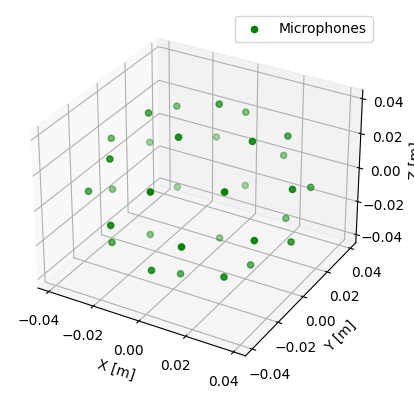

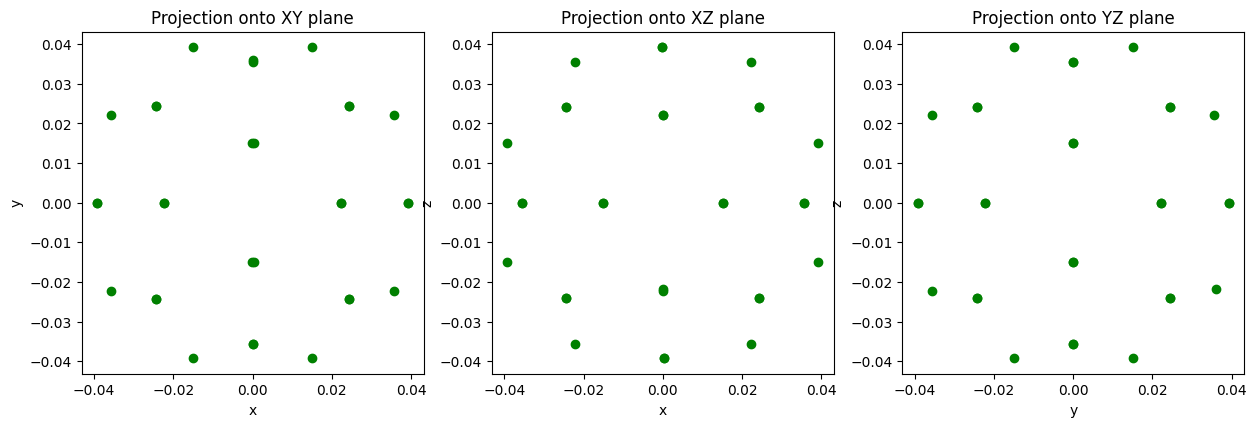

In [4]:
mic_pos_car = [sph2cart(r, theta, phi) for r, theta, phi in mic_pos_sph]
mic_pos_car = np.array(mic_pos_car)

plot_microphone(mic_pos_car)
verify_shapeofArray(mic_pos_car)


### Principles of Sound Source Localization in the Spherical Harmonic Domain

In this section, we mainly introduce the principles of sound source localization in the spherical harmonic domain, where several important basic concepts need to be mentioned first.

**Spherical Harmonic Representation**:

Functions defined on the unit sphere can be represented using spherical harmonic functions as basis functions:
$$
f ( \theta , \phi ) = \sum _ { n = 0 } ^ { \infty } \sum _ { m = - n } ^ { n } f_{nm} Y _ { n } ^ { m } ( \theta , \phi ) \tag{1}
$$

Here, $\theta$ and $\phi$ represent the pitch and azimuth angles, respectively.

The expression for the spherical harmonic basis functions is as follows:

\begin{equation}
Y_n^m (\theta,\phi) = \sqrt{\frac{2n+1}{4\pi}\frac{(n-m)!}{(n+m)!}}p_n^m(cos\theta)e^{im\phi} \tag{2}
\end{equation}

Here, $n \geq 0$ is the order of the spherical harmonic domain, $m \leq |n|$ is the degree of the spherical harmonic domain, $p_n^m(\theta, \phi)$ is the associated Legendre function, and $f_{nm}$ are the spherical harmonic coefficients, which are extracted from the sampled data through spherical harmonic Fourier transform:

\begin{equation}
f _ { n m } = \int _ { 0 } ^ { 2 \pi } \int _ { 0 } ^ { \pi } f ( \theta ,\phi) [ Y _ { n } ^ { m } ( \theta , \phi ) ] ^ { * } \sin \theta d \theta d \theta  \tag{3}
\end{equation}

This can also be described as **the projection of the function $f(\theta,\phi)$ onto the spherical function basis is called Spherical Harmonic Decomposition (SHD)**, and the SHD function uses several non-zero SHD coefficients to provide an approximate representation of functions and distributions on the sphere. For example, in this tutorial, we can use 25 spherical harmonic coefficients to represent the data collected by 32 channels of microphones. The following figure is a spherical map of the spherical harmonic basis functions for $n \leq 4$.

<p align="center">
  <img src="image.png" alt="Spherical Harmonic Basis Functions"/>
</p>

From the above formulas, it can be seen that if we know the pressure distribution at various points on the sphere, we can directly obtain the corresponding SHD coefficients. However, in practice, we can only sample the pressure on the sphere at a finite number of points. If the pressure is sampled at $Q \geq (N+1)^2$ discrete points $(\theta_q, \phi_q)$ to avoid aliasing, it can be approximated by summation, where $Q$ represents the number of microphones in the microphone array, and $N$ represents the maximum order of the spherical harmonic expansion.

\begin{equation}
p_{nm}(k) = \sum_{q=1}^{Q} w_q p(\theta_q, \phi_q, k)[Y_n^m(\theta_q,\phi_q)]^*  \tag{4}
\end{equation}

Here, $w_q$ are the orthogonal weights, ensuring that the sum is an effective approximation. If the sampling scheme is orthogonal, these weights will make the discrete spherical harmonic expansion close to the true continuous spherical harmonic expansion. (Here, the orthogonality of the sampling scheme means that at these sampling points, the spherical harmonic functions satisfy some orthogonality relation, such as for uniformly distributed spherical arrays, where:
\begin{equation}
\frac{4\pi}{Q}j Y^H(\theta,\phi)Y(\theta,\phi) = I_{(N+1)^2}  \tag{5}
\end{equation}

**Plane Wave Assumption**:

When the distance between the sound source and the microphone array is sufficiently far, it can be assumed that the sound waves emitted by the source have transformed into plane waves by the time they reach the microphone array. In this case, all wave fronts of the sound wave are parallel and propagate in the same direction.

Here, we assume that the sound field consists of $L$ plane waves, with the DOA (Direction of Arrival) of the $l$th plane wave being $\Psi_l = (\theta_l, \phi_l) (l=1,2,...,L)$, $s_l(k)$ as its amplitude, and $k$ representing the wavenumber

. Using a uniformly distributed spherical array of $Q$ elements with a radius of $a$, $\Omega_q = (\theta_q, \phi_q)$ as the spatial position of the $q$th microphone.

Then, for a plane wave incident at angle $\Psi_l$, the sound pressure at the $q$th microphone can be expressed as:

\begin{equation}
p(kr,\Omega_q) = \sum_{l=1}^{L}s_l(k)e^{i\boldsymbol{k}_l^T \boldsymbol{r}_q} \approx \sum_{l=1}^{L}s_l(k) \sum_{n=0}^{N}\sum_{m=-n}^{n}b_n(kr)Y_{n,m}^*(\Psi_l) Y_{n,m}(\Omega_q)   \tag{6}
\end{equation}

Here, $\boldsymbol{k}_l = -k(\cos\phi_l \sin\theta_l, \sin\phi_l \sin\theta_l, \cos\theta_l)^T$ is the wave vector of the plane wave, and $\boldsymbol{r}_q = r(\cos \phi_q \sin \theta_q, \sin \phi_q \sin \theta_q, \cos \theta_q)^T$ is the Cartesian coordinate of the $q$th microphone. $b_n(kr)$ is a function related to the structure of the spherical array, also known as the radiation function, given by:
\begin{equation}
b_n(kr) =
\begin{cases}
4\pi i^n \left[ j_n(kr) - \frac{j_n'(ka)}{h_n'(ka)} h_n(kr) \right], & \text{Rigid Sphere} \\
4\pi i^n j_n (kr), & \text{Hollow Sphere}    \tag{7}
\end{cases}
\end{equation}
Here, $j_n(\cdot)$ and $h_n(\cdot)$ respectively represent the spherical Bessel function and the spherical Hankel function.

**Spatial Search**

All the sound source localization algorithms in this tutorial are based on the on-grid principle. Generally, it involves searching the entire space to find the direction of the sound source that best matches the actual measured data, such as beamforming technology, which strengthens the signal from a certain direction through spatial filtering, thereby suppressing signals from other directions.

### Set DoA
Assuming that the direction of the sound source is coming from (50,230), we consider both rigid-sphere and open-sphere scenarios.

In [5]:
Theta_l = 50/180 * np.pi
Phi_l = 230/180 * np.pi


### What is Beamforming

From a definitional standpoint, when we use a microphone array, we aim to enhance the signals coming from a specific direction through algorithmic processing and attenuate signals from other directions, thus forming a spatial or directional filter. This type of filter is known as a beamformer. When assessing the performance of an array, two commonly used metrics are the directivity index and the White Noise Gain (WNG). We derive these from the spatial domain.

Intuitively, when we process signals using an array, the goal is to obtain a filter that selects the signals we want and discards the unwanted ones. Consider a weighting function $[w(k,\theta,\phi)]^*$ multiplied by the pressure function $p(k,r,\theta,\phi)$, which gives us the desired output $y$. However, theoretically, we need to integrate over the entire surface of the sphere, expressed as follows:

\begin{equation}
y = \int_{0}^{2\pi} \int_{0}^{\pi} [w(k,\theta,\phi)]^* p(k,r,\theta,\phi) sin\theta d\theta d\phi  \tag{8}
\end{equation}
In our example, we use a spherical microphone array composed of $Q$ microphones, where the pressure collected by microphone $q$ at wavenumber $k$ is represented by $p_q(k) = p(k,r,\theta_q,\phi_q)$. Therefore, we obtain a $Q \times 1$ vector representing the amplitude of the pressure:

\begin{equation}
\boldsymbol{p} = [p_1(k),p_2(k),...,p_Q(k)]^T  \tag{9}
\end{equation}

The discrete representation of the filter coefficients is naturally considered. For microphone $q$, there is a coefficient $w_q(k)$:

\begin{equation}
\boldsymbol{w} = [w_1(k), w_2(k), ...,w_Q(k)]^T \tag{10}
\end{equation}

Combining these, we can obtain the traditional expression of array output in the spatial domain:

\begin{equation}
y = \boldsymbol{w}^H \boldsymbol{p}    \tag{11}
\end{equation}
However, here, we cannot directly equate the discrete form of output with the previous continuous form because the discrete form must consider the impact of spatial sampling.

We start the derivation from a simple case, assuming that the array input of the sound field consists of a single-frequency unit amplitude plane wave. In this case, we can introduce a steering vector or manifold vector to represent the measured pressure, which represents the amplitude of the plane wave measured at each microphone. For signals collected by pressure microphones in a free field, it has the following expression:

\begin{equation}
\boldsymbol{v} = [v_1, v_2, ..., v_Q]^T  \tag{12}
\end{equation}

Here, $v_q = e^{i \boldsymbol{\tilde{k}\cdot r}}， 1 \leq q \leq Q$, $\boldsymbol{\tilde{k}} = (k,\theta_k,\phi_k)$ represents the direction of arrival of the plane wave, and the position vector $\boldsymbol{r} = (r, \theta_q,\phi_q)$ represents the position of the $q$th microphone. The array output can then be written as:

\begin{equation}
y = \boldsymbol{w^H v}    \tag{13}
\end{equation}

Next, we consider deriving the array equation developed in the spatial domain in the spherical harmonic function domain. We use $p_{nm}(k)$ and $w_{nm}(k)$ to represent the Fourier coefficients of the pressure function and weight coefficients in the spherical domain, and use the orthogonality of spherical harmonic functions to estimate the integral. The array output in Equation (1) can be written as:
\begin{equation}
y = \sum_{n=0}^{N} \sum_{m=-n}^{n}[w_{nm}(k)]^* p_{nm}(k, r)   \tag{14}
\end{equation}

The above equation can be written in matrix form:
\begin{equation}
y = \boldsymbol{w_{nm}}^H \boldsymbol{v_{nm}}  \tag{15}
\end{equation}

Here, $\boldsymbol{v}_{nm}$ is a column vector of size $(N+1)^2 \times 1$, defined as:
\begin{equation}
\boldsymbol{v}_{nm} = [v_{00}, v_{1(-1)}, v_{11},...,
v_{NN}]^T \tag{16}
\end{equation}

Where $v_{nm}$ represents the array input of the plane wave sound field, coming from the sound pressure $p_{nm}$ of the unit amplitude plane wave. For different spherical structures, we have previously expressed this, rewritten here as:
\begin{equation}
v_{nm} = p_{nm}(k,r) = b_n(kr)[Y_n^m(\theta_k, \phi_k)]^*  \tag{17}
\end {equation}

The DoA of the plane wave here is $(\theta_k, \phi_k)$.

Then, to link discrete and continuous expressions, we introduce the effect of sampling, obtaining the relationship between the spherical harmonic domain vector $\boldsymbol{w}_{nm}$, $\boldsymbol{p}_{nm}$ and the spatial domain vector $\boldsymbol{w}$ and $\boldsymbol{p}$. For different sampling schemes, i.e., different distributions of microphones on the sphere, different orthogonal relationships are introduced. In our case, mainly considering uniform sampling, $\boldsymbol{w}_{nm} = \frac{4\pi}{Q} \boldsymbol{Y}^H \boldsymbol{w}$, substituting into the array output expression, we get:
\begin{equation}
y = \boldsymbol{w}^H[(\frac{4\pi}{Q})^2 \boldsymbol{YY^H}]\boldsymbol{p} \tag{18}
\end{equation}

So, the core is actually to obtain an optimal weight. Therefore, Meyer and Elko proposed a formula for weight $w_{nm}$. Because if we use the inverse spherical Fourier transform to obtain $w(\theta,\phi)$ from $w_{nm}$, the weight is a two-dimensional spatial domain function of $n$ and $m$. Their method can reduce the beamforming weight to a one-dimensional function, making the resulting beamforming map axisymmetric (along the observation direction):
\begin{equation} 
[w_{nm}(k)]^* = \frac{d_n(k)}{b_n(kr)} Y_n^m(\theta_l,\phi_l) \tag{19}
\end{equation}

The new beamforming weight $d_n(k)$ might be a function of frequency, only related to $n$, and thus can be viewed as one-dimensional. Dividing by $b_n(kr)$ ensures that the generated steering vector and beam pattern are not dependent on the physical behavior of the sound field caused by the array structure. $(\theta_l,\phi_l)$ is the observation direction of the array.
Substituting the frequency coefficients into the array output expression, we get:
\begin{equation}
y = \sum_{n=0}^{N} \sum_{m=-n}^{n}[w_{nm}(k)]^* p_{nm}(k, r) \
= \sum_{n=0}^{N} \frac{d_n(k)}{b_n(kr)} \sum_{m=-n}^{n}Y_n^m(\theta_l, \phi_l) p_{nm}(k, r) \tag{20}
\end{equation}
Then, substituting the expression of $p_{nm}(k,r)$ into the array output, we get:
\begin{equation}
y = \sum_{n=0}^{N} d_n(k) \sum_{m=-n}^n [Y_n^m(\theta_k, \phi_k)]^* Y_n^m(\theta_l,\phi_l)
 \\ = \sum_{n=0}^N d_n(k) \frac{2n + 1}{4\pi} P_n(cos\Theta)    \tag{21}
\end{equation} 

Here, using the additivity of spherical harmonic functions, we have:
\begin{equation}
cos\Theta = cos\theta_l cos\theta_k + cos(\phi_l - \phi_k) sin\theta_l sin\theta_k  \tag{22}
\end{equation}

The angle $\Theta$ is between $(\theta_l, \phi_l)$ and $(\theta_k,\phi_k)$.

Then, by defining a steering vector $\boldsymbol{v}_n$ and an array weight vector $\boldsymbol{d}_n$:
\begin{equation} 
y = \boldsymbol{d}_n^T \boldsymbol{v}_n \tag{23}
\end{equation}


\begin{equation}
\boldsymbol{v}_n = \frac{1}{4\pi}[P_0(\cos\Theta), 3P_1(\cos\Theta), ..., (2N+1)P_N(\cos\Theta)]^T  \tag{24}
\end{equation}

\begin{equation}
\boldsymbol{d}_n = [d_0, d_1,...,d_N]^T  \tag{25}
\end{equation}


Now, it can also be said that the array weight $d_n$ controls the output $y(\Theta)$, which is the beam pattern of the array, and can also be considered as the array's response to a unit amplitude plane wave. The output $y$ depends on $\Theta$. Typically, $y(\Theta)$ peaks at $\Theta = 0$, meaning that a plane wave arriving from this direction receives the highest amplification. This direction is often considered the direction of greatest interest. Now, by changing the values of $(\theta_l, \phi_l)$, the function $y(\Theta)$ itself does not change, but it will be selected or steered to make $\Theta = 0$ coincide with $(\theta_l,\phi_l)$.


### How to Measure Array Performance? Directivity Index and White Noise Gain

#### Directivity Index (DI)
The array output $y$, responding to a unit amplitude plane wave, is represented as defining the directivity or beam pattern of the array. The scalar quantifying the array's directivity is the directivity index, which provides a measure of the ratio between the peak and the average of the squared beam pattern, defined as the Directivity Factor (DF):
\begin{equation}
DF = \frac{|y(\theta_l,\phi_l)|^2}{\frac{1}{4\pi}\int_{0}^{2\pi} \int_{0}{\pi}|y(\theta,\phi)|^2 \sin\theta d\theta d\phi}  \tag{26}
\end{equation}

#### White Noise Gain (WNG)
White Noise Gain (WNG) is defined as a metric to measure the robustness of an array against the adverse effects of noise and uncertainty. It is defined as the improvement in the Signal-to-Noise Ratio (SNR) at the array output compared to the array input. In the spherical harmonic domain matrix form, it is expressed as:
\begin{equation}
WNG = \frac{\boldsymbol{d}_n^H \boldsymbol{A}\boldsymbol{d}_n}{\boldsymbol{d}_n^H \boldsymbol{B}\boldsymbol{d}_n}  \tag{27}
\end{equation}

\begin{equation}
\boldsymbol{A} = \boldsymbol{v_n}\boldsymbol{v_n}^H      \tag{28}
\end{equation}

\begin{equation}
\boldsymbol{B} =  \frac{4\pi}{Q} \text{diag}(\boldsymbol{v_n}) \times \text{diag}(|b_0|^{-2},|b_1|^{-2},...,|b_N|^{-2})    \tag{29}
\end{equation}  

\begin{equation}
\boldsymbol{v_n} = \frac{1}{4\pi}[1,3,5,...,2N+1]^T     \tag{30}
\end{equation}

#### Delay and Sum Beamformer (DAS)

This is a very classic and simple-to-implement beamformer. By applying different time delays to signals from each sensor, it ensures that signals from a specific direction are in phase when summed, thereby enhancing the signal from that direction while suppressing noise from other directions. Additionally, the DAS algorithm can provide the maximum White Noise Gain (WNG), offering the greatest robustness against noise and uncertainty. However, this method is only effective when plane waves propagate in a free field. Combining equations (19) and (16), we can derive the output formula for axisymmetric beamforming:
\begin{equation}
y = \sum_{n=0}^{N}\sum_{m=-n}^{n}[w_{nm}(k)]^*p_{nm}(k,r) = \sum_{n=0}^{N}\sum_{m=-n}^{n}d_n(k)Y_n^m(\theta_l,\phi_l)\frac{p_{nm}(k,r)}{b_n(kr)}   \tag{31}
\end{equation}

For the DAS algorithm here, the axisymmetric beamforming weight $d_n$ of the delay-and-sum beamformer is:
\begin{equation}
d_n(k) = |b_n(kr)|^2     \tag{32}
\end{equation}
Thus, the output of DAS is:
\begin{equation}
y = \sum_{n=0}^{N}\sum_{m=-n}^{n}|b_n(kr)|^2 a_{nm}(k)Y_n^m(\theta_l,\phi_l)   \tag{33}
\end{equation}

Now, the sound field measured by various array configurations can be used to calculate $a_{nm}(k)$. In the spherical microphone array configuration of this example, it satisfies $a_{nm}(k) = \boldsymbol{B}^{-1}(kr) \boldsymbol{p}_{nm}(kr)$.
Therefore, by combining these equations, we can obtain the cost function expression of DAS in matrix form:
\begin{equation}
J_{DAS}(\Psi) = 20 \log_{10} |(\boldsymbol{B}(kr)\boldsymbol{y}(\Psi)^*)^H \boldsymbol{p}_{nm}(kr)|   \tag{34}
\end{equation}

In [6]:
from tools import ssl_SHmethod, ssl_SHmethod_broad

source_pos: [[ 49]
 [230]]


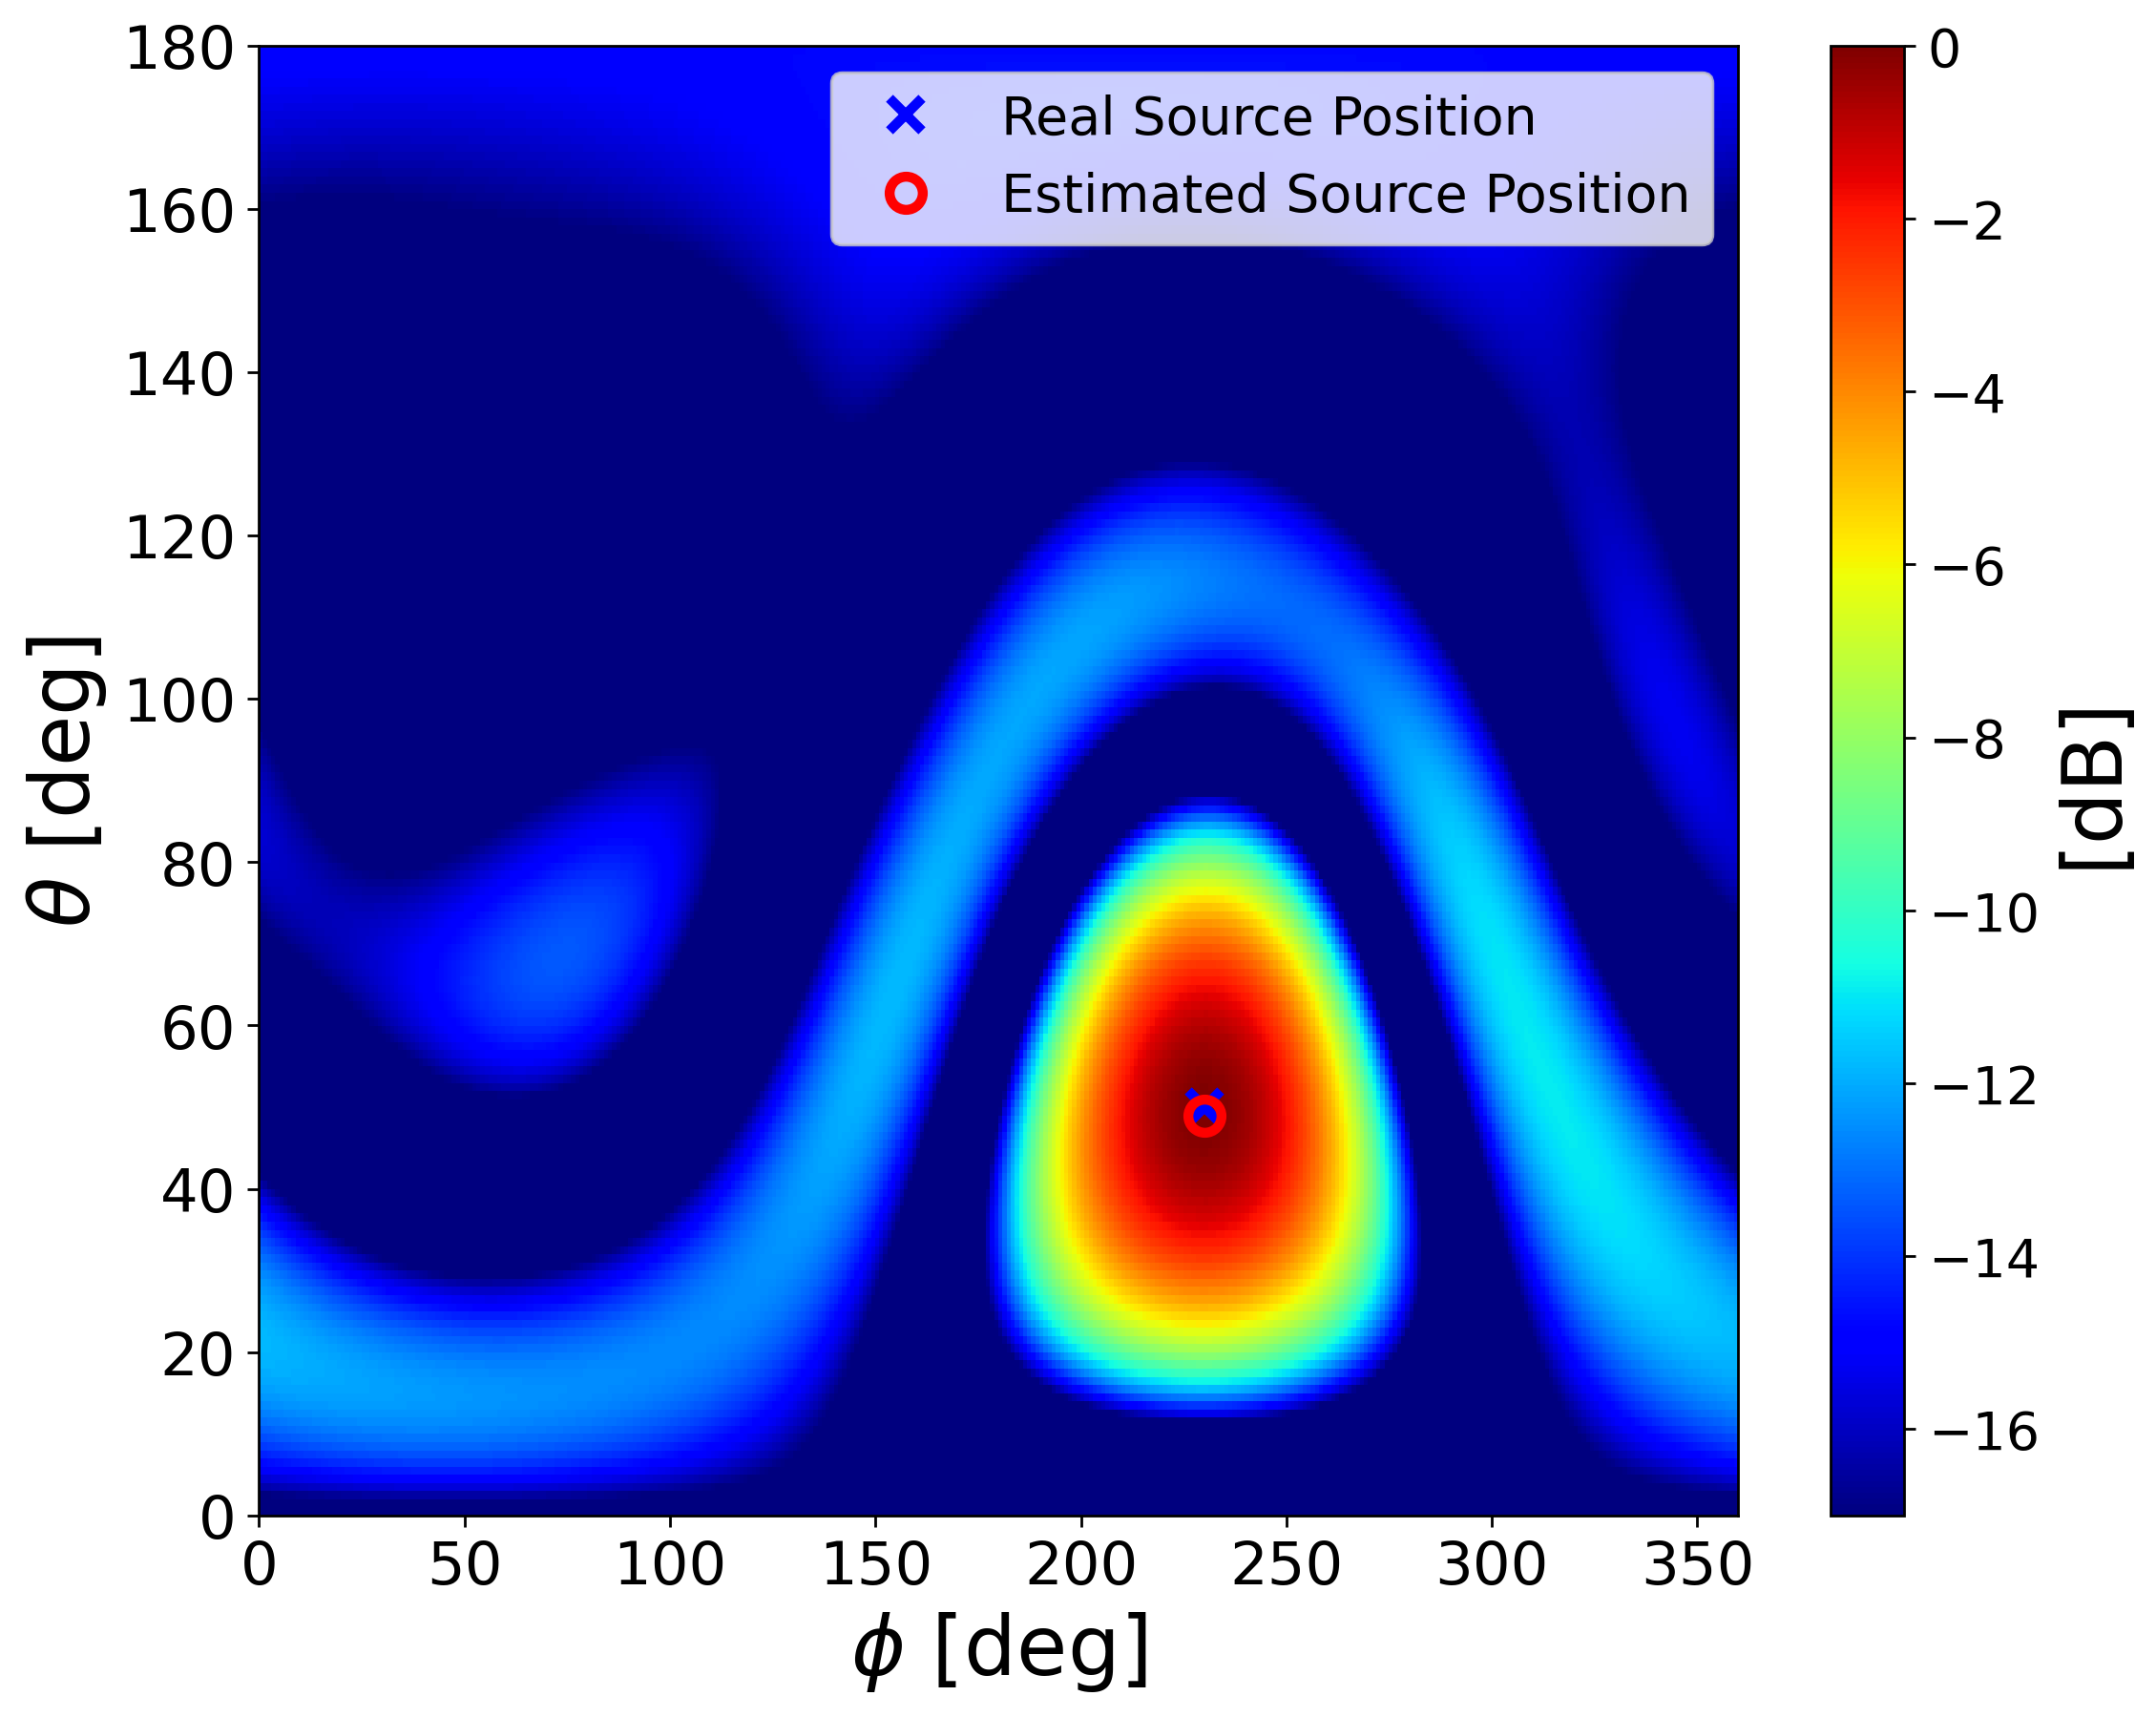

In [7]:
out_das_open, est_das_open = ssl_SHmethod(MicArray32, Theta_l, Phi_l, "DAS", "open", "2D")

source_pos: [[ 49]
 [231]]


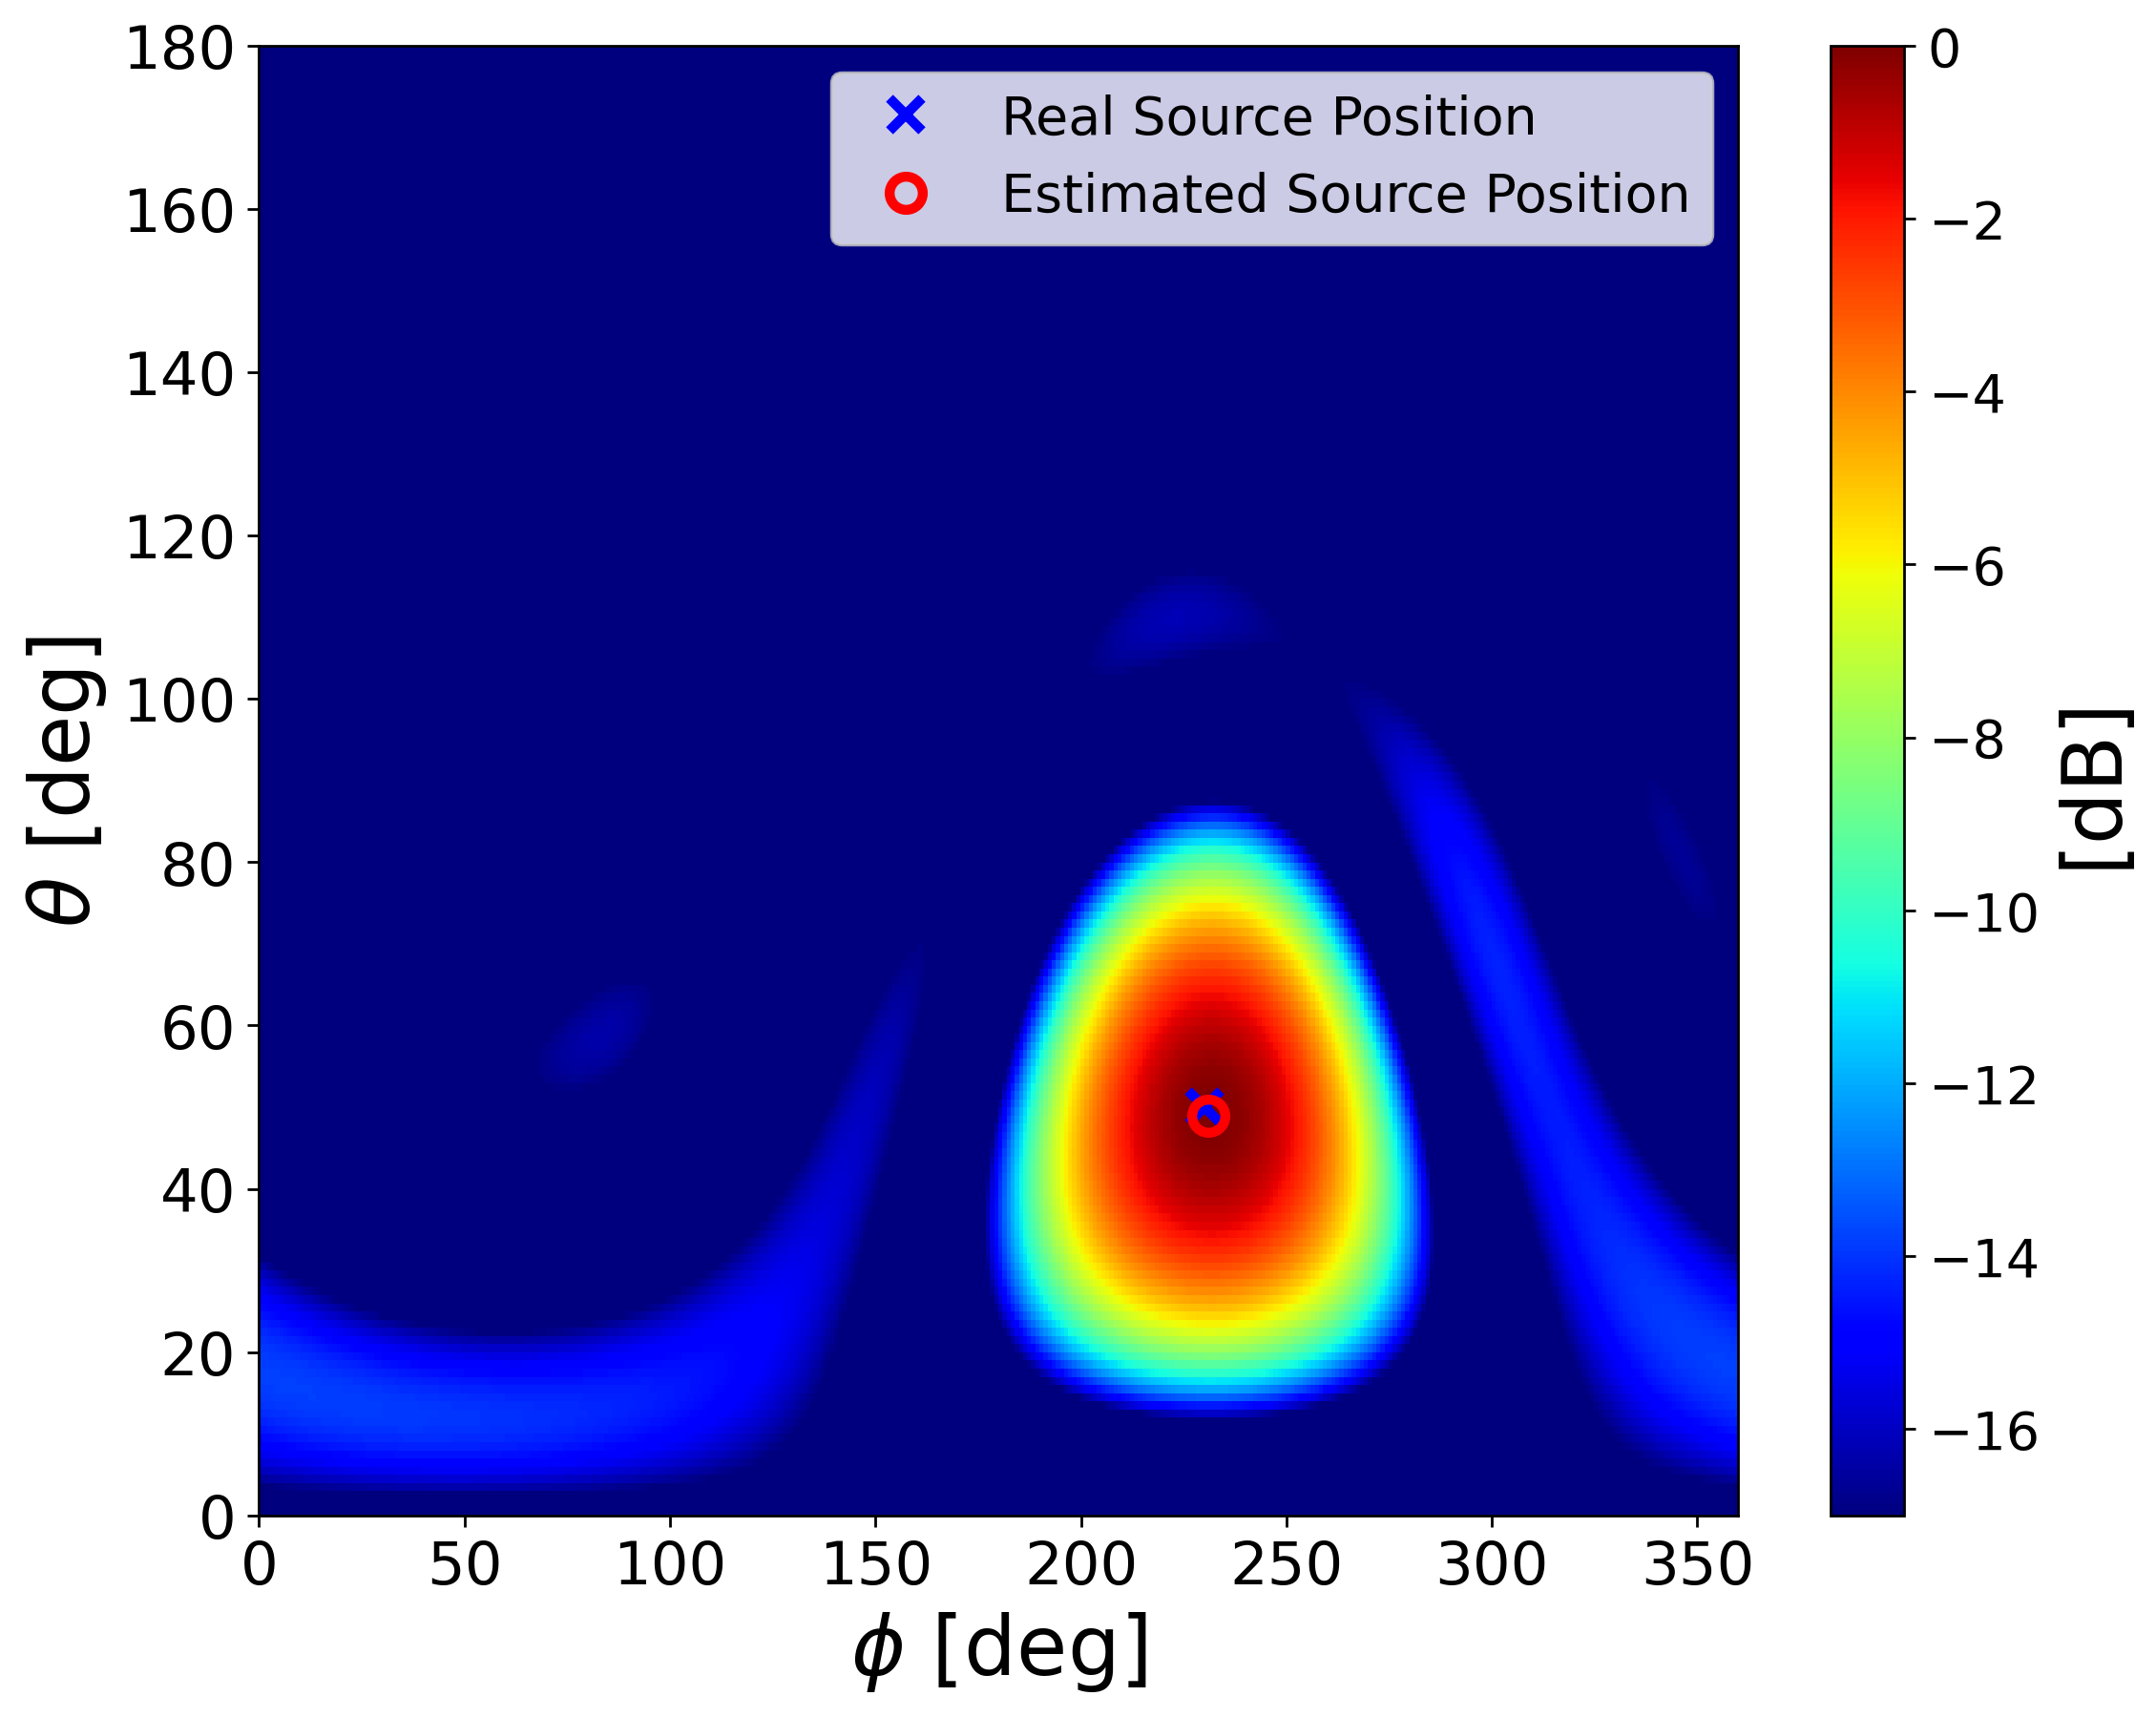

In [8]:
out_das_rigid, est_das_rigid = ssl_SHmethod(MicArray32, Theta_l, Phi_l, "DAS", "rigid", "2D")

#### Plane Wave Decomposition (PWD)
Next, if we consider the beamforming weights to have a unit amplitude, i.e., $d_n = 1$, the equation becomes:
\begin{equation} 
y = \sum_{n=0}^{N}\sum_{m=-n}^{n}[w_{nm}(k)]^*p_{nm}(k,r) = \sum_{n=0}^{N}\sum_{m=-n}^{n}a_{nm}(k)Y_n^m(\theta_l,\phi_l) \approx a(k,\theta_l,\phi_l)    \tag{35}
\end{equation} 
Therefore, the cost function for the single-frequency PWD algorithm is:
\begin{equation}
J_{PWD}(\Psi) = 20log_{10}|\boldsymbol{y}(\Psi)^T \boldsymbol{a}_{\boldsymbol{nm}}(k)|
\end{equation}
Here, the approximation symbol becomes an equal sign as $N$ approaches infinity. This result indicates that the array output $y$, as a function of the observation direction, approximates the plane wave amplitude density function. Thus, in this case, the sound field measured by the array can be represented using plane wave components, hence the term "Plane Wave Decomposition" beamformer.

From the results below, it can be seen that the PWD algorithm cannot achieve localization in the open-sphere case. This is because its loss function involves dividing by the radiation function $b_n(kr)$, which presents a zero-point problem at some frequencies in the open-sphere structure due to the spherical Hankel function. The rigid-sphere structure can overcome these issues by introducing scattering. The amplitude results are shown in the following figure:

![Alt text](image-2.png)

Details can be found in:
[Sound-field analysis by plane-wave decomposition using spherical microphone array](https://scholar.google.com/citations?view_op=view_citation&hl=zh-CN&user=88DYI5cAAAAJ&citation_for_view=88DYI5cAAAAJ:9yKSN-GCB0IC)

[High-resolution plane-wave decomposition in an auditorium using a dual-radius scanning spherical microphone array](https://scholar.google.com/citations?view_op=view_citation&hl=zh-CN&user=88DYI5cAAAAJ&cstart=20&pagesize=80&citation_for_view=88DYI5cAAAAJ:WF5omc3nYNoC)

source_pos: [[123]
 [306]]


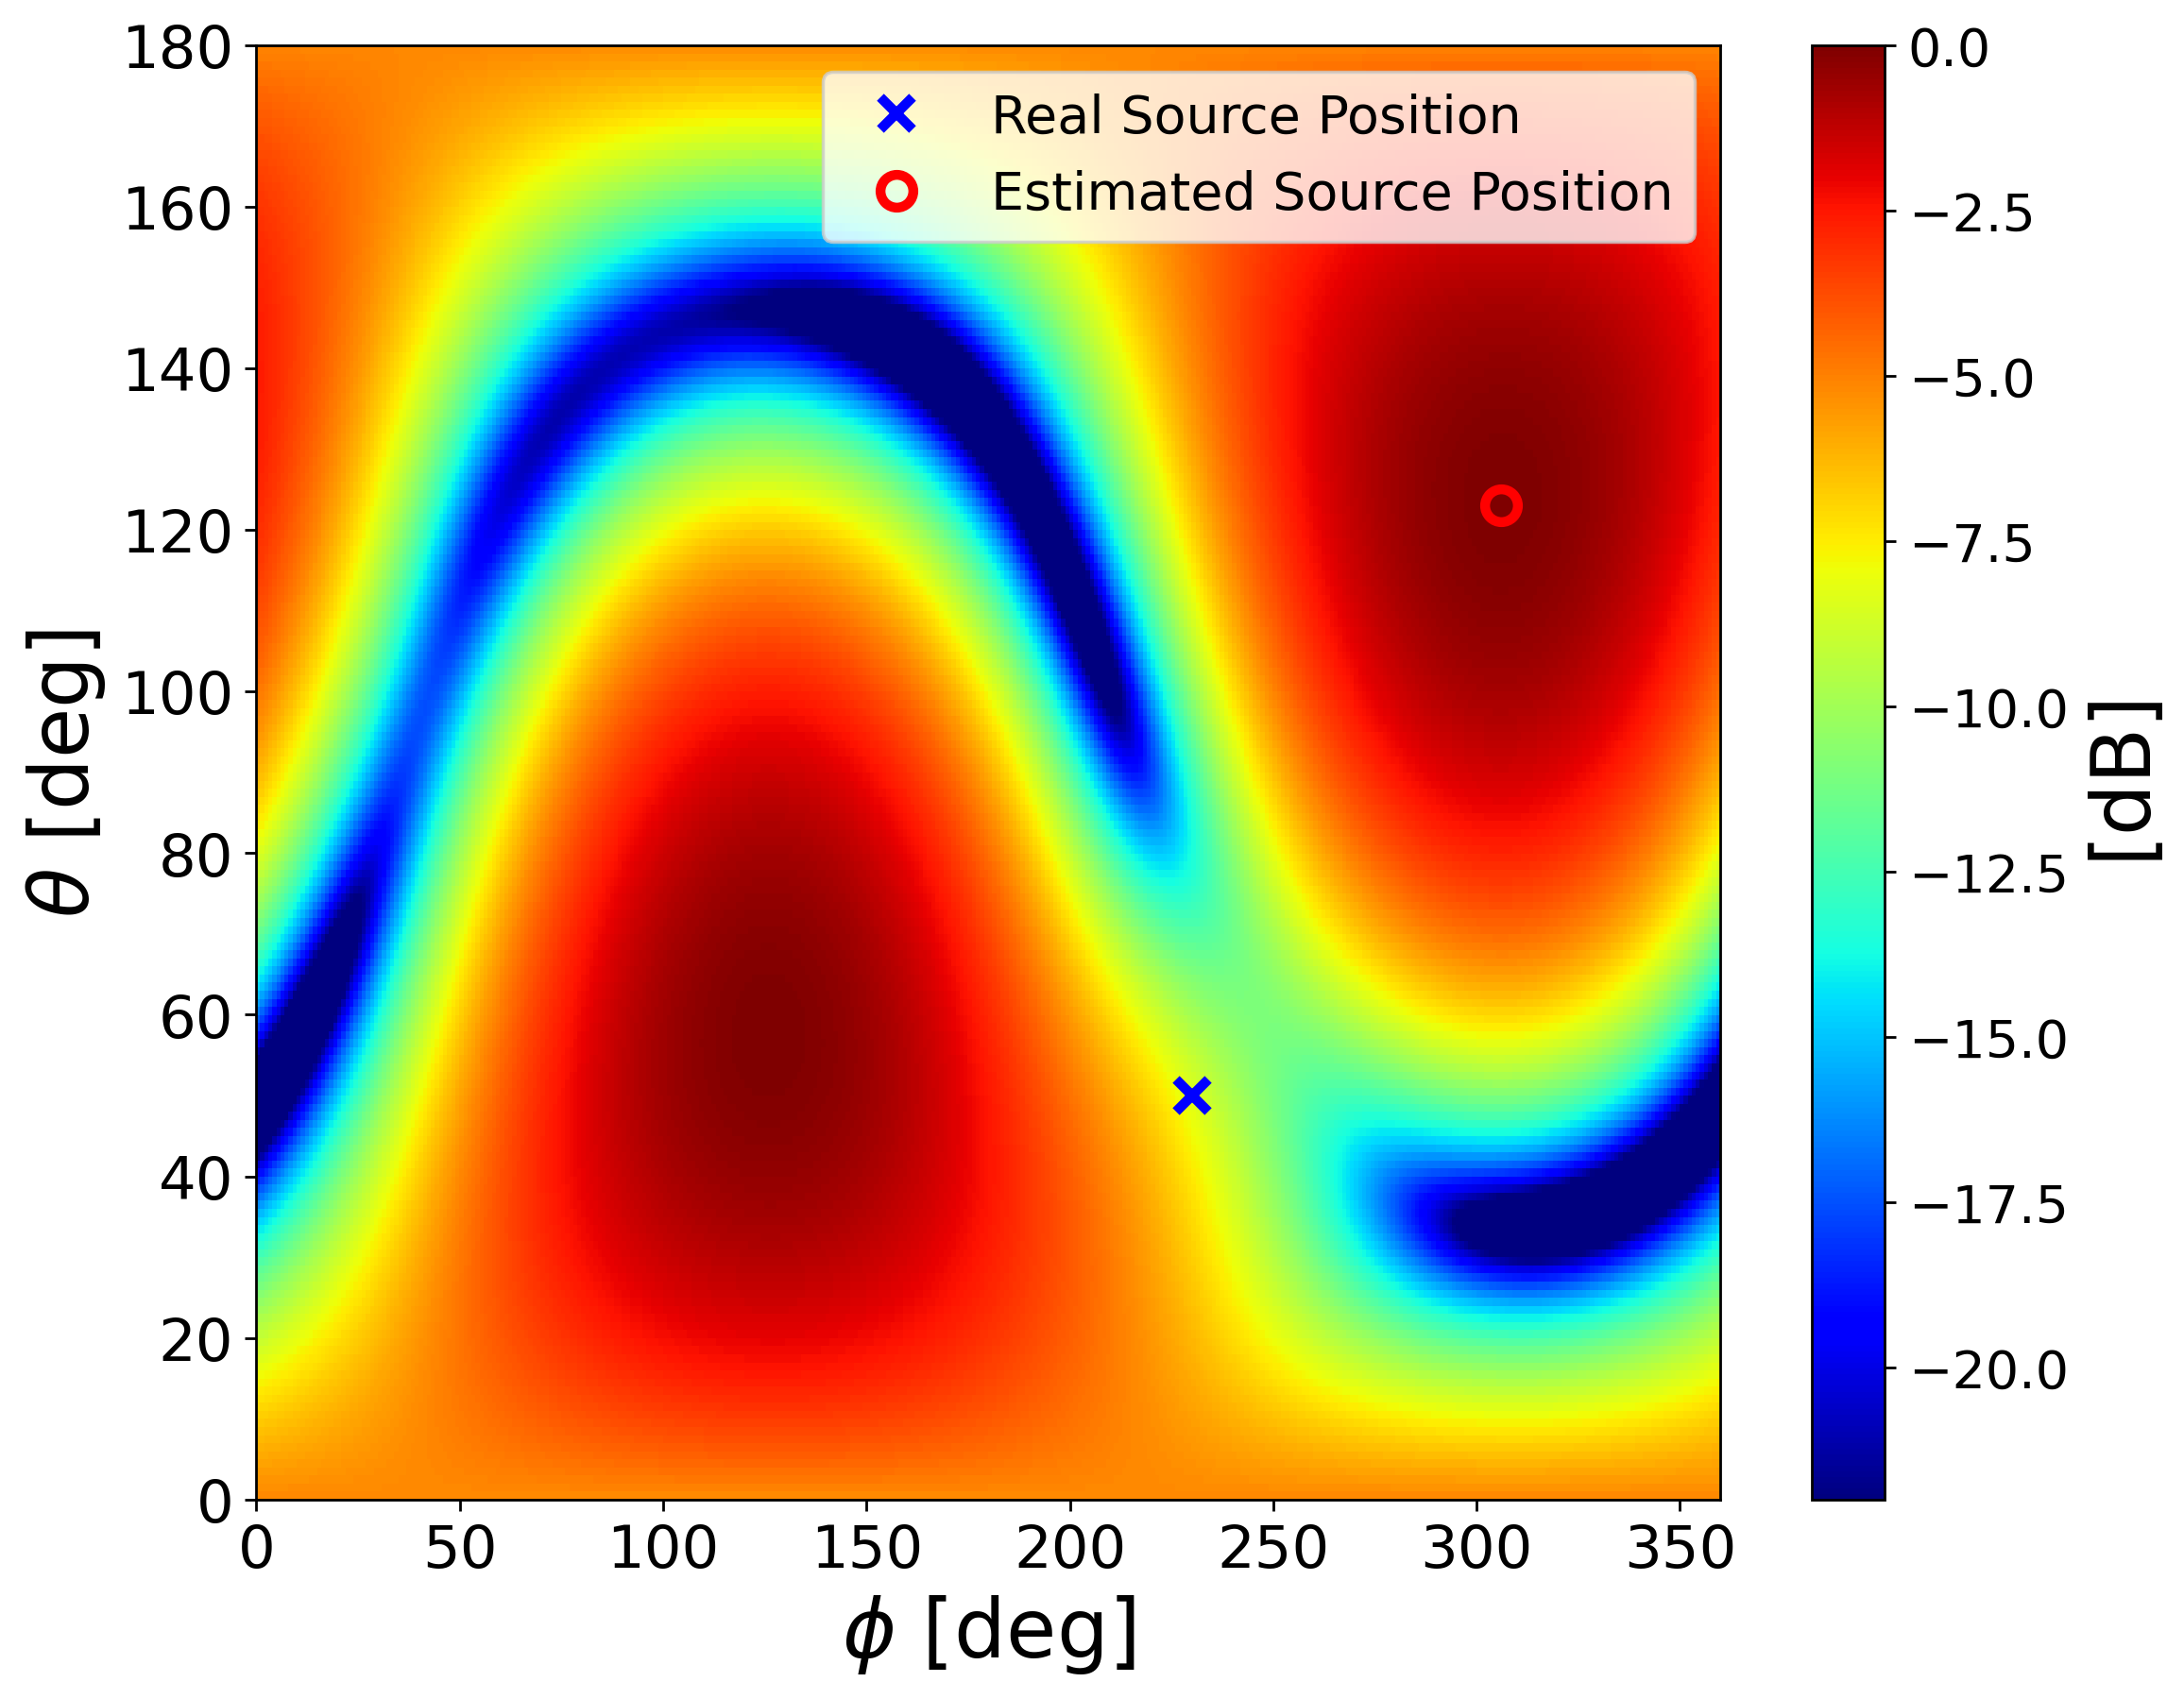

In [9]:
out_pwd_open, est_pwd_open = ssl_SHmethod(MicArray32, Theta_l, Phi_l, "PWD", "open", "2D")


source_pos: [[ 48]
 [231]]


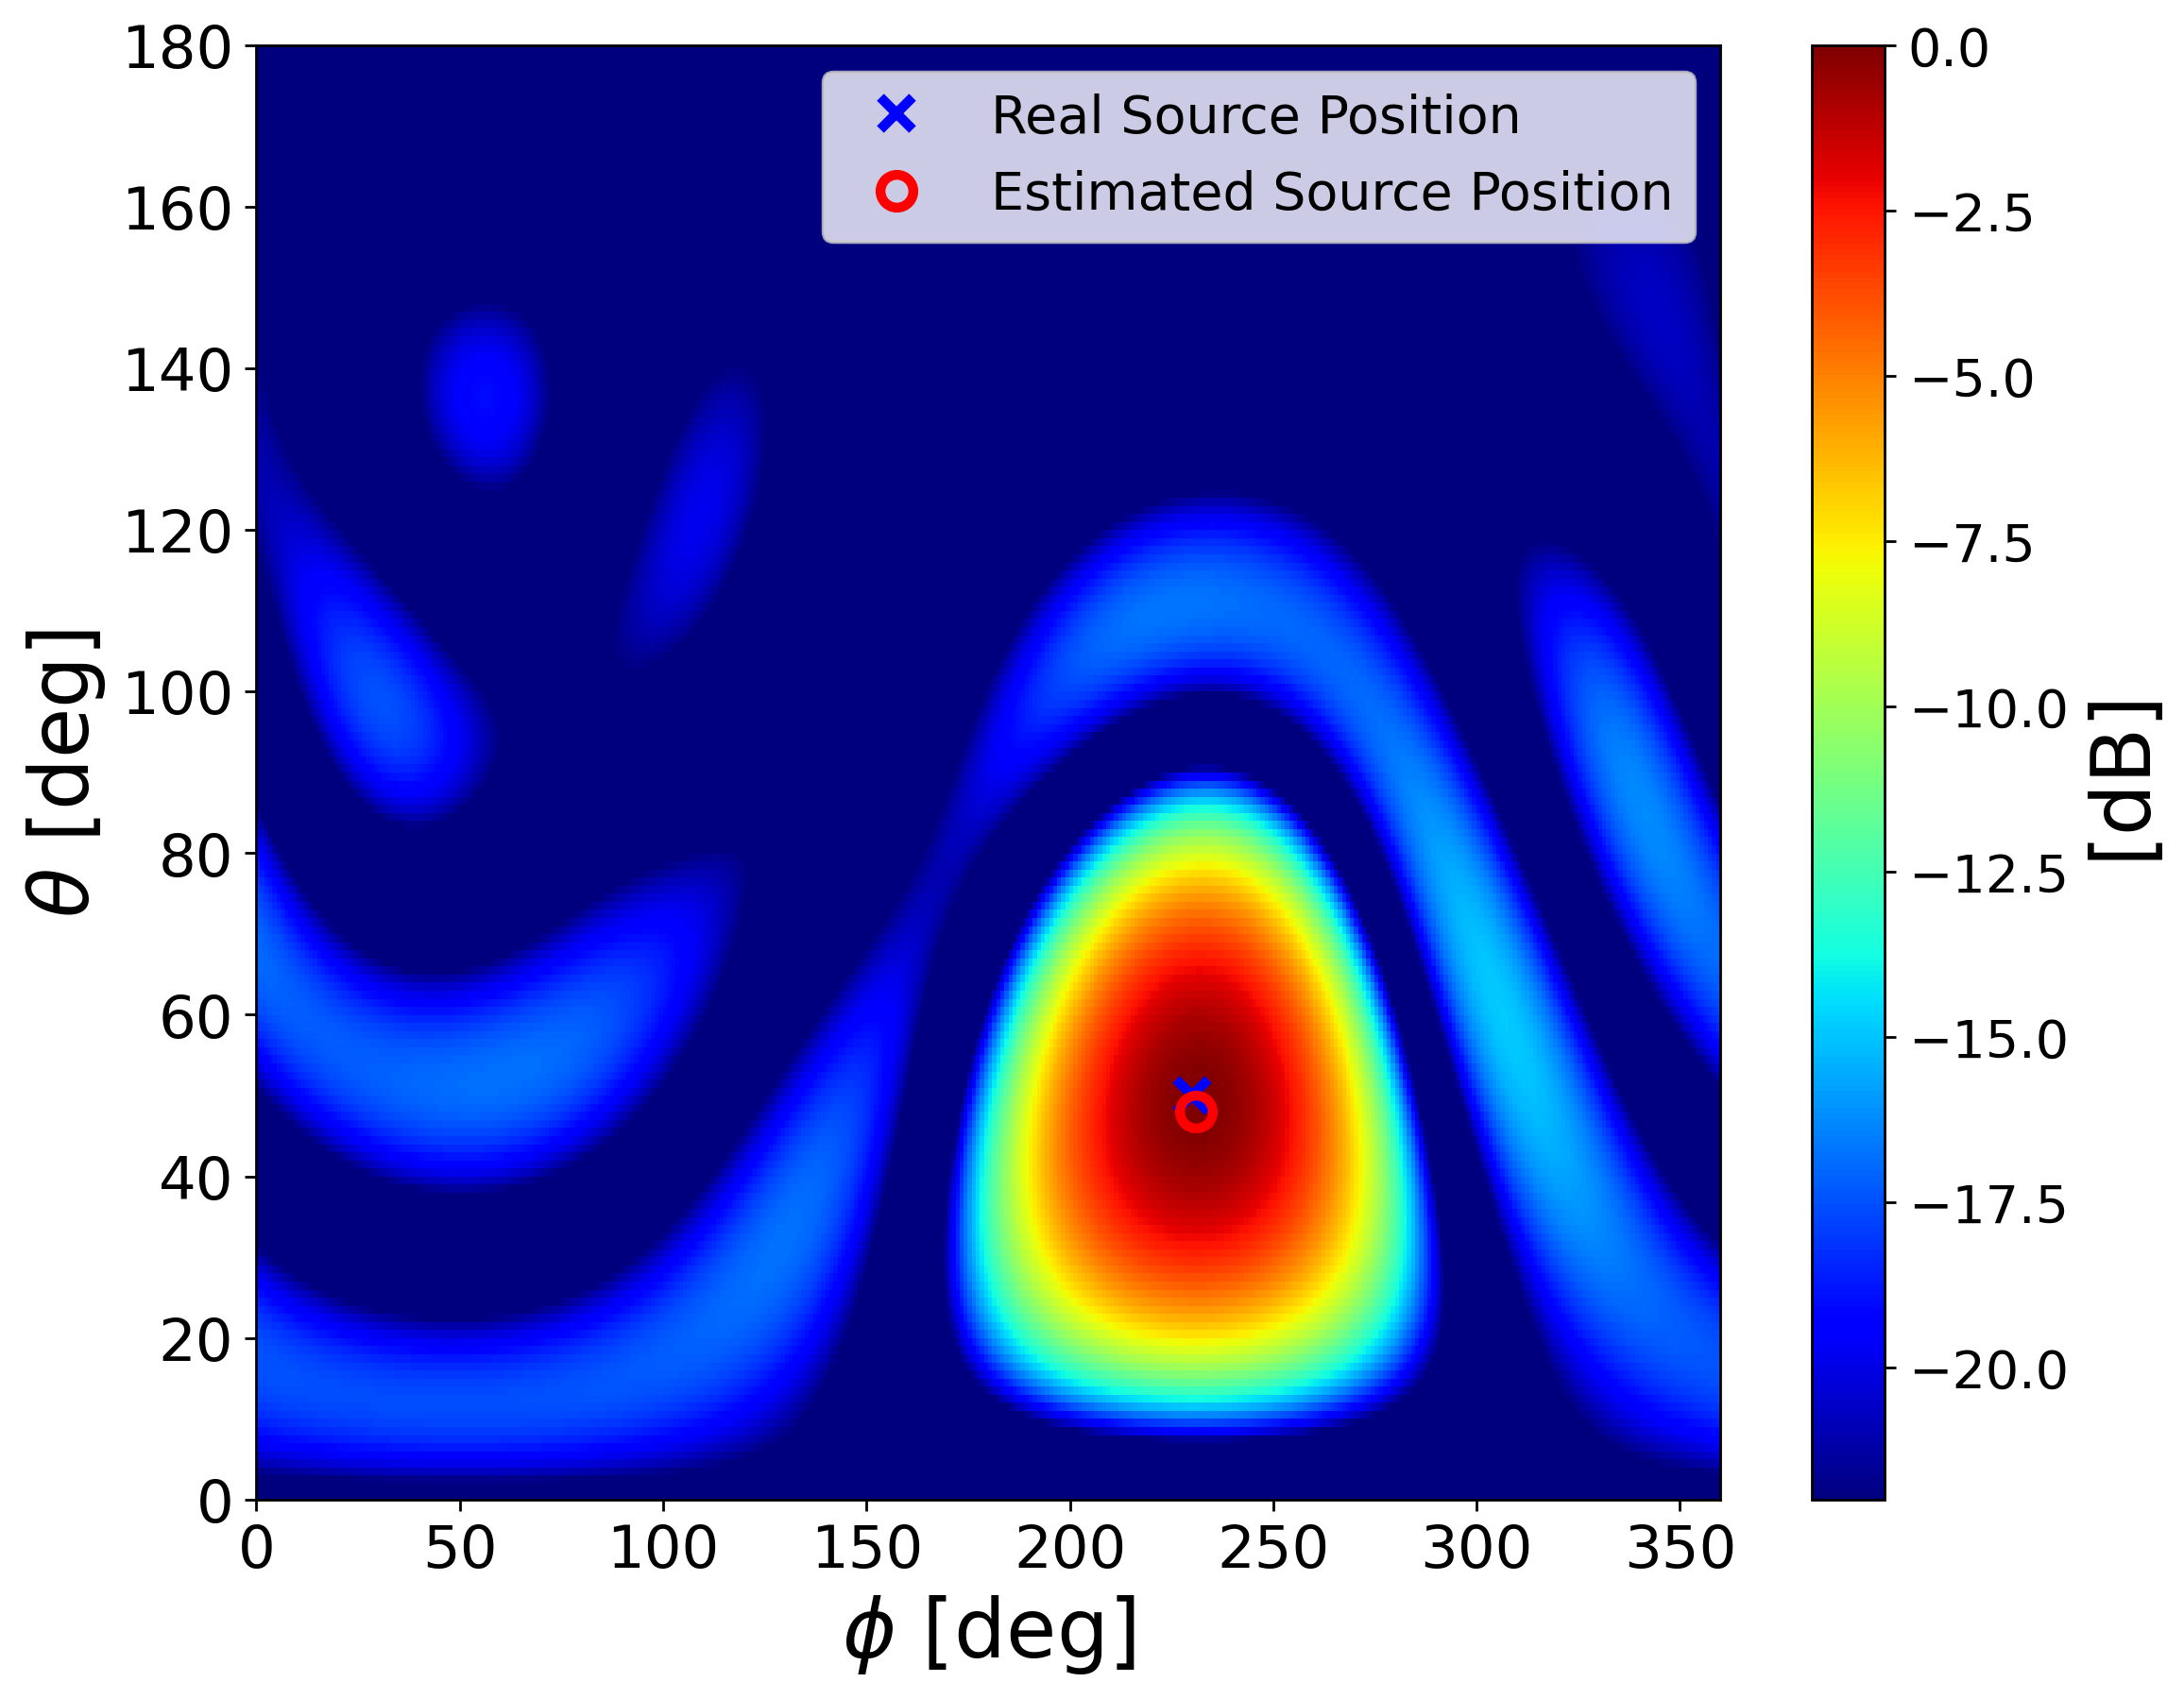

In [10]:
out_pwd_rigid, est_pwd_rigid = ssl_SHmethod(MicArray32, Theta_l, Phi_l, "PWD", "rigid", "2D")

#### Minimum Variance Distortionless Response (MVDR)
The core principle of MVDR is to restrict the beam pattern to be consistent in the observation direction while minimizing the variance of the array output in a noisy environment. This beamformer is useful when the desired signal is a plane wave arriving from the array's observation direction, and all other contributions to the array output are considered noise and thus minimized. MVDR achieves this by adaptively adjusting the array weights, optimizing them to suppress signals from undesired directions without affecting or distorting signals from the desired direction.

Consider a desired signal $s(k)$ coming from direction $(\theta_l, \phi_l)$, and the steering vector $\boldsymbol{v}$ representing the transfer function from the source $s(k)$ to the array input. When noise also enters the array, the array input can be written as:
\begin{equation}
\boldsymbol{x} = \boldsymbol{p} + \boldsymbol{n} = \boldsymbol{v} s + \boldsymbol{n}    \tag{36}
\end{equation}

Here, for simplicity, the dependence of the signal amplitude $s(k)$ on frequency $k$ is eliminated.

The expression for the variance of the array output signal is then:
\begin{equation}
E[|y|^2] = \boldsymbol{w}^H \boldsymbol{S}_{\boldsymbol{xx}} \boldsymbol{w} = \boldsymbol{w}^H \boldsymbol{S}_{\boldsymbol{pp}}\boldsymbol{w} + \boldsymbol{w}^H \boldsymbol{S}_{\boldsymbol{nn}} \boldsymbol{w} = |\boldsymbol{w}^H \boldsymbol{v}|^2 E[|s|^2] + \boldsymbol{w}^H \boldsymbol{S}_{\boldsymbol{nn}} \boldsymbol{w}   \tag{37}
\end{equation}

The constraint for our optimization is mathematically expressed as:
\begin{align}
& \text{minimize} \quad \boldsymbol{w}^H\boldsymbol{S}_{\boldsymbol{xx}}\boldsymbol{w}  \tag{38} \\
& \text{subject to} \quad \boldsymbol{w}^H \boldsymbol{v} = 1
\end{align}

Since our optimization objective is the distortionless response constraint, $\boldsymbol{w}^H \boldsymbol{v} = 1$, and we cannot modify the auto-correlation part $\boldsymbol{S}_{\boldsymbol{xx}}$, we know that minimizing $\boldsymbol{w}^H \boldsymbol{S}_{\boldsymbol{xx}}\boldsymbol{w}$ will lead to the minimization of $\boldsymbol{w}^H \boldsymbol{S}_{\boldsymbol{nn}}\boldsymbol{w}$, i.e., minimizing the variance of the noise at the array output. Therefore, this corresponds to the principle mentioned earlier: this optimization results in transmitting the desired signal unchanged to the array output while minimizing the contribution of noise. The above constraint equation can be transformed into the following form using the Lagrange multiplier method:
\begin{equation}
\boldsymbol{w}^H = \frac{\boldsymbol{v}^H \boldsymbol{S}_{\boldsymbol{xx}}^{-1}}{\boldsymbol{v}^H \boldsymbol{S}_{\boldsymbol{xx}}^{-1} \boldsymbol{v}}   \tag{40}
\end{equation}

However, to obtain the optimal beamforming coefficients, we need to invert the matrix $\boldsymbol{S}_{\boldsymbol{xx}}$, which requires the matrix to be full rank or approximately full rank. The key here is to ensure $\boldsymbol{S}_{nn}$ is full rank or nearly full rank.

Assuming we introduce a common sensor noise, usually caused by amplifiers connected to the sensors, and assuming the noise signals are I.I.D., we then have the cross-spectral density of the noise as:
\begin{equation}
\boldsymbol{S}_{\boldsymbol{nn}} = \sigma_n^2 \frac{4\pi}{Q} \boldsymbol{I}   \tag{41}
\end{equation}
Here, $\boldsymbol{I}$ is a $Q\times Q$ identity matrix, and $\sigma_n^2$ is the variance of the sensor noise.

The coefficient then becomes:
\begin{equation}
\boldsymbol{w}_{\boldsymbol{nm}}^H = \frac{\boldsymbol{v}_{\boldsymbol{nm}}^H}{\boldsymbol{v}_{\boldsymbol{nm}^H} \boldsymbol{v}_{\boldsymbol{nm}}}   \tag{42}
\end{equation}

This result is the same as that of the maximum WNG beamformer, so the cost function of the MVDR algorithm can be written as:
\begin{equation}
J_{MVDR} = 20log_{10}|\boldsymbol{w}_{nm}^T \boldsymbol{R}_{\boldsymbol{p}_{nm}}\boldsymbol{w}_{nm}|
\end{equation}

source_pos: [[ 49]
 [231]]


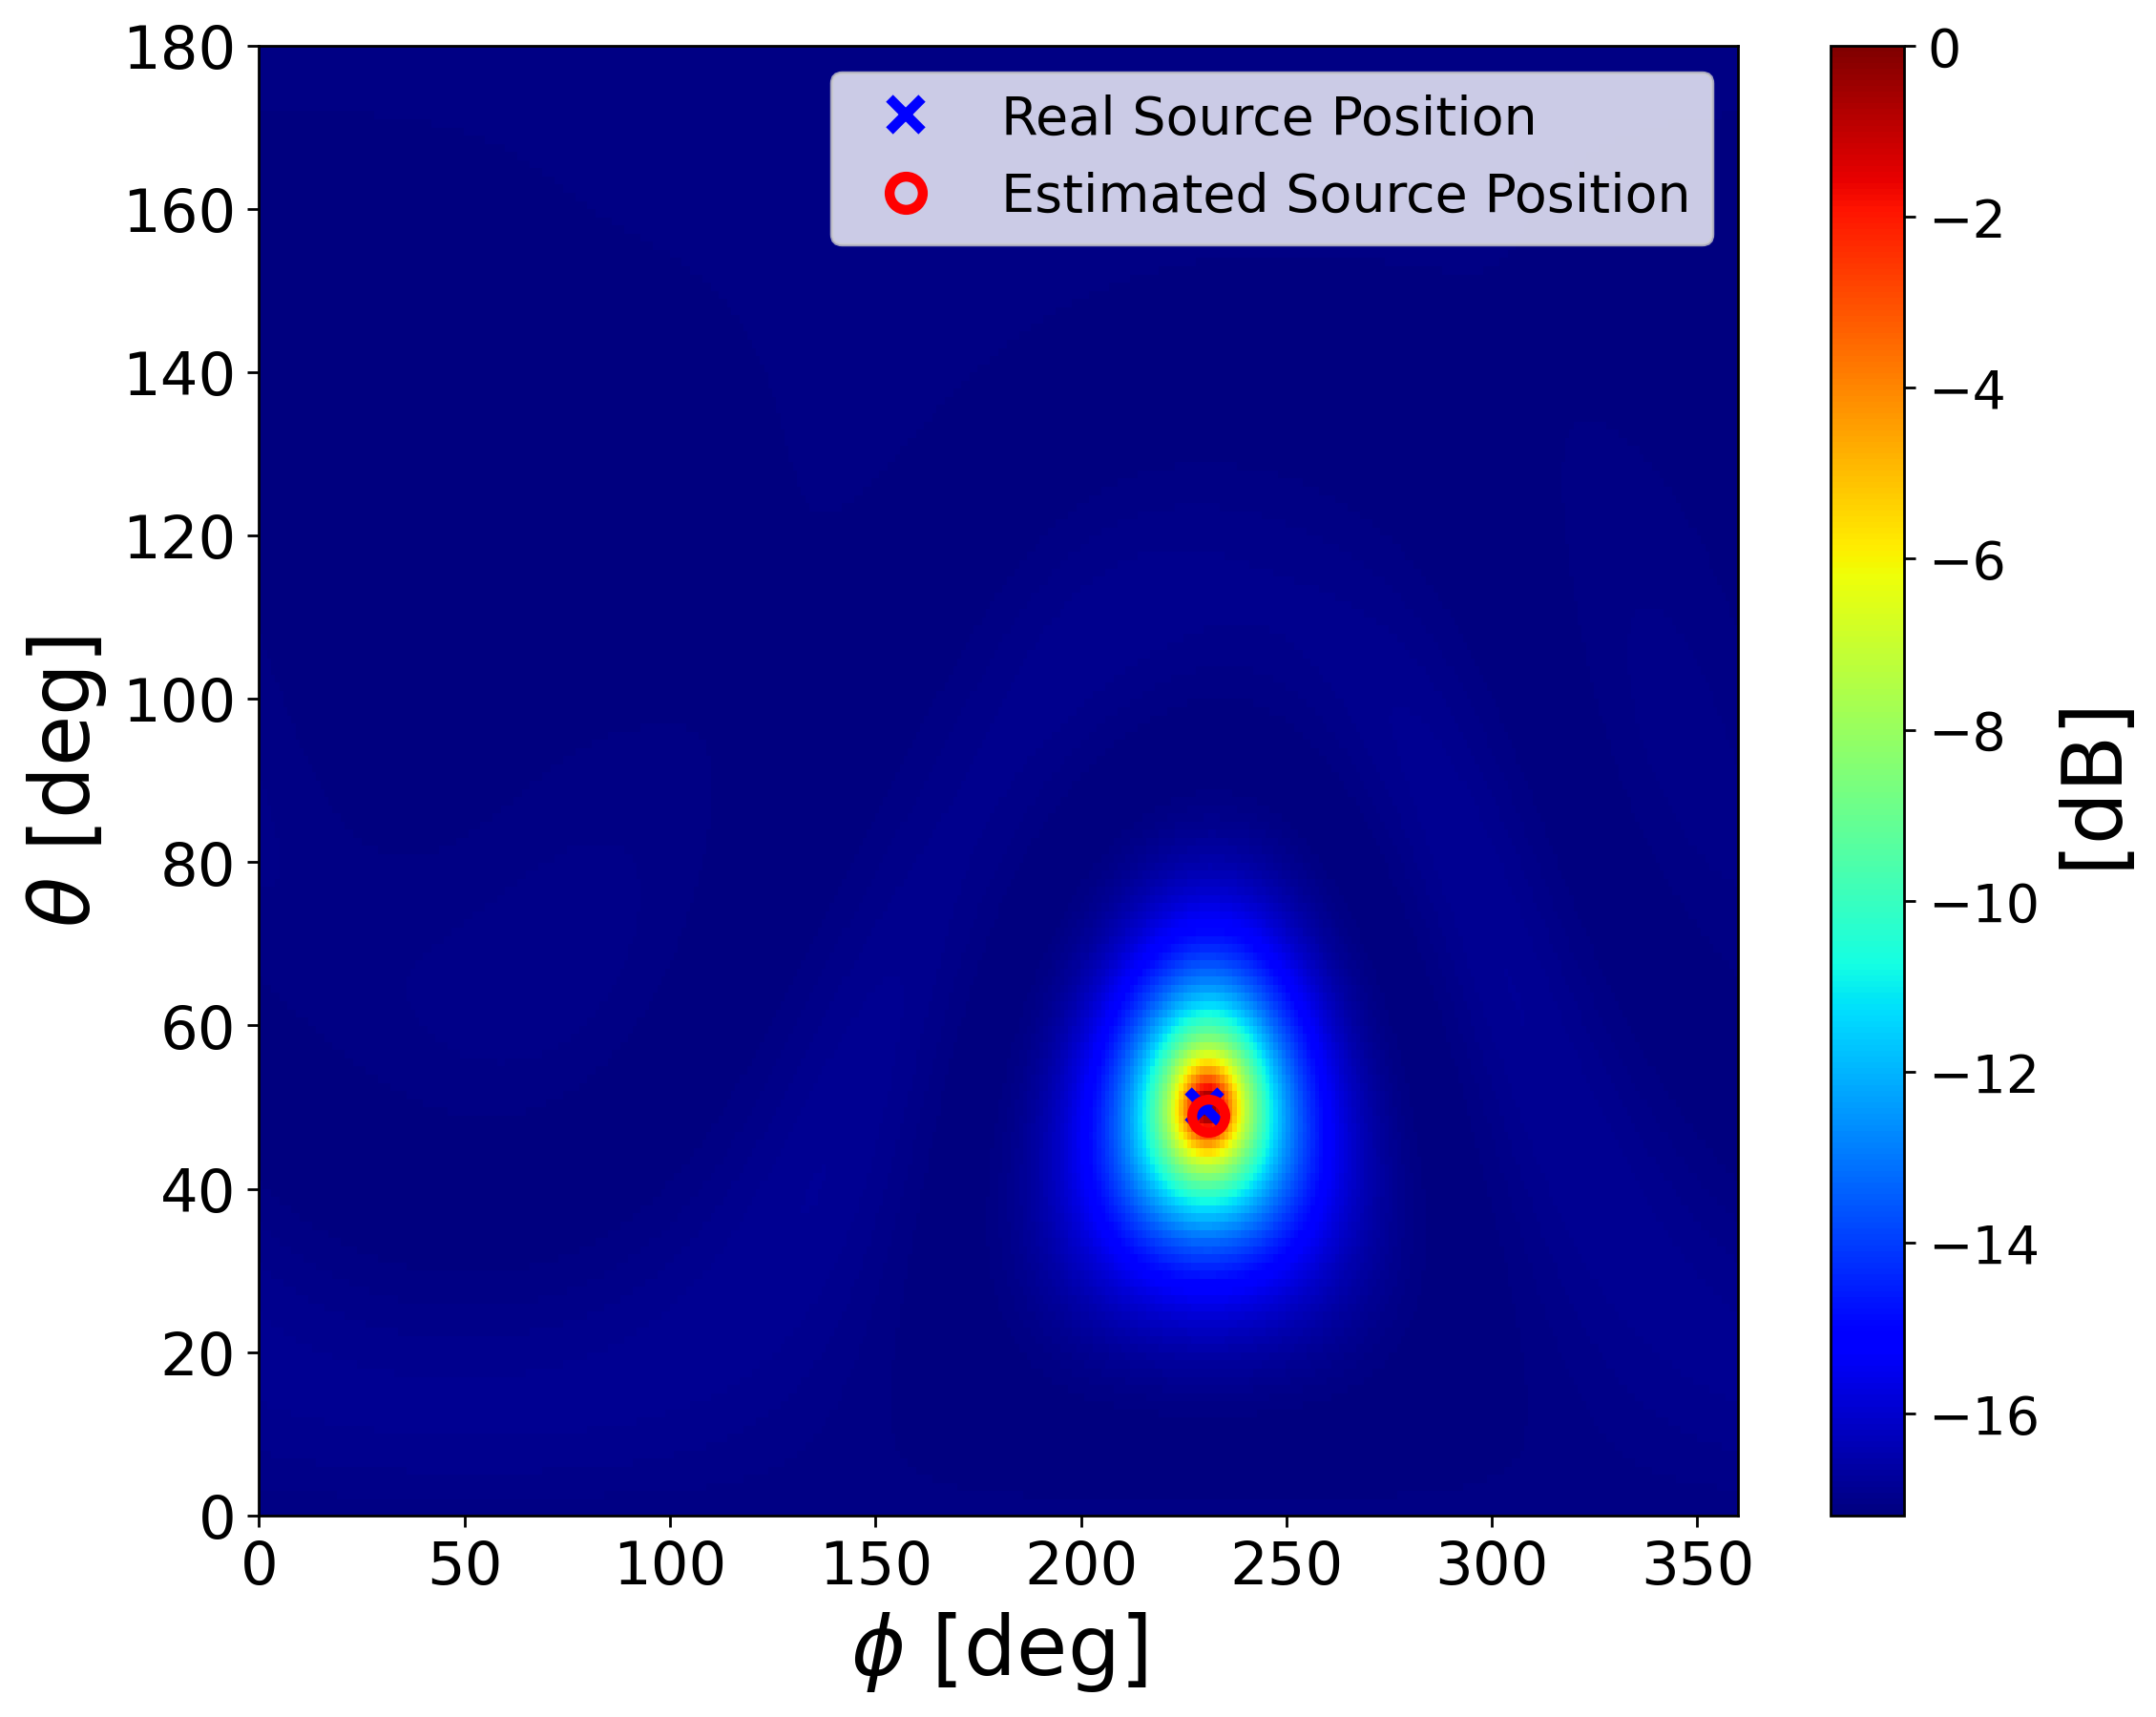

In [11]:
out_mvdr_open, est_mvdr_open = ssl_SHmethod(MicArray32, Theta_l, Phi_l, "SHMVDR", "open", "2D")

source_pos: [[ 48]
 [231]]


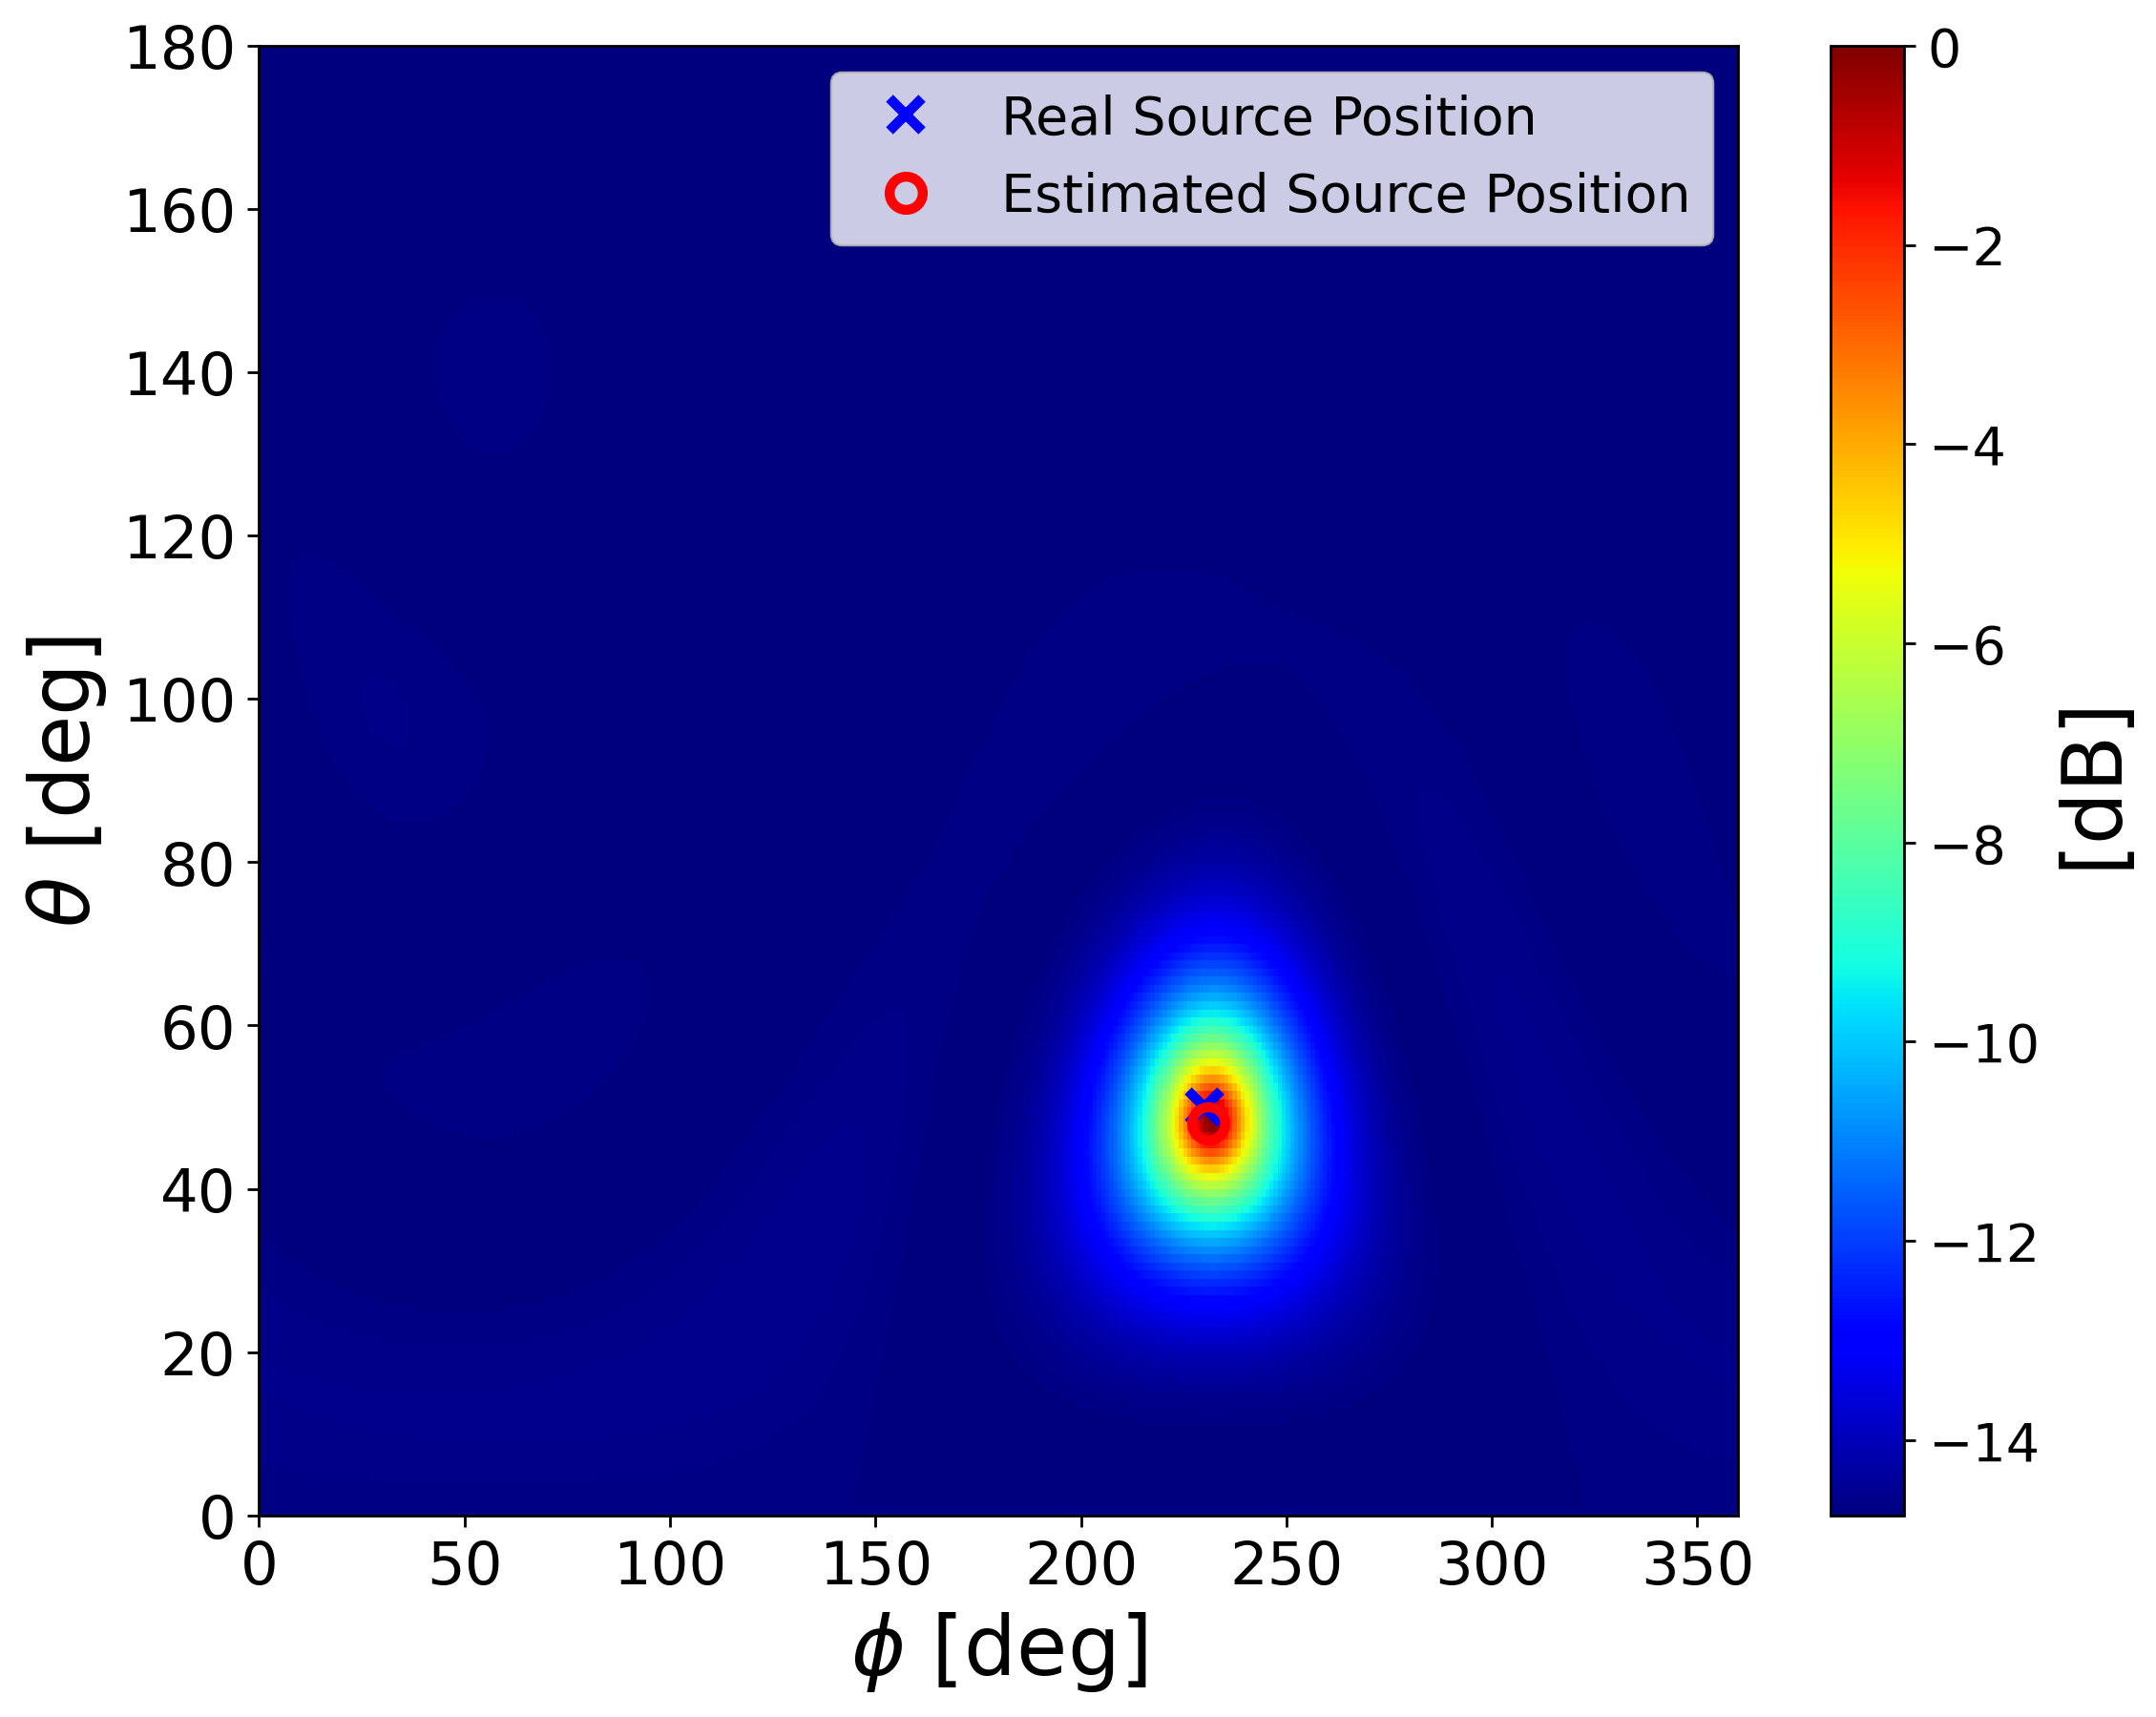

In [12]:
out_mvdr_rigid, est_mvdr_rigid = ssl_SHmethod(MicArray32, Theta_l, Phi_l, "SHMVDR", "rigid", "2D")

#### MUSIC Algorithm
The core principle of the MUSIC algorithm is based on the orthogonality between the signal subspace and the noise subspace. This is achieved by extracting features from the covariance of the received signals and using eigenvectors to obtain orthogonal signal and noise subspaces. Its advantage lies in its ability to achieve high spatial resolution, but it faces challenges, including poor robustness in suboptimal environments and the need for prior knowledge of the number of sound sources. The main steps are as follows:
<ul>
  <li>Calculating the covariance matrix by averaging the received signal vectors over time.</li>
  <li>Computing the eigenvalues and eigenvectors of the covariance matrix. The signal subspace consists of eigenvectors associated with the largest eigenvalues, while the noise subspace is spanned by the remaining eigenvectors.</li>
  <li>Peak searching in the spectrum by constructing a search function that is orthogonal to the eigenvectors of the noise subspace across all possible directions. There will be prominent peaks in the signal direction, as it is most orthogonal to the noise subspace.</li>
</ul>

In the spherical harmonic domain, the above steps can be represented mathematically as:

1. Covariance matrix of the received signals:
\begin{equation}
\boldsymbol{R}_{\boldsymbol{p}_{nm}}  = E[\boldsymbol{p}_{nm} \boldsymbol{p}_{nm}^H]  \tag{42}
\end{equation}

2. Eigen decomposition:
\begin{equation}
[\boldsymbol{E}_a, \boldsymbol{E}_n] = eigen(\boldsymbol{R}_{\boldsymbol{p}_{nm}})   \tag{43}
\end{equation}
Here, $\boldsymbol{E}_a$ and $\boldsymbol{E}_n$ respectively represent the signal and noise subspaces. The eigenvectors are then selected based on the known number of sound sources.

3. Peak searching in the spectrum:
The cost function related to the MUSIC algorithm is derived as
\begin{equation}
J_{MUSIC} = -20 log_{10}|\boldsymbol{y}(\Psi)^T \boldsymbol{E}_N \boldsymbol{E}_N^H \boldsymbol{y}^*(\Psi)| \tag{44} 
\end{equation}

From the results shown in the figure below, it can be seen that when choosing $ka = 4.496$, corresponding to the position of the zeros of the spherical Bessel function, the MUSIC algorithm and PWD algorithm under the open-sphere structure cannot operate, whereas under the rigid-sphere structure, both PWD and MUSIC can overcome this issue, highlighting the superiority of the rigid-sphere structure. Additionally, Rafaely and others have proposed structures like the dual-sphere. For further information, you can refer to:

[High-resolution plane-wave decomposition in an auditorium using a dual-radius scanning spherical microphone array](https://scholar.google.com/citations?view_op=view_citation&hl=zh-CN&user=88DYI5cAAAAJ&cstart=20&pagesize=80&citation_for_view=88DYI5cAAAAJ:WF5omc3nYNoC)

For a detailed comparison of the performance between the MUSIC algorithm and SHMUSIC algorithm, you can check out this article:
[Spherical harmonics MUSIC versus conventional MUSIC](https://www.sciencedirect.com/science/article/pii/S0003682X11000521?casa_token=6OkHzwd3dyUAAAAA:A7GdInpejNWuE5epN4IBaBvn9bOsNPJpXApf3DQ9ns85j03KtqTOls7ov3-hHxc1Iw_0u1fw)

source_pos: [[69]
 [44]]


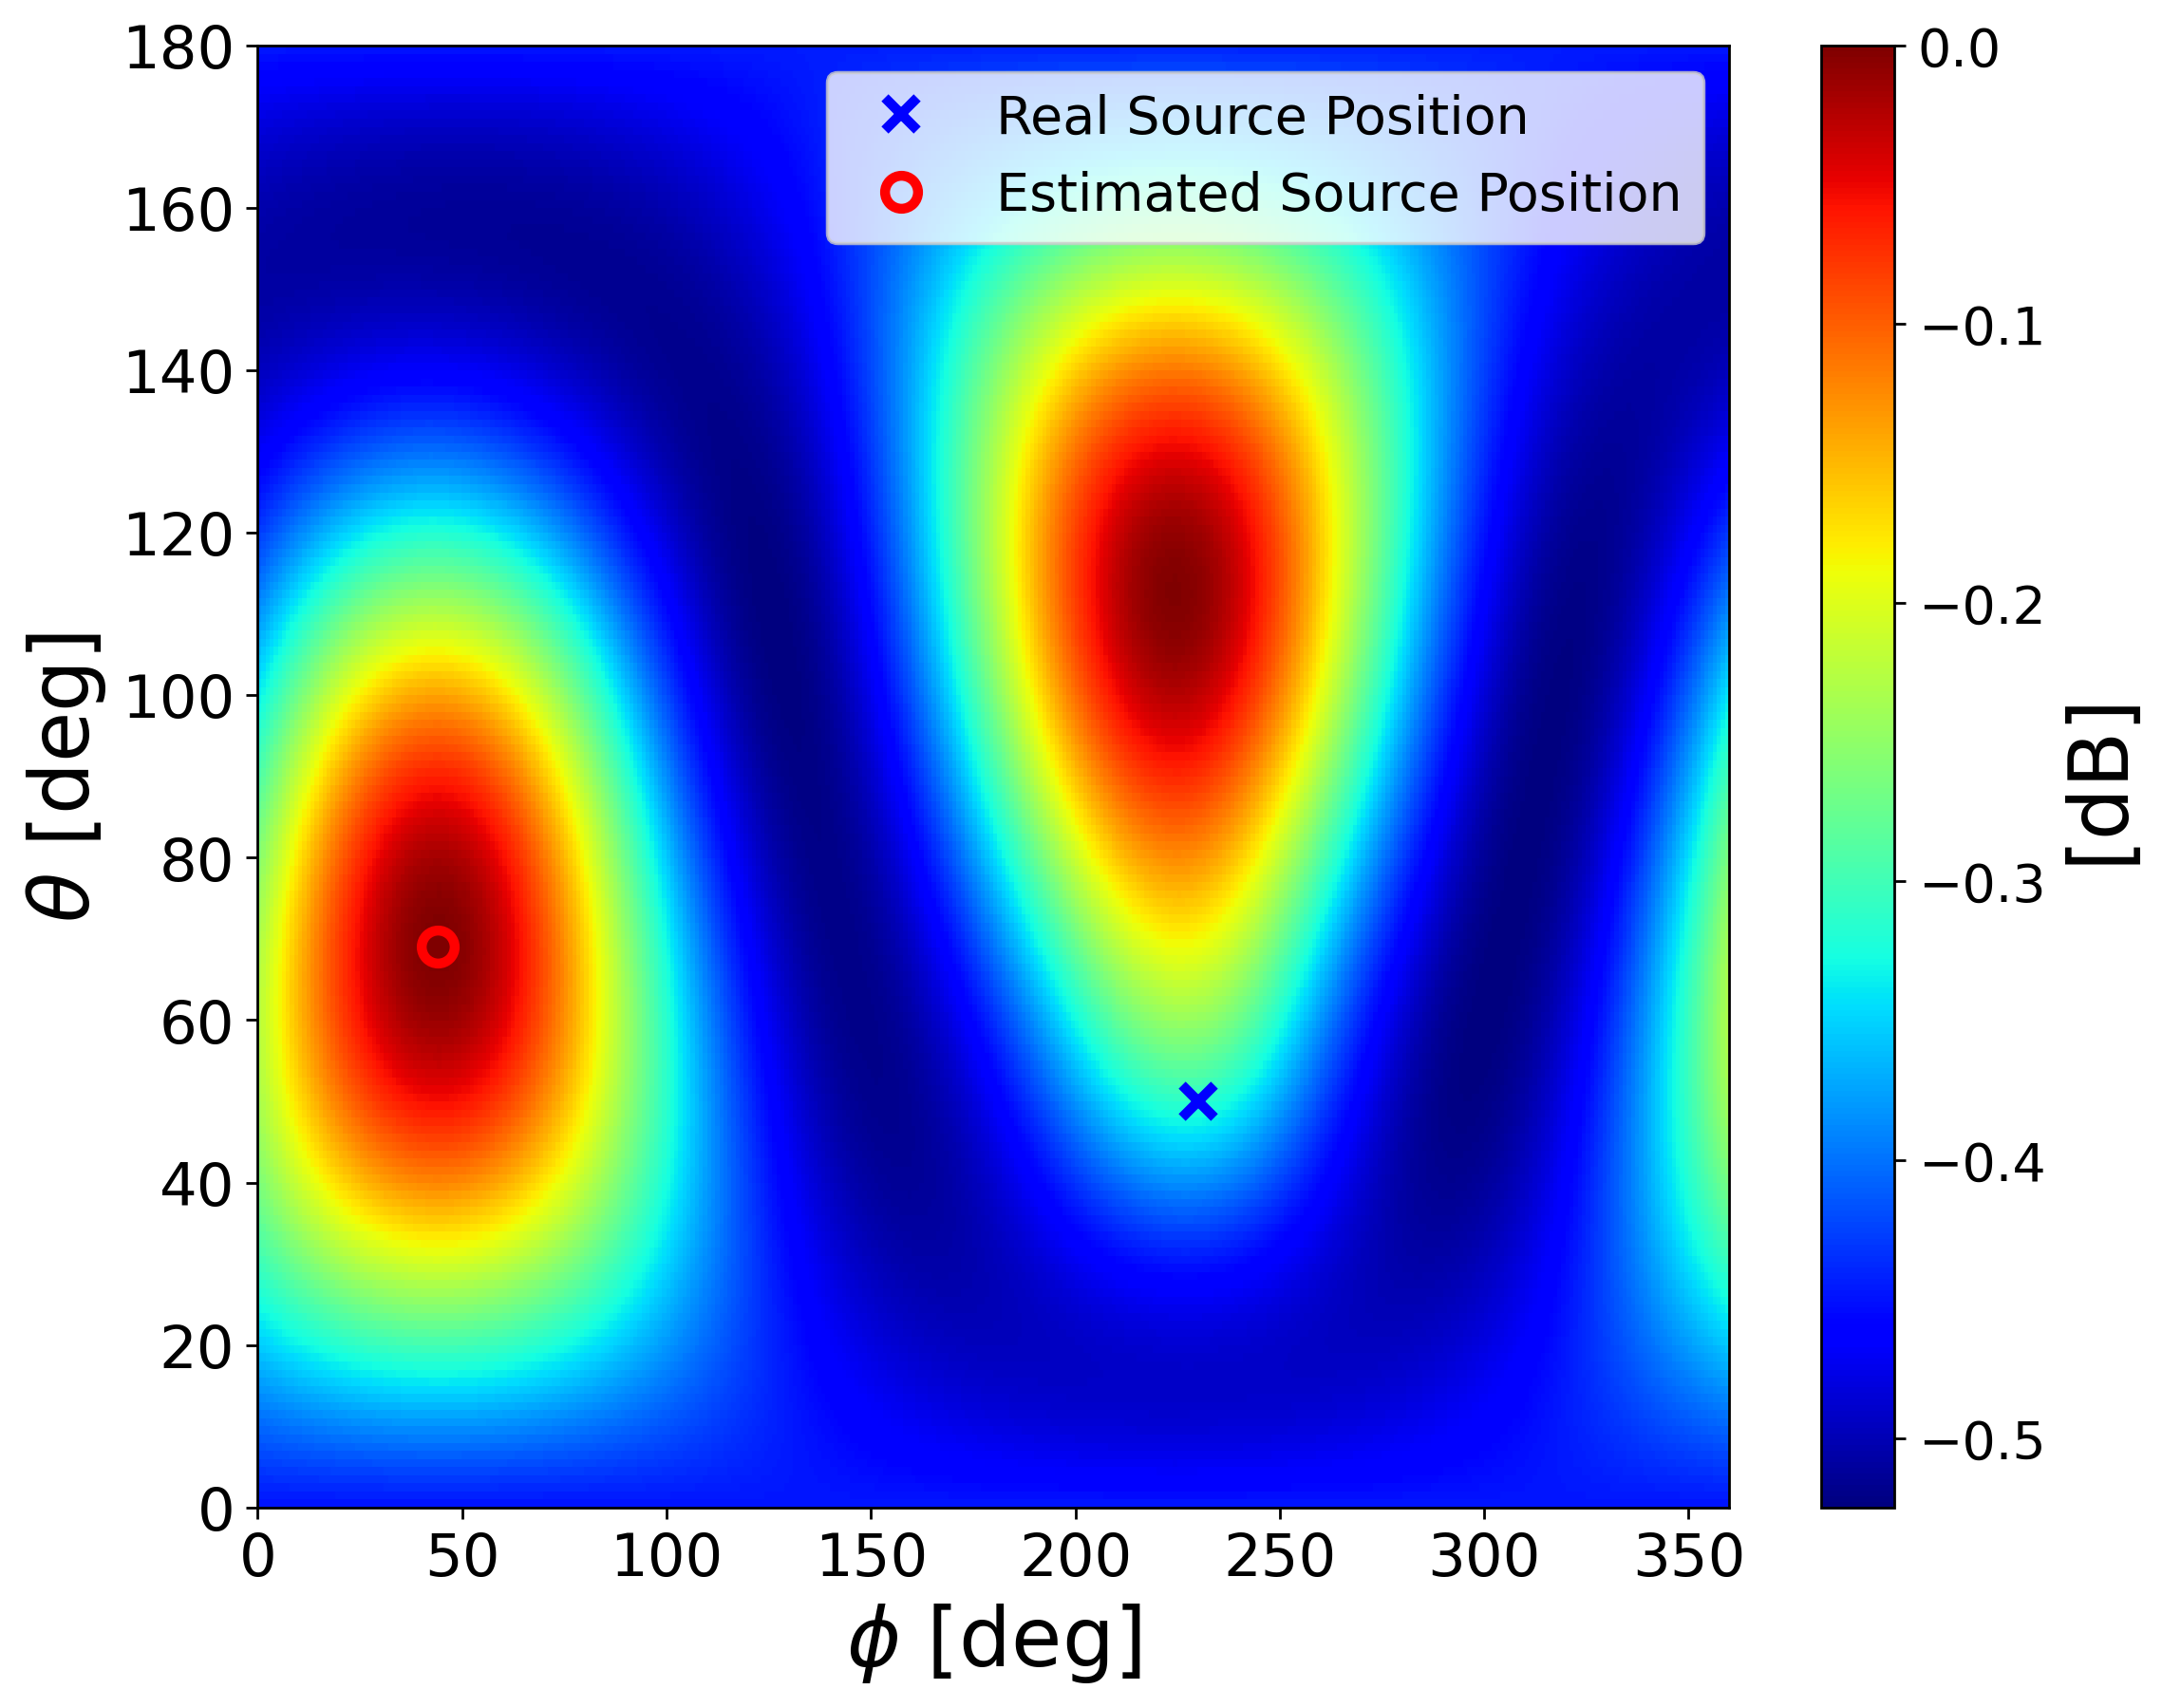

In [13]:
out_music_open, est_music_open = ssl_SHmethod(MicArray32, Theta_l, Phi_l, "MUSIC", "open", "2D")

source_pos: [[ 48]
 [231]]


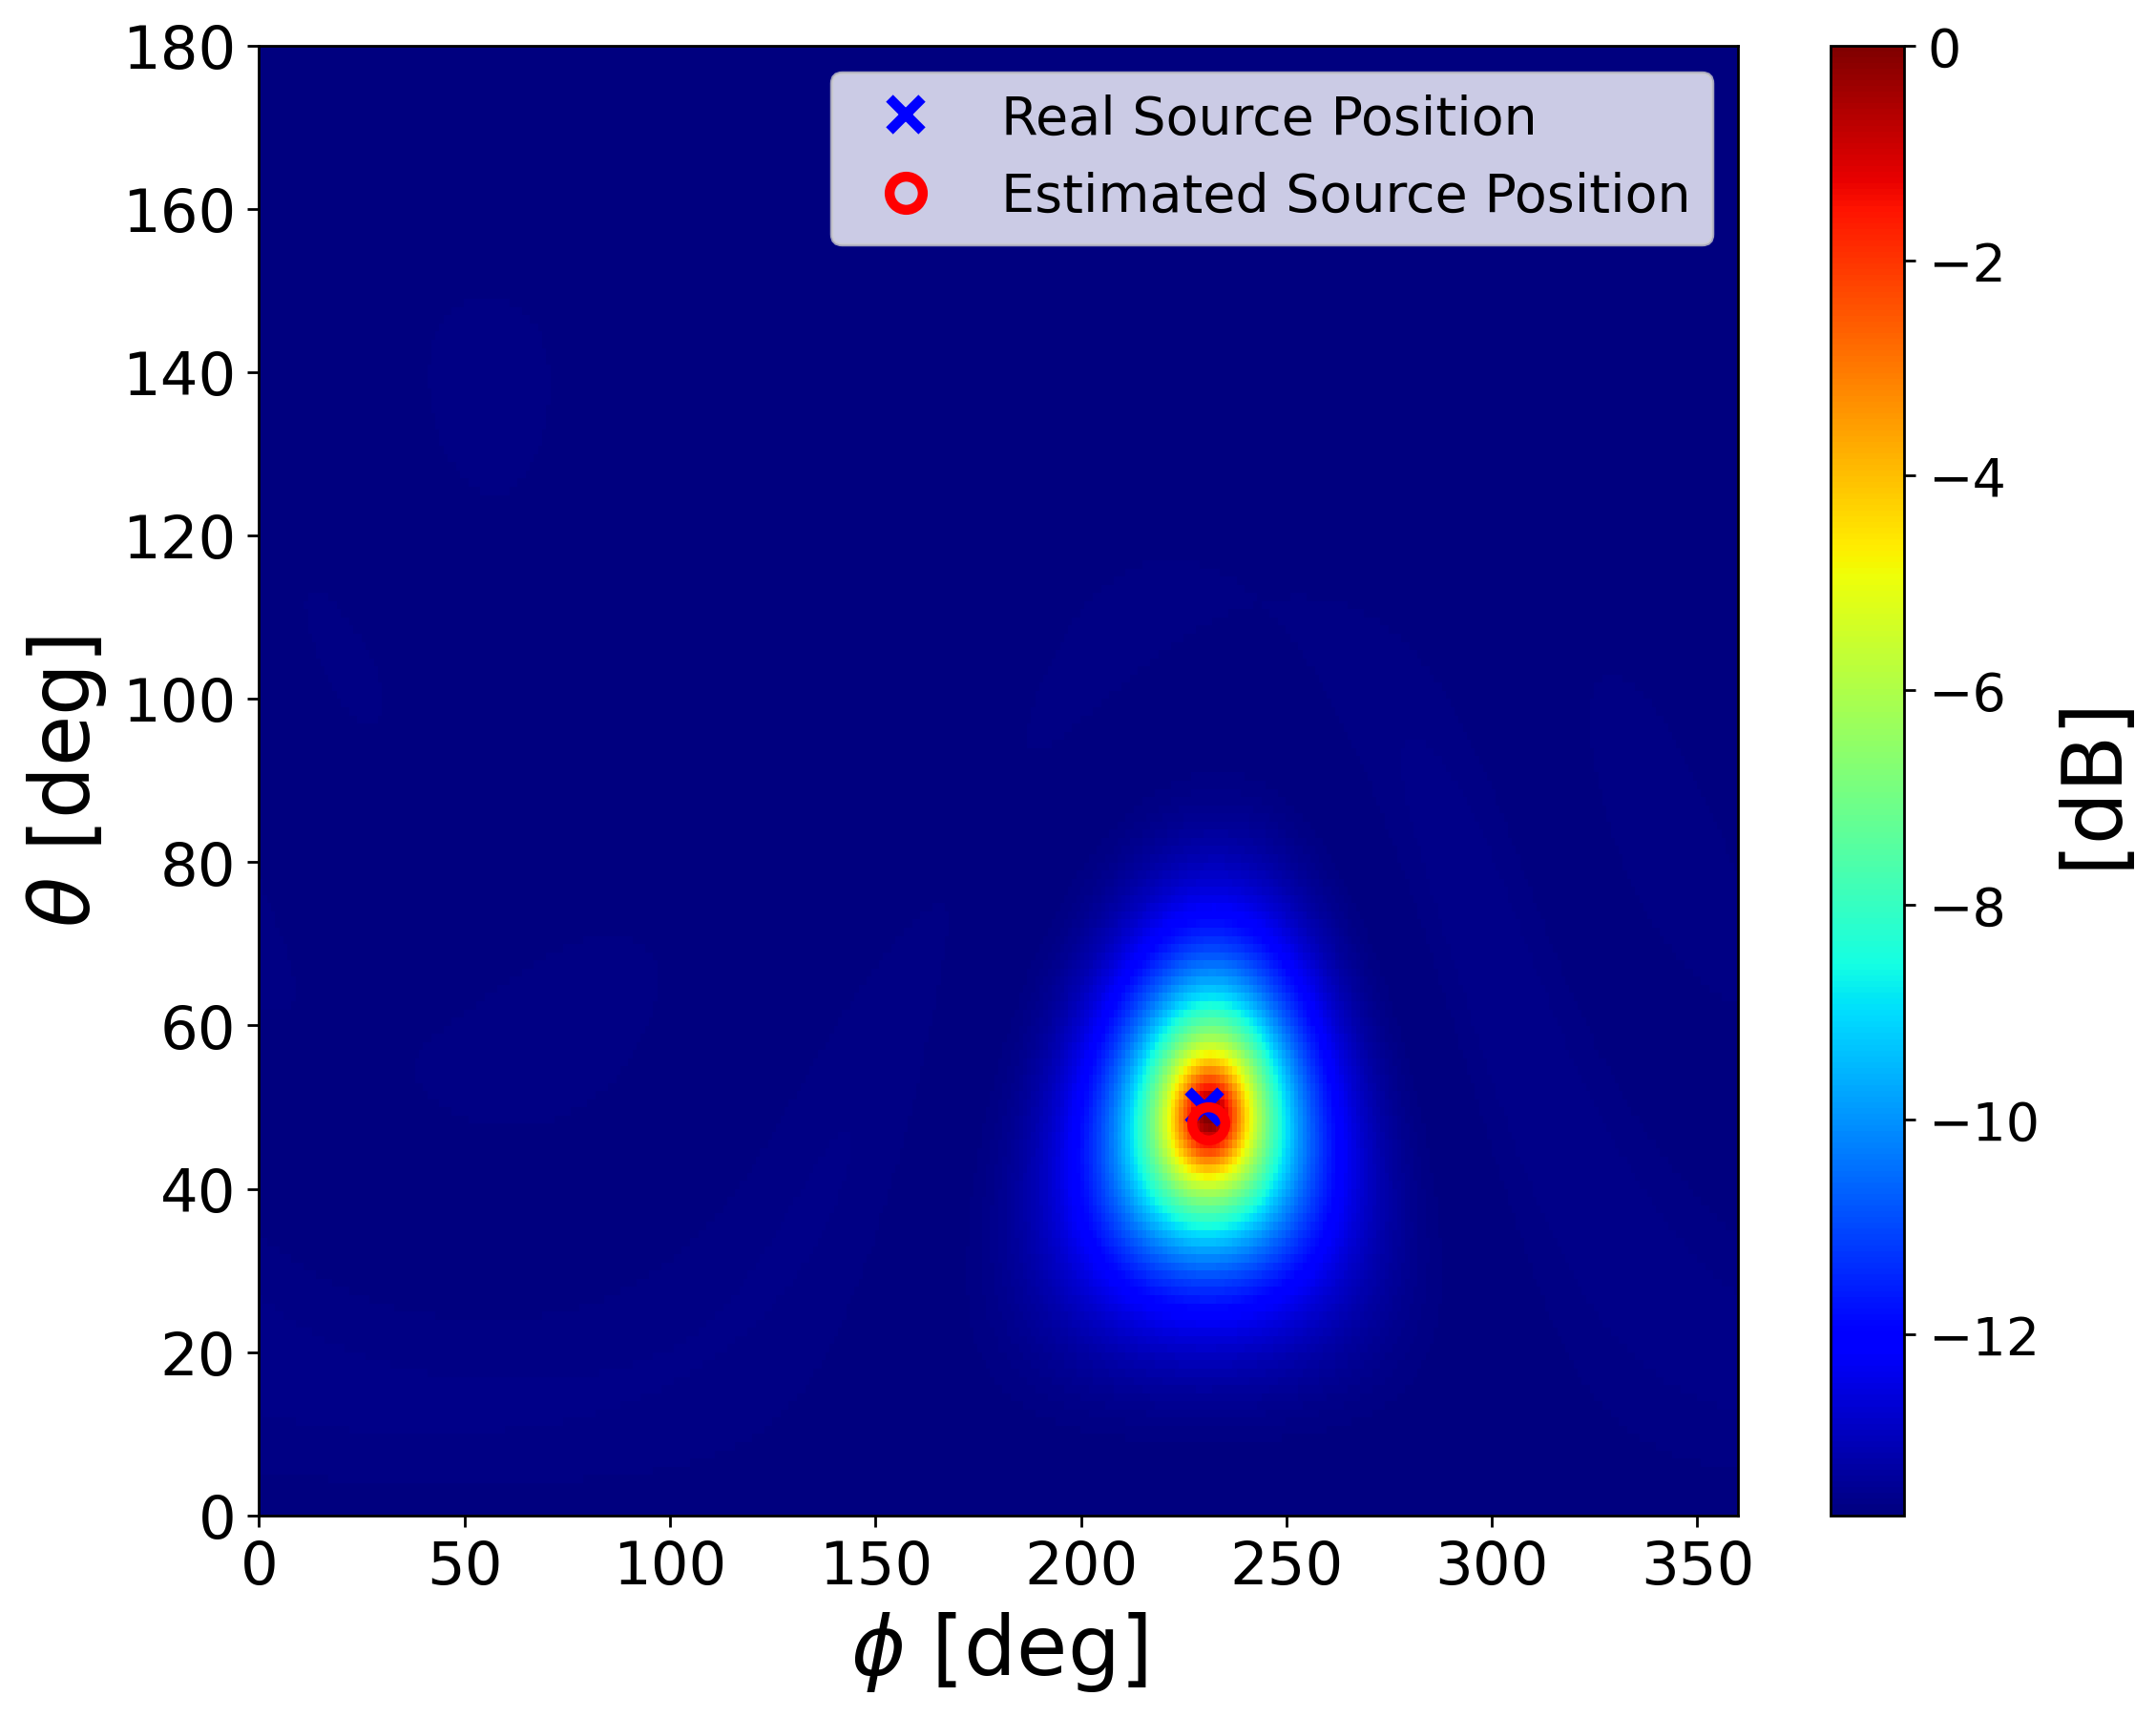

In [14]:
out_music_rigid, est_music_rigid = ssl_SHmethod(MicArray32, Theta_l, Phi_l, "MUSIC", "rigid", "2D")

#### SHMLE Algorithm
Assume $\Theta = [\boldsymbol{\Psi}^T, \boldsymbol{S}^T, \sigma_n^2]^T$ is the vector containing all unknown parameters, where $\boldsymbol{S} = [\boldsymbol{s}(k_{min})^T, ..., \boldsymbol{s}(k_{max})^T]^T$ represents the amplitude of the signal, with $k_{min}$ and $k_{max}$ denoting the minimum and maximum wavenumbers, satisfying $ka < N$. Here, we assume $\boldsymbol{\Psi}$, $s$, and $\sigma_n^2$ are deterministic yet unknown, while the observed data $\boldsymbol{p}_{nm}$ is assumed to be random.

Given $\Theta$, the likelihood function of the spherical harmonic domain signal $\boldsymbol{p} _{nm}$ can be represented as:
\begin{equation}
f(\boldsymbol{p}_{nm}; \Theta) = \frac{exp(-\sum_{k=k_{min}}^{k_{max}}[\boldsymbol{p}_{nm}(k) - \boldsymbol{V}_{nm}(k,\Psi)\boldsymbol{s}(k)]^H \boldsymbol{S}_{nn}^{-1}[\boldsymbol{p}_{nm}(kr)-\boldsymbol{V}_{nm}(kr, \boldsymbol{\Psi})\boldsymbol{s}(k)])}{(\pi^{(N+1)^2}|\boldsymbol{S}_{nn}|)^{k_{max}-k_{min}}}  \tag{45}
\end{equation}

Here, $\boldsymbol{V}_{nm}(kr,\Psi) = \boldsymbol{B}(kr) \boldsymbol{Y}^H (\boldsymbol{\Psi})$. Taking the logarithm of equation (45), inserting equation (41), and ignoring the constant terms, the log-likelihood function $L(\boldsymbol{p}_{nm};\Theta)$ can be represented as:
\begin{equation}
L(\boldsymbol{p}_{nm};\Theta) = -(N+1)^2 (k_{max} - k_{min}) log{\sigma_n^2} - \frac{Q}{4\pi \sigma_n^2} \sum_{k = k_{min}}^{k_{max}}|\boldsymbol{p}_{nm}(kr) - \boldsymbol{V}_{nm}(kr, \boldsymbol{\Psi}) \boldsymbol{s}(k)|^2   \tag{46}
\end{equation}

Then, fixing $\boldsymbol{\Psi}$ and $\boldsymbol{s}$, and treating $\sigma_n^2$ as an unknown parameter to maximize the above formula, we get:
\begin{equation}
\hat{\sigma}_n^2 = \frac{Q}{4\pi(N+1)^2 (k_{max} - k_{min})} \sum_{k = k_{min}}^{k_{max}} |\boldsymbol{p}_{nm}(kr) - \boldsymbol{V}_{nm}(kr,\boldsymbol{\Psi})\boldsymbol{s}(k)|^2   \tag{47}
\end{equation} 

The matrix representation of the spherical harmonic domain sound pressure is as follows:
\begin{equation}
\boldsymbol{p}_{nm}(kr) \approx \boldsymbol{B}(kr) \boldsymbol{Y}^H(\boldsymbol{\Psi})\boldsymbol{s}(k) + \boldsymbol{n}_{nm}(k)  \tag{48}
\end{equation}

Substituting equations (48), (47) into the log-likelihood function, and ignoring all constant terms, considering the monotonicity of the logarithm, we get the maximum likelihood estimates for $\boldsymbol{\Psi}$ and $\boldsymbol{s}$ as:
\begin{equation}
(\hat{\Psi}, \hat{s}) = argmin_{\boldsymbol{\Psi}, \boldsymbol{s}}\sum_{k=k_{min}}^{k_{max}} |\boldsymbol{p}_{nm}(kr) - \boldsymbol{V}_{nm}(kr, \boldsymbol{\Psi}\boldsymbol{s}(k))|^2   \tag{49}
\end{equation}

If we fix $\boldsymbol{\Psi}$, then $\boldsymbol{s}$ at each frequency can be obtained by the least squares criterion:
\begin{equation}
\hat{\boldsymbol{s}}(k) = \boldsymbol{V}_{nm}(kr, \boldsymbol{\Psi})^\dagger \boldsymbol{p}_{nm}(kr)   \tag{50}
\end{equation}

Substituting equation (50) back into (49), we get:
\begin{equation}
\hat{\boldsymbol{\Psi}} =  argmin_{\boldsymbol{\Psi}}\sum_{k=k_{min}}^{k_{max}} |\boldsymbol{p}_{nm}(kr) - \boldsymbol{V}_{nm}(kr, \boldsymbol{\Psi})\boldsymbol{V}_{nm}(kr, \boldsymbol{\Psi})^\dagger \boldsymbol{p}_{nm}(kr)|^2   \tag{51}
\end{equation}

Thus, the cost function for the SHMLE algorithm is:
\begin{equation}
J_{SHMLE}(\boldsymbol{\Psi}) = - 10log_{10}(\sum_{k=k_{min}}^{k_{max}}||\boldsymbol{p}_{nm}(kr) - \boldsymbol{V}_{nm}(kr, \boldsymbol{\Psi})\boldsymbol{V}_{nm}(kr, \boldsymbol{\Psi})^\dagger \boldsymbol{p}_{nm}(kr)||^2)  \tag{52}
\end{equation}

The narrowband SHMLE algorithm corresponds to the calculation of equation (52) at a specific $k$, which can be represented as:
\begin{equation}
\hat{\boldsymbol{\Psi}} = argmax_{\Psi} = (-20 log_{10}||\boldsymbol{p}_{nm}(kr) - \boldsymbol{V}_{nm}(kr,\boldsymbol{\Psi}) \boldsymbol{V}_{nm}(kr, \boldsymbol{\Psi})^\dagger \boldsymbol{p}_{nm}(kr)||)  \tag{53}
\end{equation}

The localization result of the broadband SHMLE is:
\begin{equation}
\hat{\boldsymbol{\Psi}} = argmax_{\boldsymbol{\Psi}} J_{SHMLE}(\boldsymbol{\Psi})    \tag{54}
\end{equation}

It can be seen that the SHMLE method does not involve division by $b_n{kr}$, thereby overcoming the problem of non-usability in open-sphere array structures, and ensuring high spatial resolution.

source_pos: [[ 50]
 [230]]


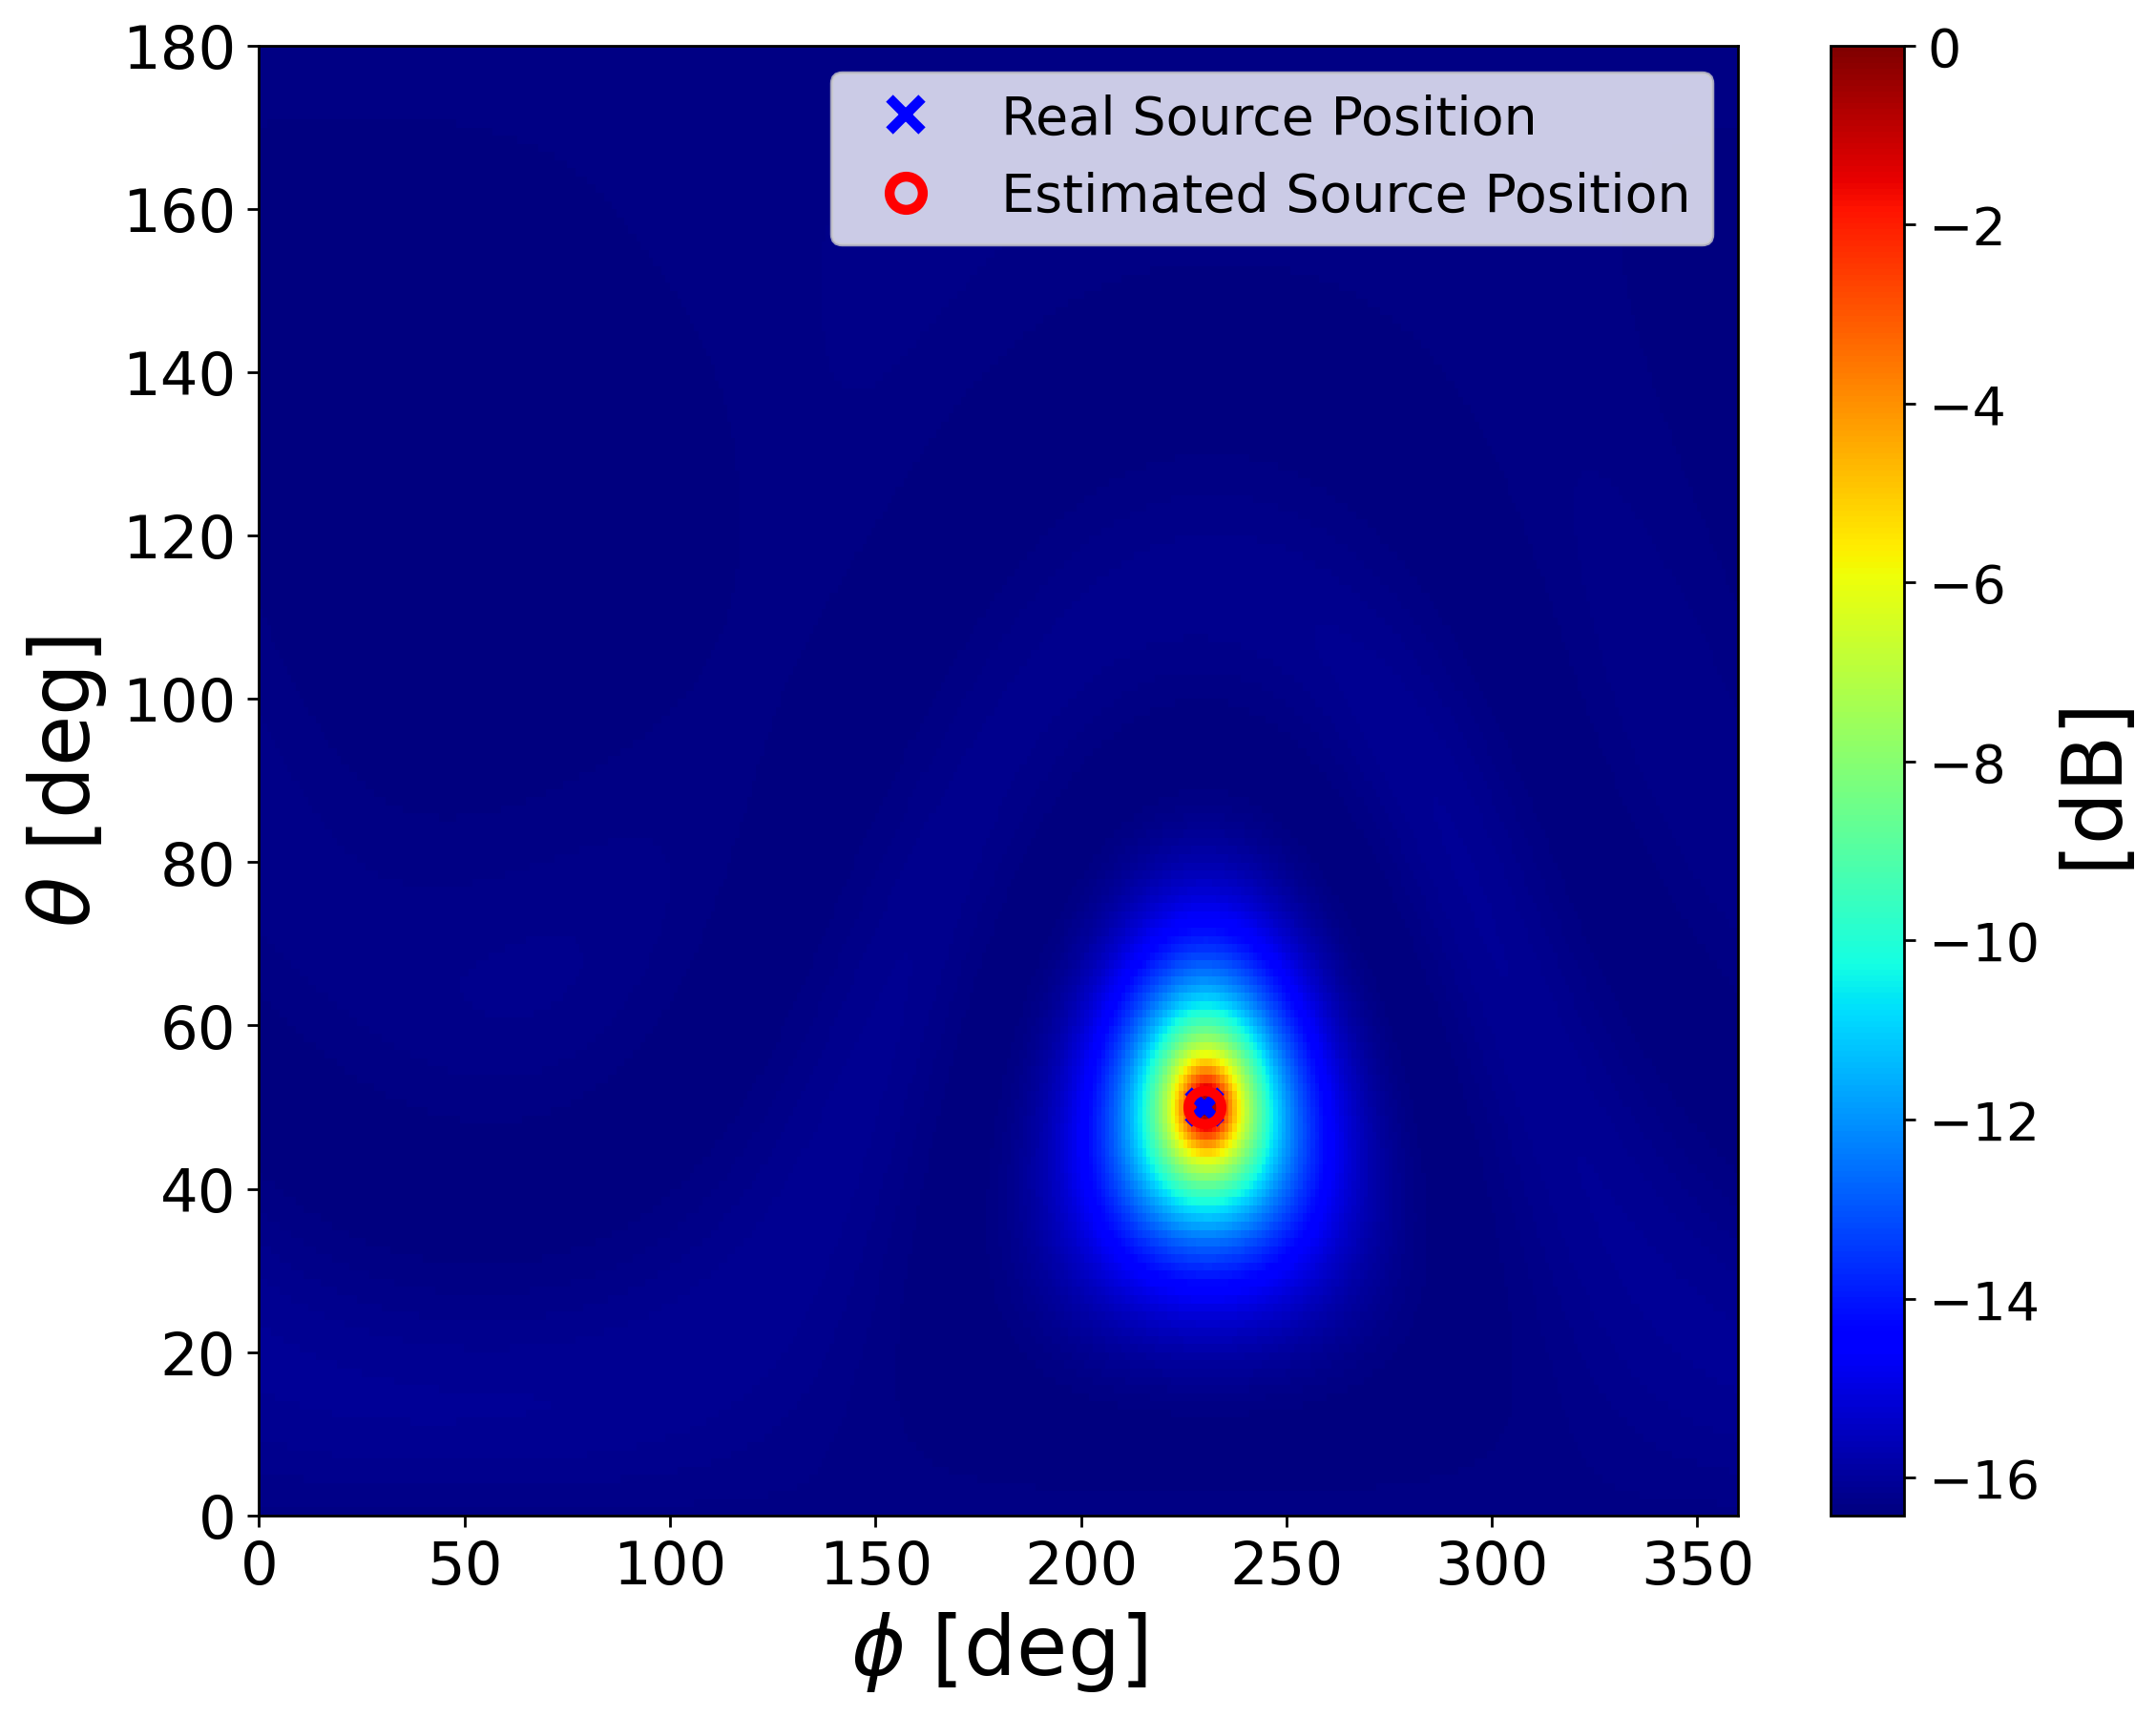

In [15]:
out_mle_open, est_mle_open = ssl_SHmethod(MicArray32, Theta_l, Phi_l, "SHMLE", "open", "2D")

source_pos: [[ 49]
 [231]]


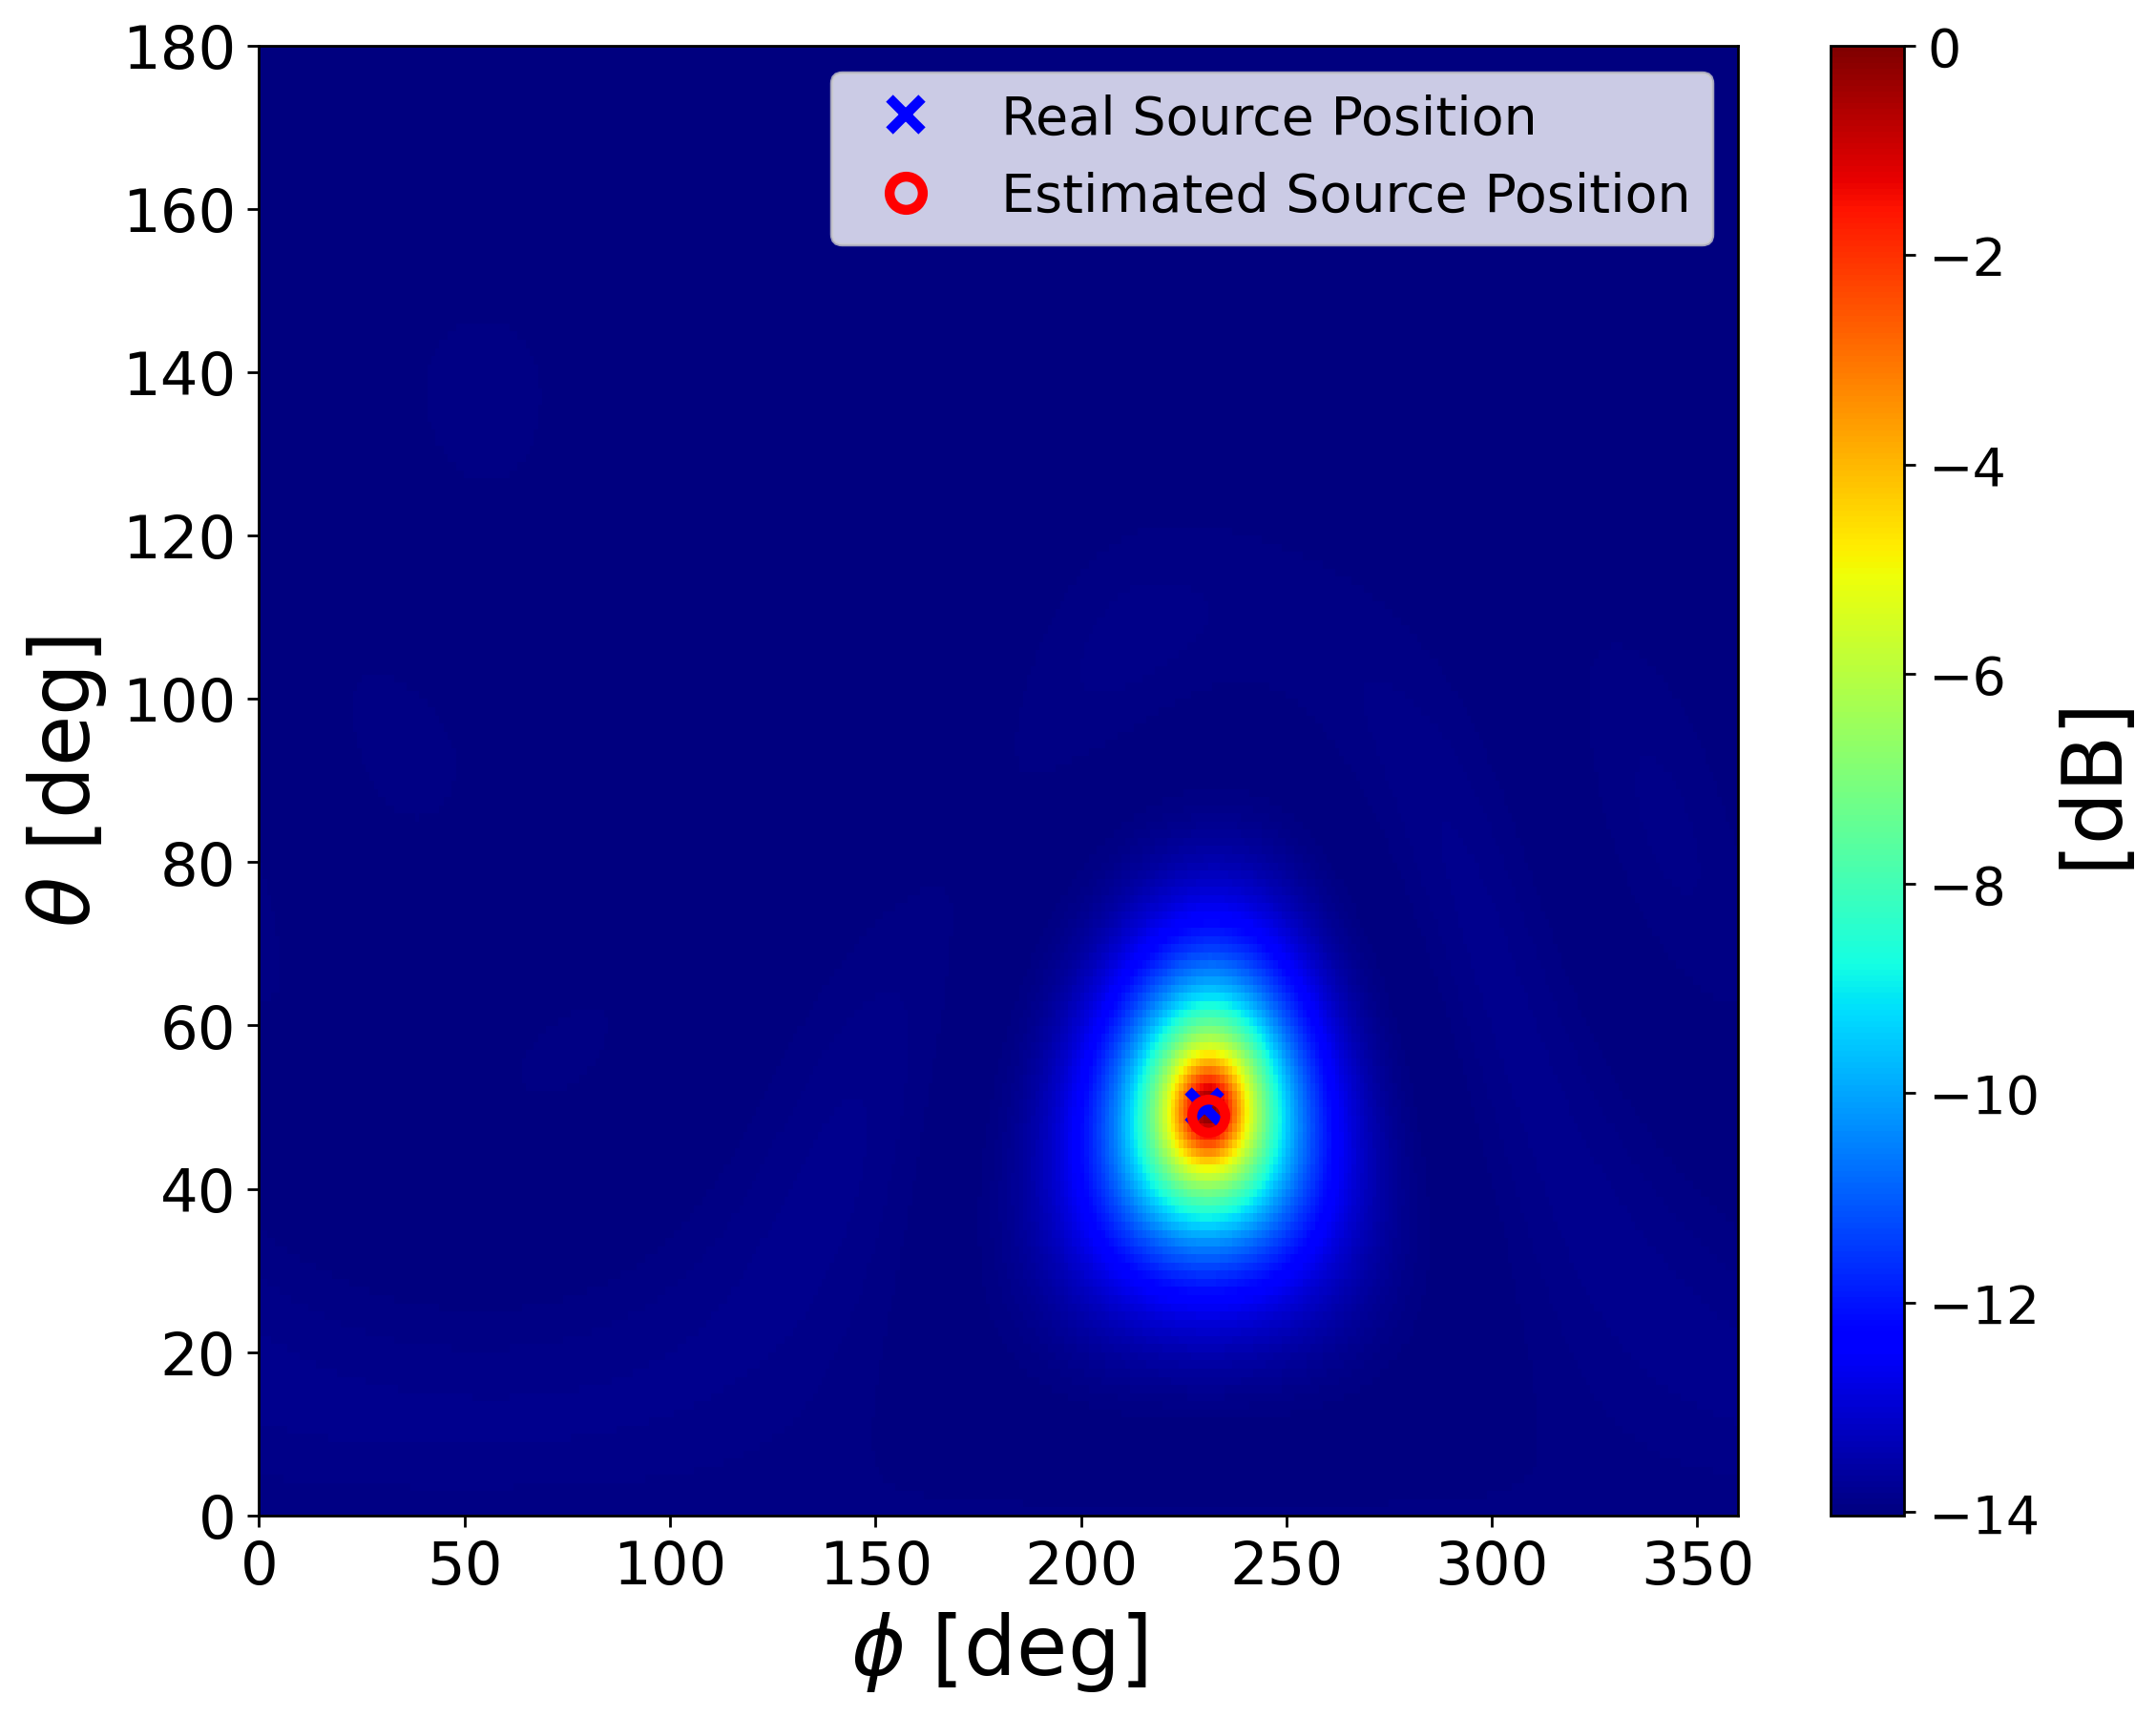

In [16]:
out_mle_rigid, est_mle_rigid = ssl_SHmethod(MicArray32, Theta_l, Phi_l, "SHMLE", "rigid", "2D")


### Room Simulation and Broadband Sound Source Localization
In the previous sections, we mainly introduced the basic principles of sound source localization algorithms, but these primarily used relatively simple sound sources, i.e., single-frequency amplitude sources. Here, we will discuss using the **pyroomacoustics** library for simulating rooms, arrays, and sound sources, and apply algorithms for locating broadband human voice signals in a reverberant noise environment.

#### pyroomacoustics Library
**Pyroomacoustics** is a Python library for audio signal processing and acoustical simulations, particularly providing tools for room acoustics simulation and microphone array processing. This library is intended for researchers and engineers, encapsulating complex acoustical principles and algorithms behind an easy-to-use interface.

##### Key Features

1. **Room Acoustics Simulation**:
   - Supports creating room models of various geometric shapes.
   - Capable of simulating sound wave reflections and attenuation in rooms.
   - Allows defining absorption and scattering coefficients of walls for more realistic simulation of sound behavior on different materials.

2. **Microphone Array Processing**:
   - Offers the functionality to construct and simulate different types of microphone arrays.
   - Supports beamforming, sound source localization, and other spatial filtering techniques.

3. **Sound Source Localization**:
   - Implements various sound source localization algorithms, such as Time Difference of Arrival (TDOA) and beamforming-based methods.
   - Allows simulating the behavior of single or multiple sound sources within a room.

4. **Signal Processing Tools**:
   - Includes a variety of tools for audio signal analysis and processing, such as filter design, signal decomposition, etc.
   - Supports input and output of audio files in different formats.

5. **Simulation and Visualization**:
   - Provides a set of simulation tools for testing and validating acoustical models and algorithms.
   - Contains visualization tools to graphically display room models, sound sources, and microphone array configurations.

For more information: [pyroomacoustics documentation](https://pyroomacoustics.readthedocs.io/en/pypi-release/)

#### Simulation Parameters
The simulation parameters are as follows:
1. Room Simulation: Here we mainly use the dimensions of classroom 019 in the DTU 352 teaching building as the target room, setting dimensions in the simulation to $(9 \times 6 \times 3)$ m.
![Alt text](image-4.png)


2. Microphone Array Simulation: Uses the Eigenmike EM32 spherical uniformly distributed rigid-sphere array, with the number of microphones $Q = 32$ and the maximum spherical harmonic decomposition order of $N = 4$.

3. Sound Source Simulation: In the single microphone array scenario, assuming the center of the microphone array as the origin of the spherical coordinates (aligned with the geometric center of the room), the sound source is assumed to come from $(\theta_s, \phi_s)$, where $\theta_s = 50\degree$, $\phi_s = 230\degree$, and the source is 2.1 m from the origin. The source contains a 2s clean voice sample saying "Please call stella", with a sampling rate of $f_s = 16kHz$ and a frame length of $K = 1024$.

In [8]:
### The room properties
room_dim = np.array([9, 6, 3])
ori_coor = room_dim/2

**Setting up the sound source**

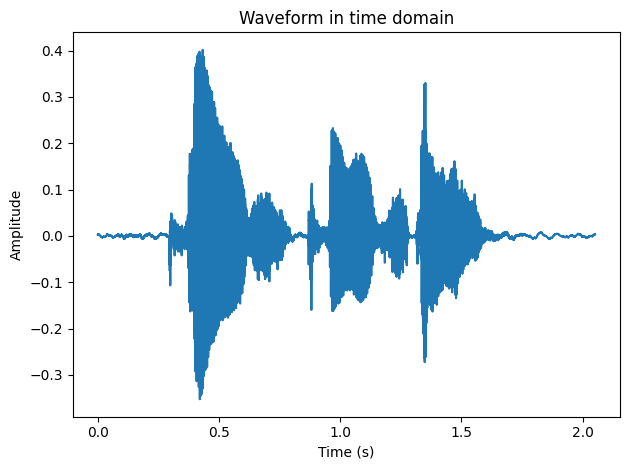

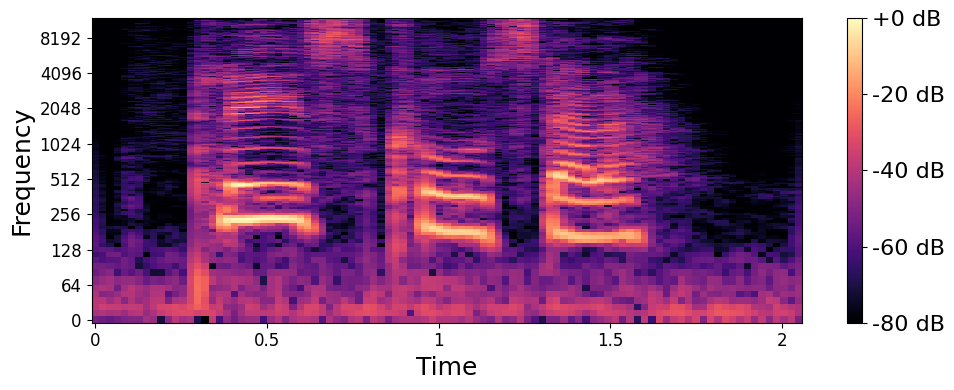

In [8]:
### Sound Source
mic_signals_speech, fs, num_channels = soundread('D:/Coderlife/SSL in spherical domain/Data/speech@24kHz.wav')
plot_wave(mic_signals_speech, fs)
plot_stft(mic_signals_speech, fs)
Theta_l = 50/180 * np.pi
Phi_l = 230/180 * np.pi
source_pos_car = 50*radius * np.array([np.sin(Theta_l) * np.cos(Phi_l), np.sin(Theta_l) * np.sin(Phi_l), np.cos(Theta_l)])
source_pos_car_cal = source_pos_car + ori_coor
source_pos_car_list = [source_pos_car_cal]
signal_list = [mic_signals_speech]



**Setting up the Microphone array**

In [19]:
mic_pos_car = [sph2cart(r,theta,phi) for r,theta,phi in mic_pos_sph]
mic_pos_car = np.array(mic_pos_car)
mic_pos_car_cal = mic_pos_car + ori_coor
mic_arrays_car = [mic_pos_car_cal]

**Setting Up the Room**

In the setRoom function, we place a sound source with a human voice signal in the simulated Anechoic or reverberant room and capture it using the corresponding EM32 spherical microphone array. The microphones are positioned at the specified origin point.

In [20]:
from tools import setRoom
anechoic_room = setRoom(room_dim, mic_arrays_car, source_pos_car_list, signal_list, "Anechoic")
reverberant_room ,rt60_est= setRoom(room_dim, mic_arrays_car, source_pos_car_list, signal_list, "Reverb",0.4)
print(f'The simulated rt60 is', rt60_est)

The simulated rt60 is 0.6370234374999999


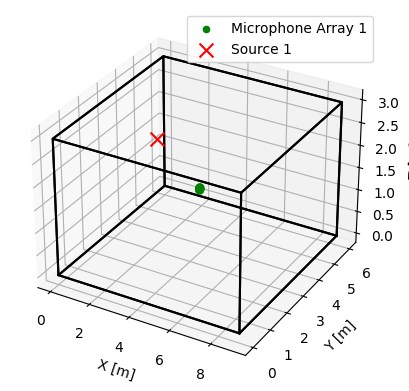

In [21]:
from plot_tools import plot_option
plot_option(reverberant_room, mic_arrays_car, source_pos_car_list)

Adjust the SNR and set the signal to be in an environment with a reverberation time of $T_{60} = 0.6s$ and an SNR of 15

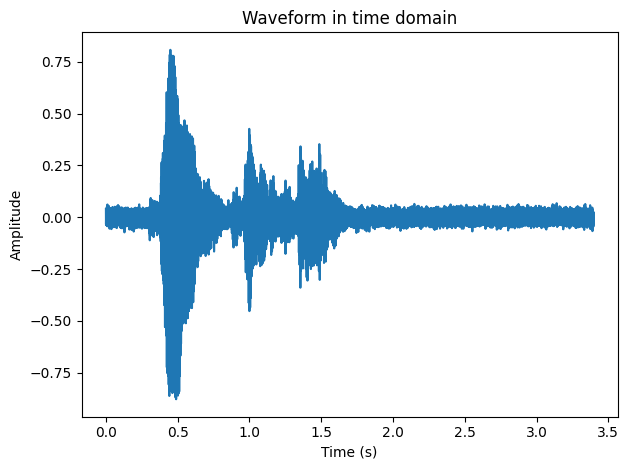

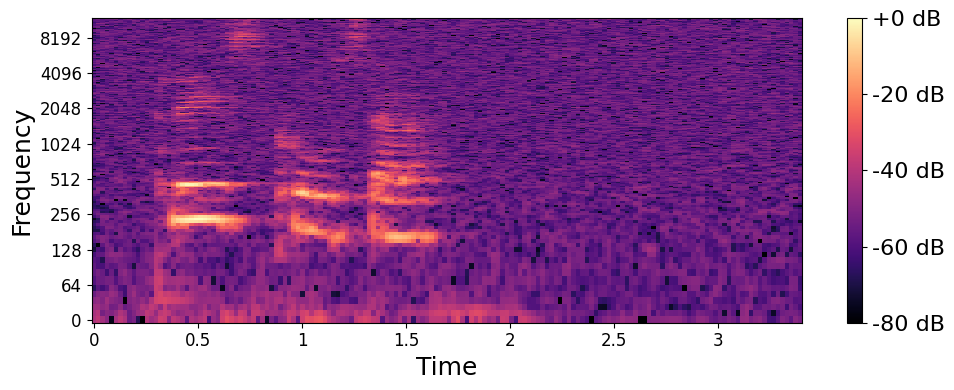

In [22]:
file_path = "/content/Classical-Sound-Source-Localization-Algorithms-in-Spherical-Domain/Reverberant/Array_output_0/source0.wav"
signal_processed = pra.create_noisy_signal(file_path,15)
mic_signals_noisy = signal_processed[0]
plot_wave(mic_signals_noisy[:, 0], fs)
plot_stft(mic_signals_noisy[:, 0], fs)

d:\Coderlife\SSL in spherical domain\tools.py:659: RuntimeWarning: invalid value encountered in scalar divide
  bn[n ** 2:(n + 1) ** 2, k] = 4 * np.pi * (1j) ** n * (jn_ka - jn_ka_der / hn2_ka_der * hn2_ka)


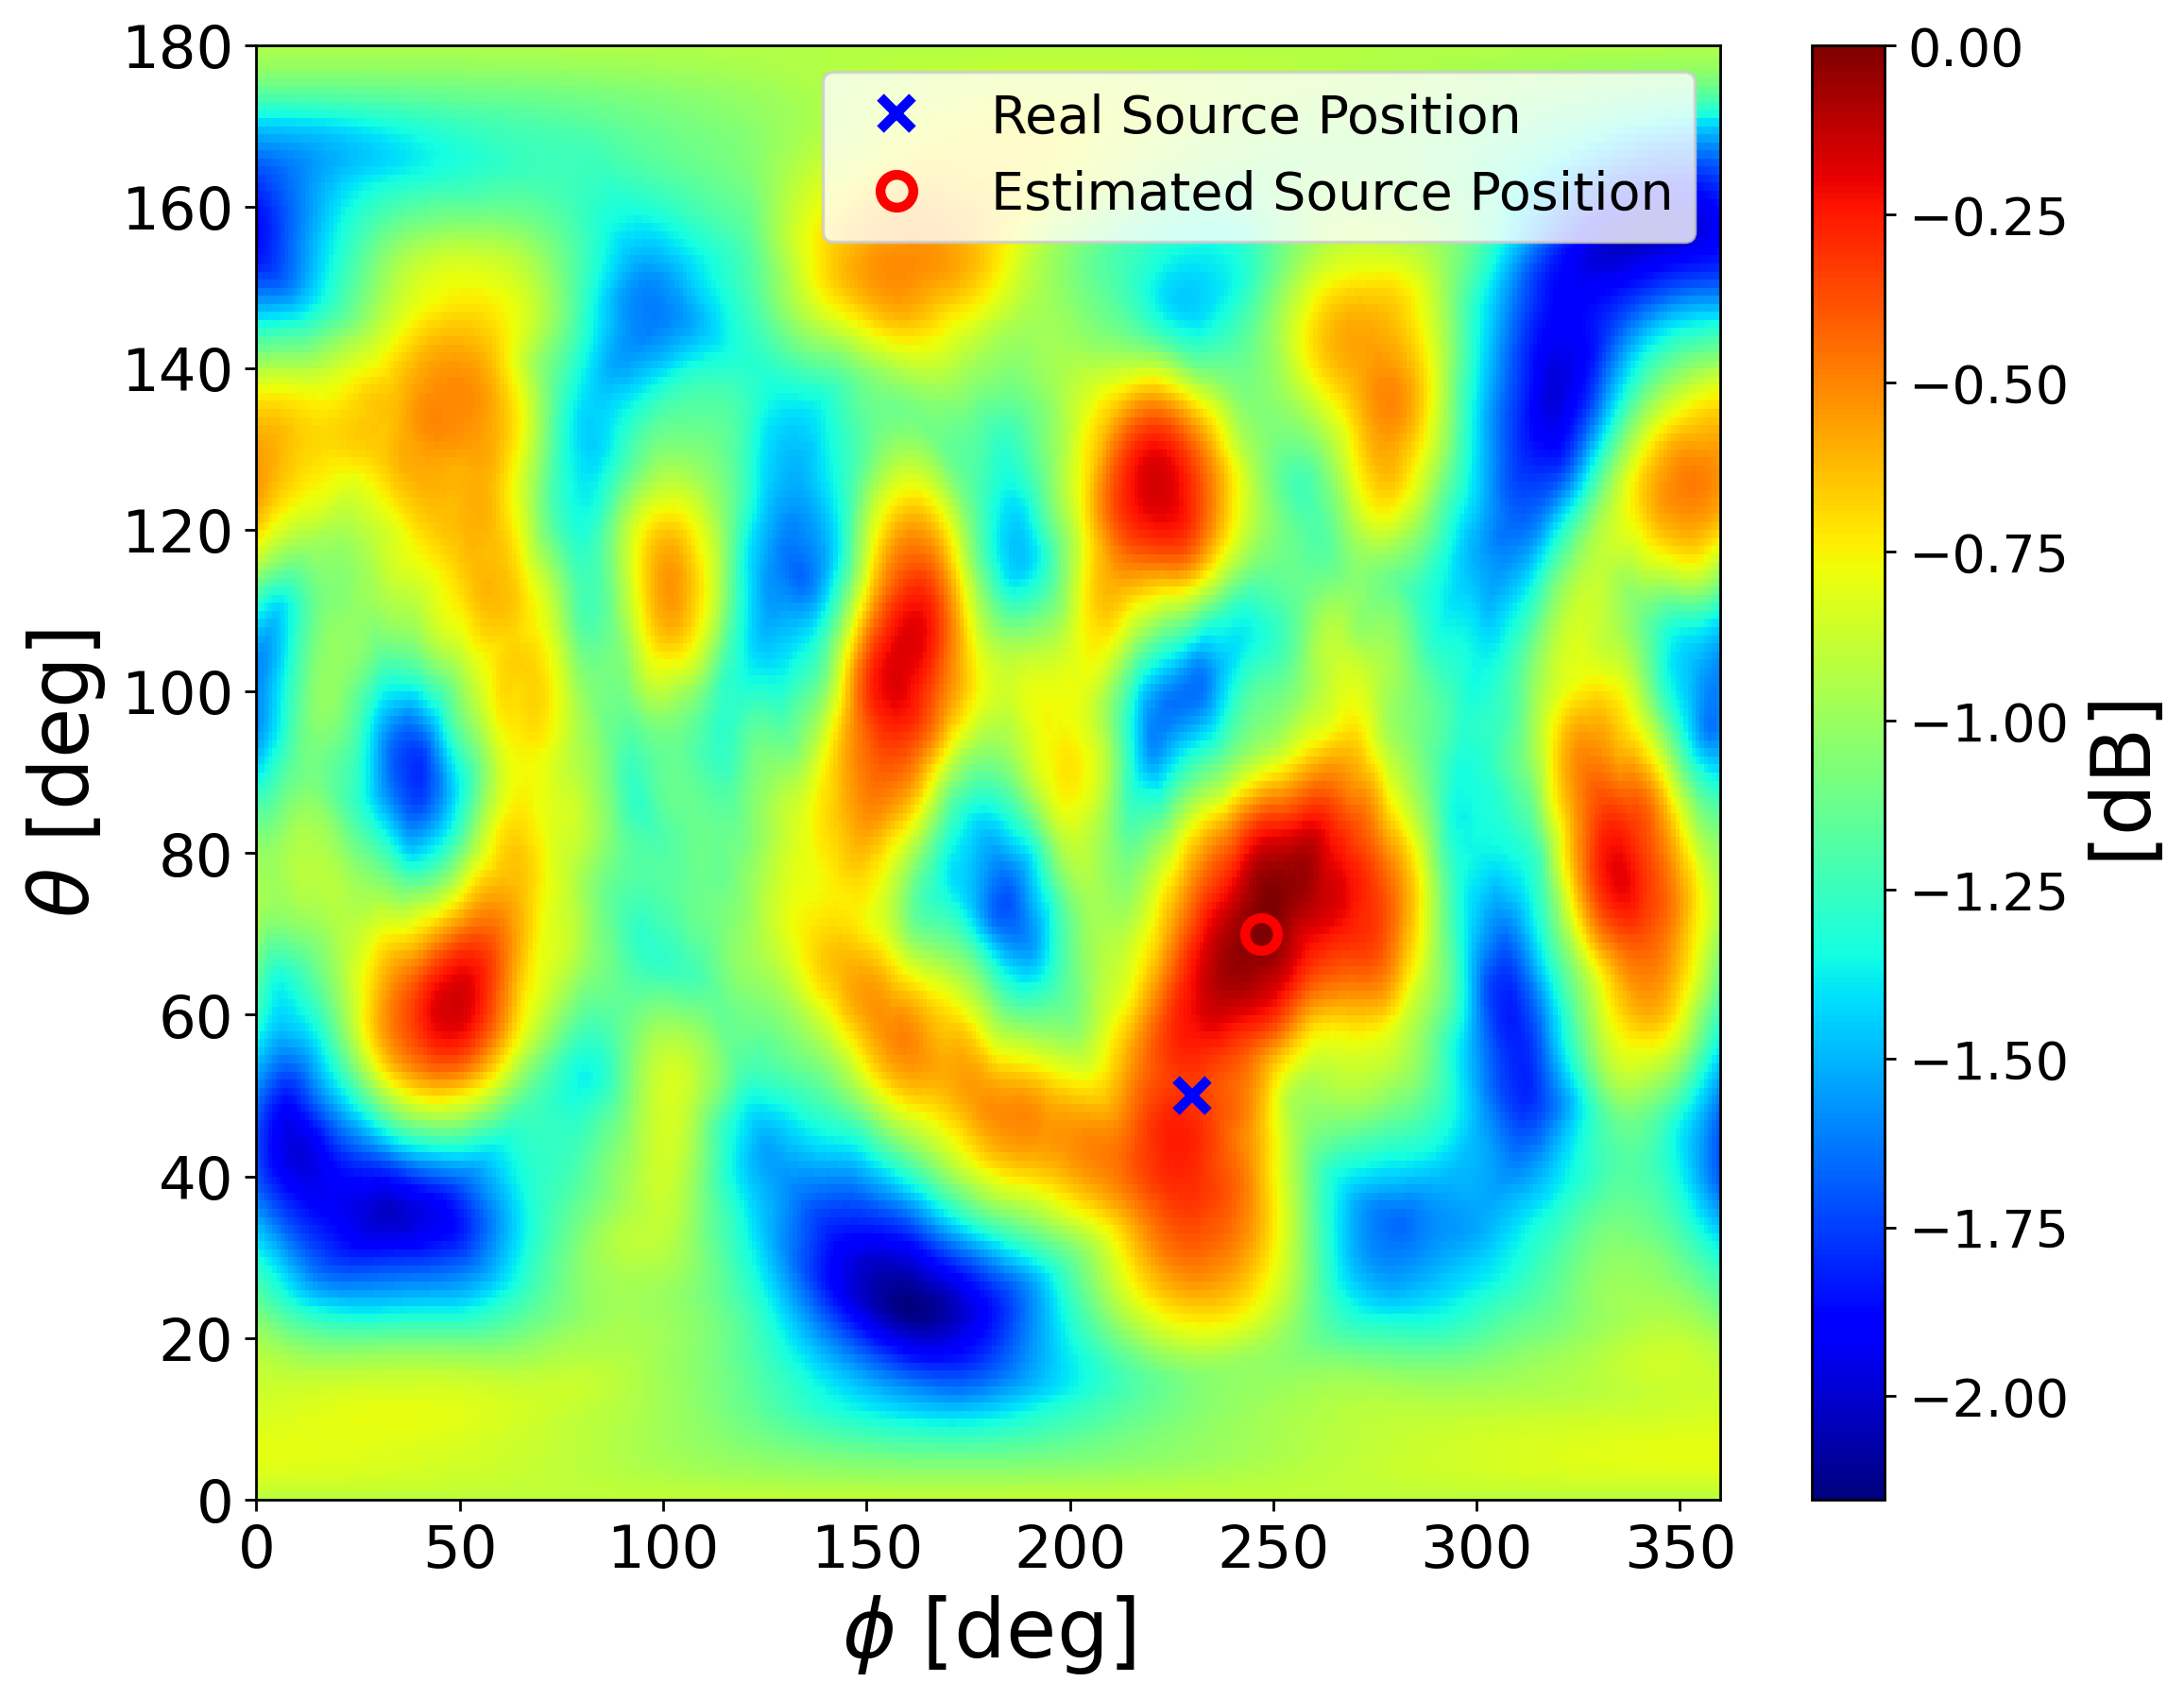

In [23]:
out_PWD, pos_est_PWD = ssl_SHmethod_broad(mic_signals_noisy,fs,mic_pos_sph,Theta_l,Phi_l,"PWD","rigid","2D",resolution = 1)

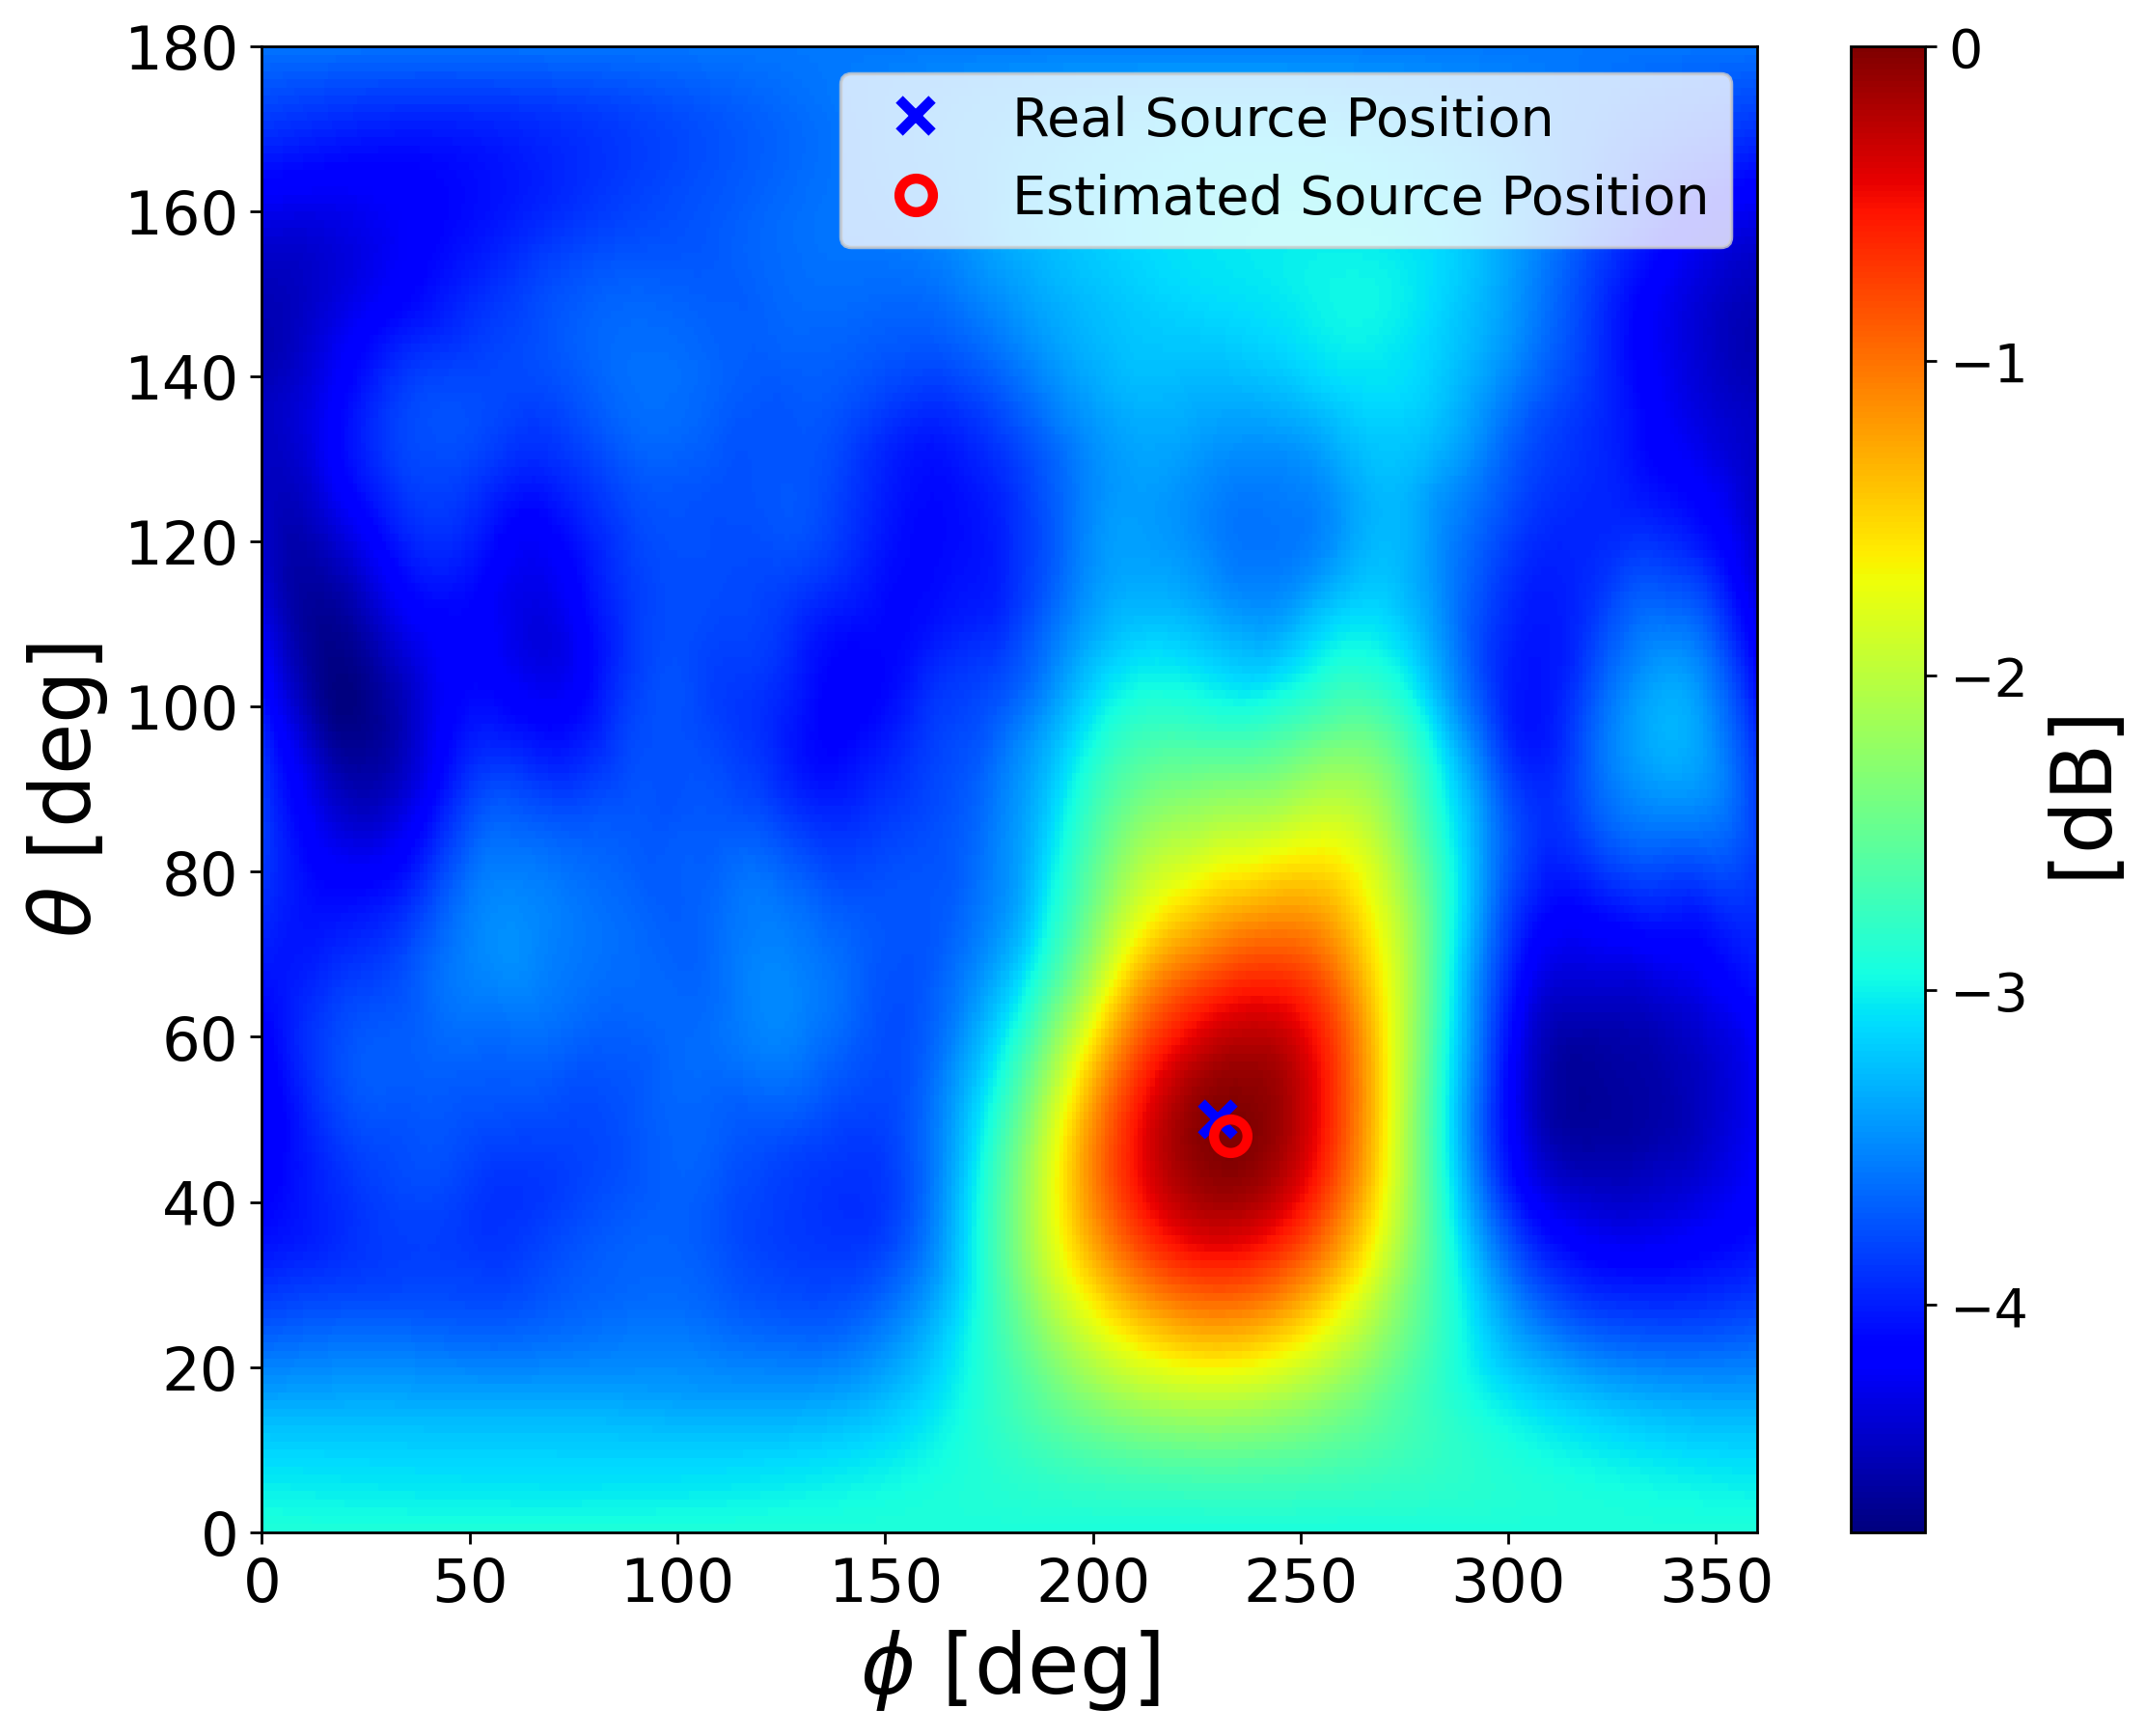

In [24]:
out_DAS, pos_est_DAS= ssl_SHmethod_broad(mic_signals_noisy,fs,mic_pos_sph,Theta_l,Phi_l,"DAS","rigid","2D",resolution = 1)

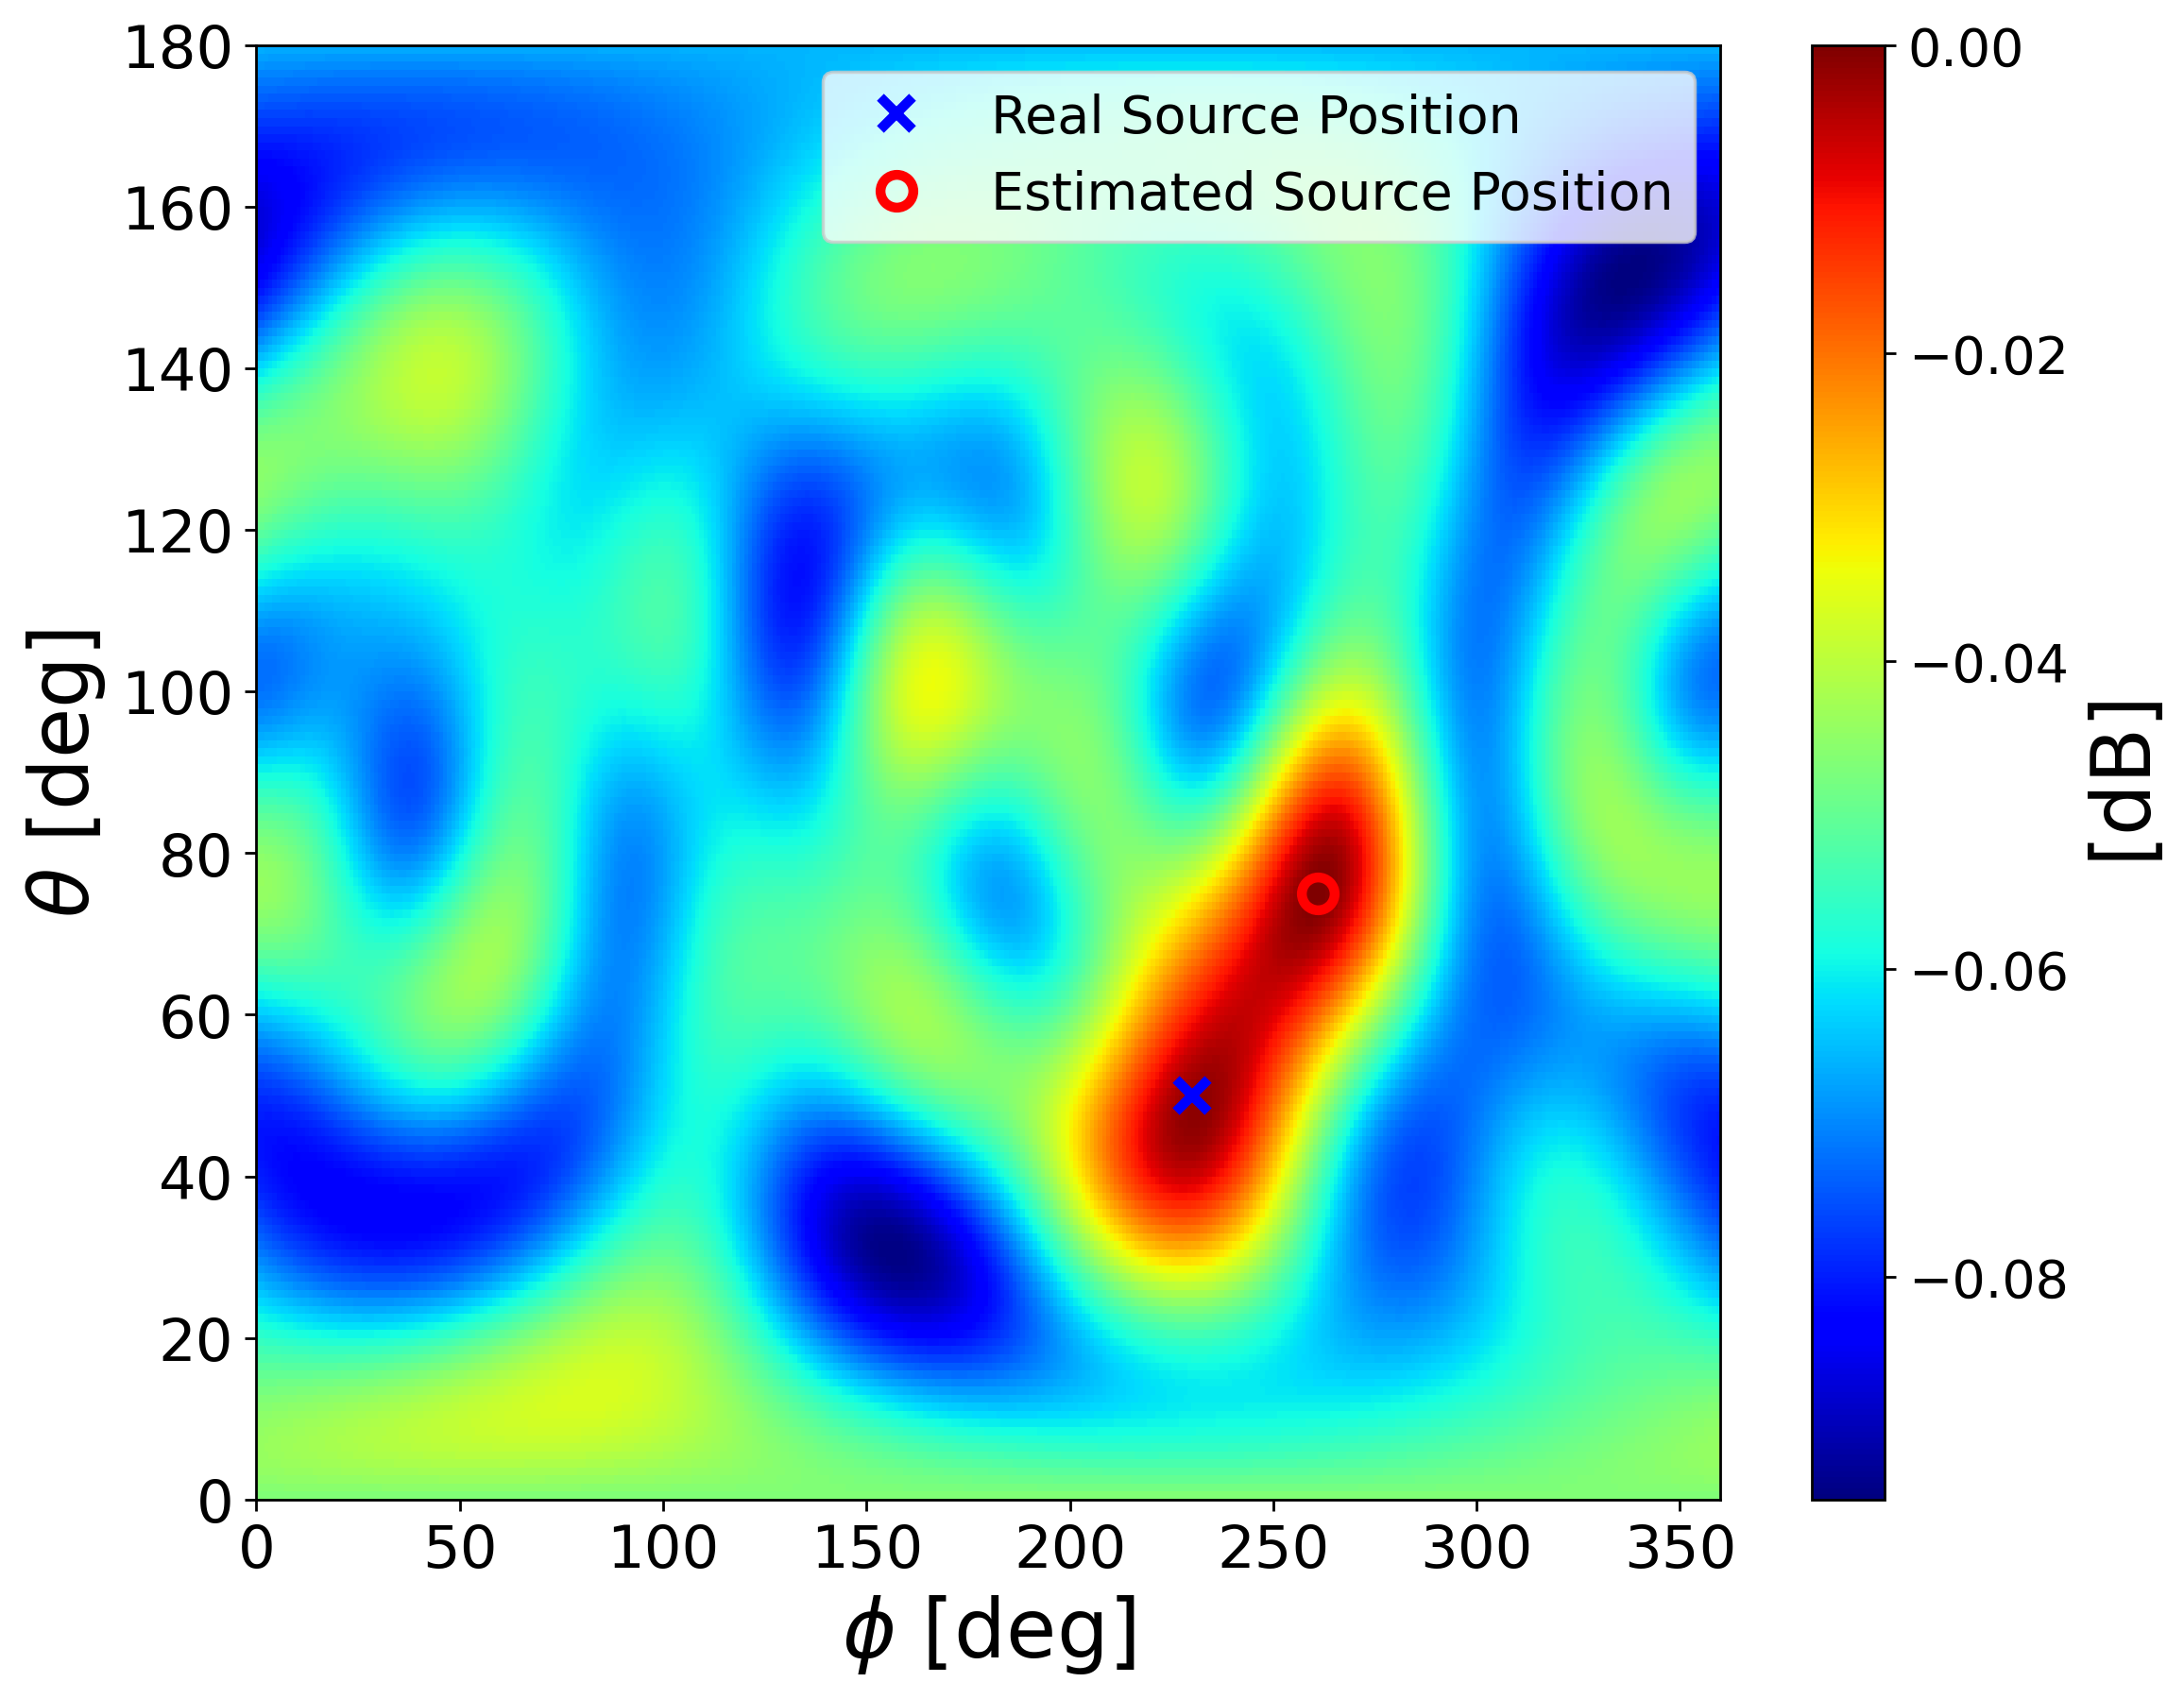

In [25]:
out_SHMUSIC, pos_est_SHMUSIC = ssl_SHmethod_broad(mic_signals_noisy,fs,mic_pos_sph,Theta_l,Phi_l,"SHMUSIC","rigid","2D",resolution = 1)

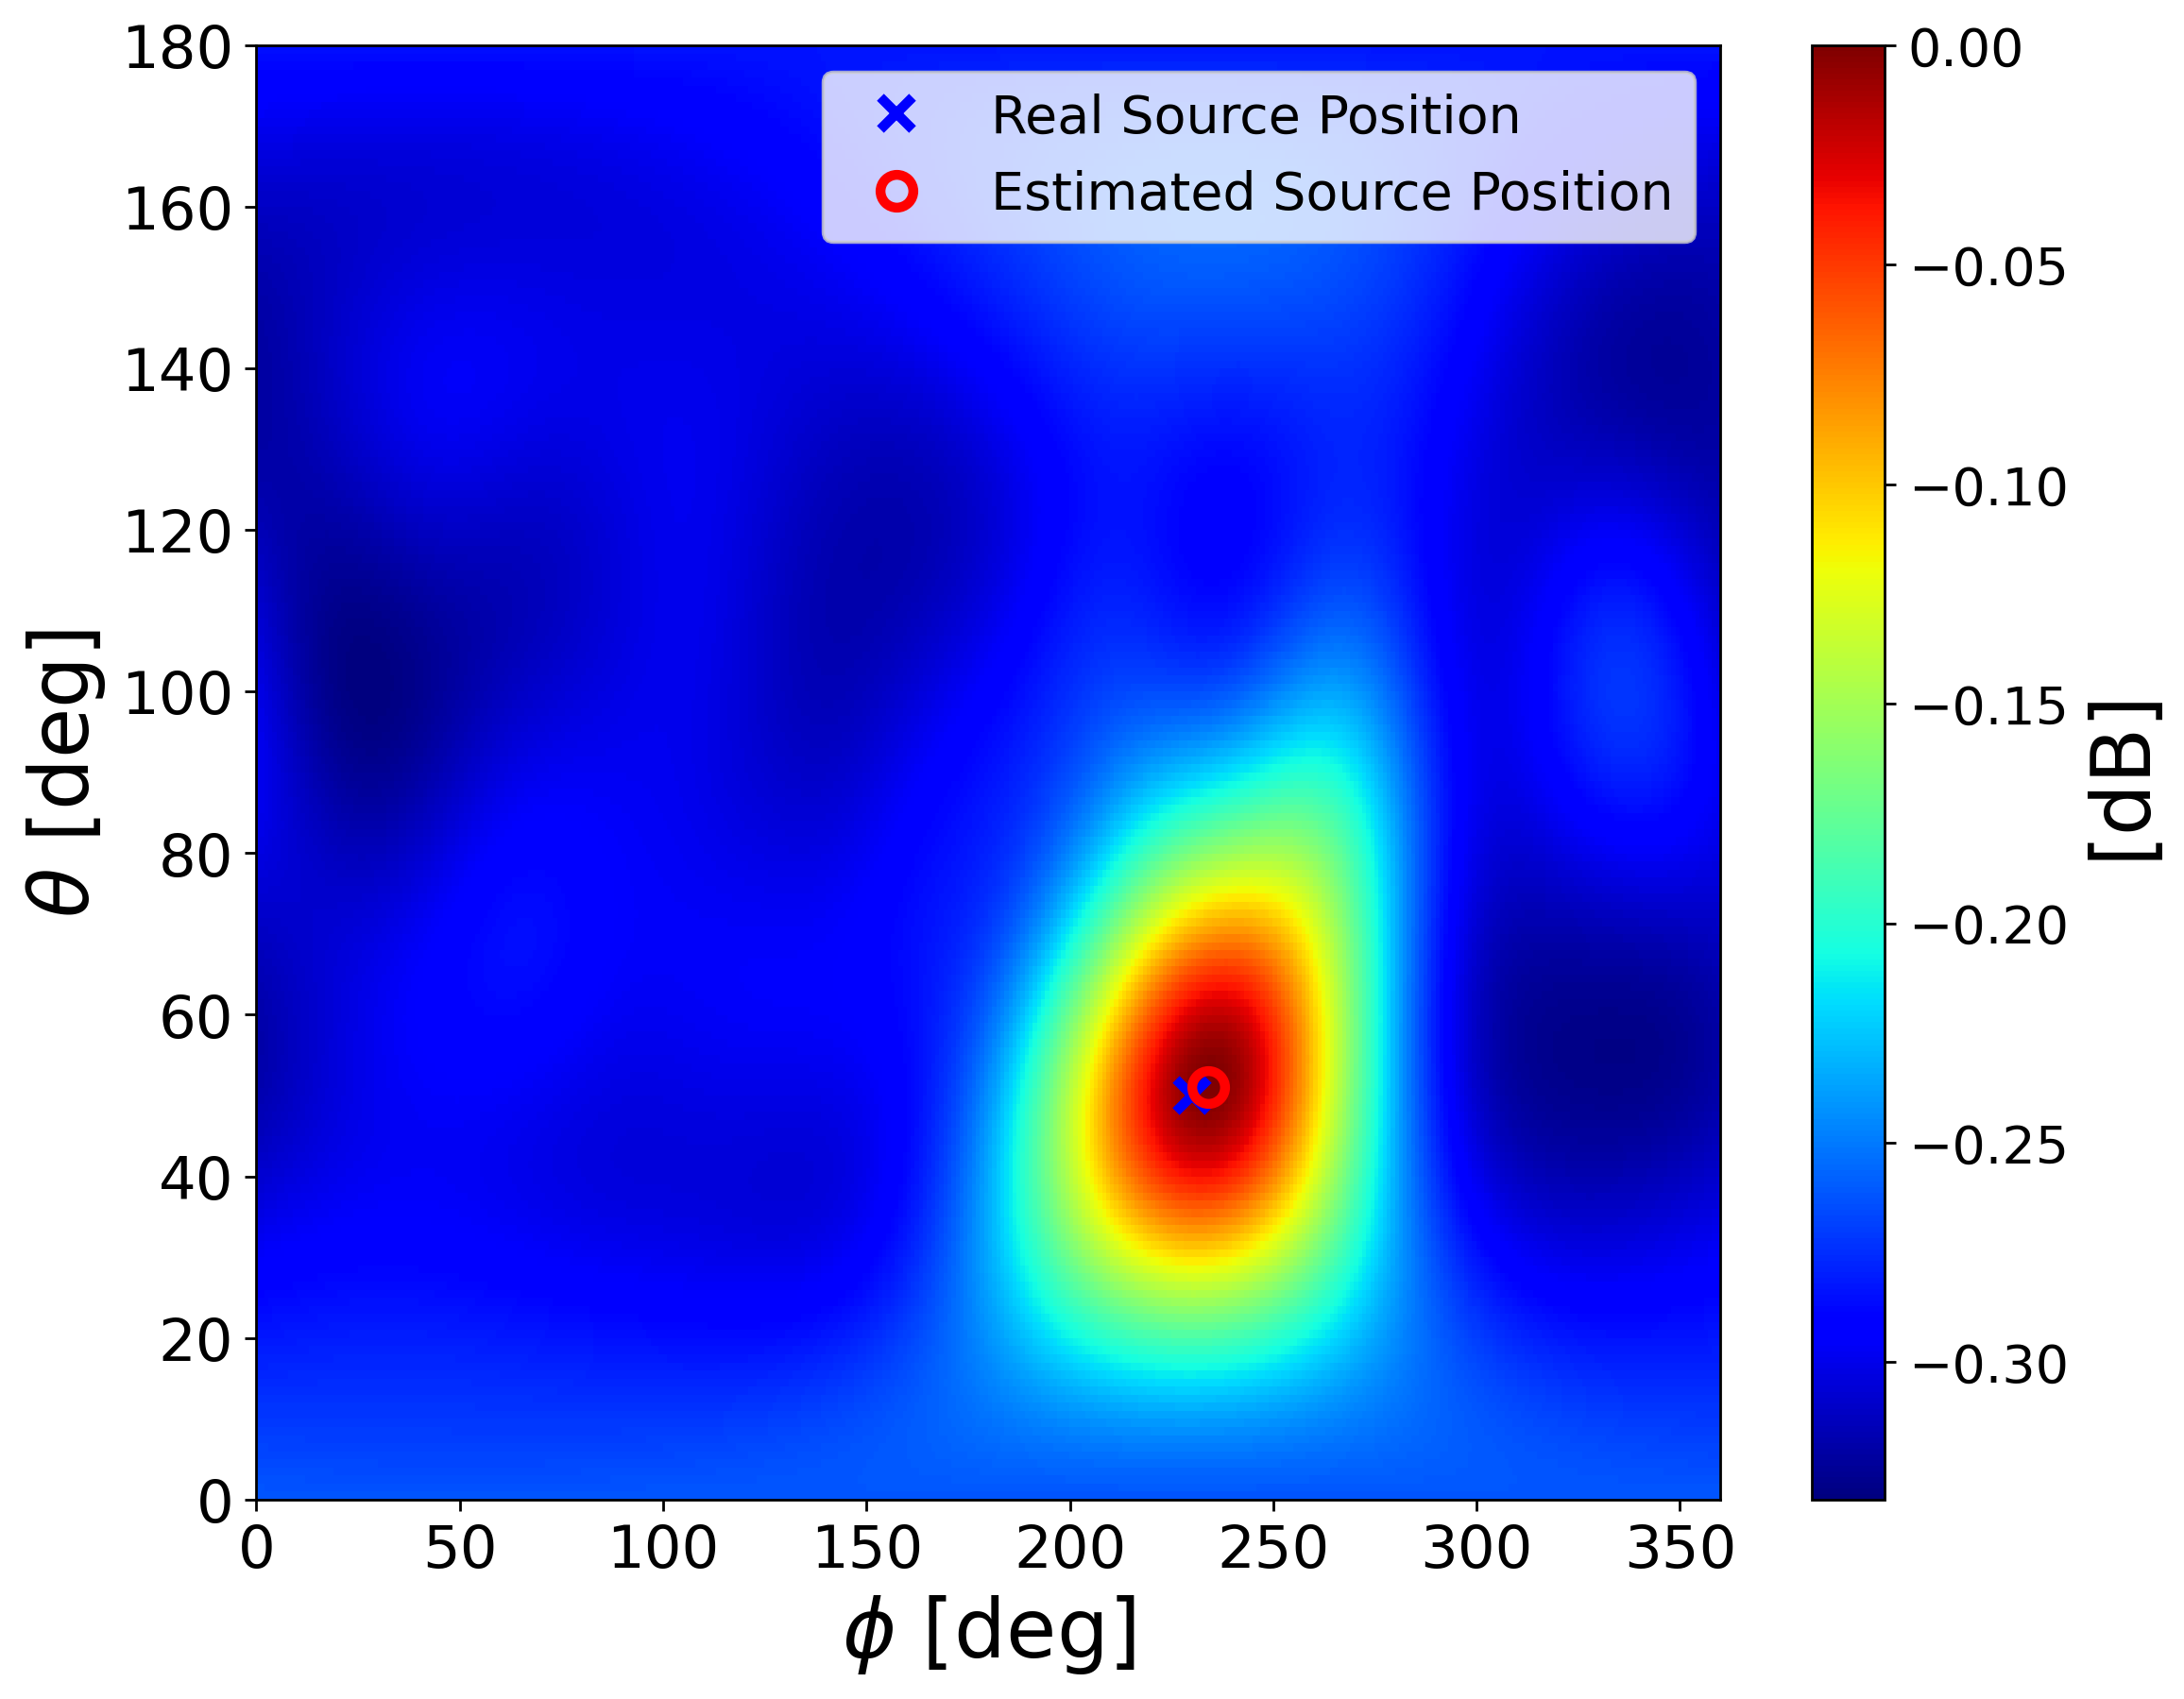

In [26]:
out_MVDR, pos_est_MVDR = ssl_SHmethod_broad(mic_signals_noisy,fs,mic_pos_sph,Theta_l,Phi_l,"SHMVDR","rigid","2D",resolution = 1)

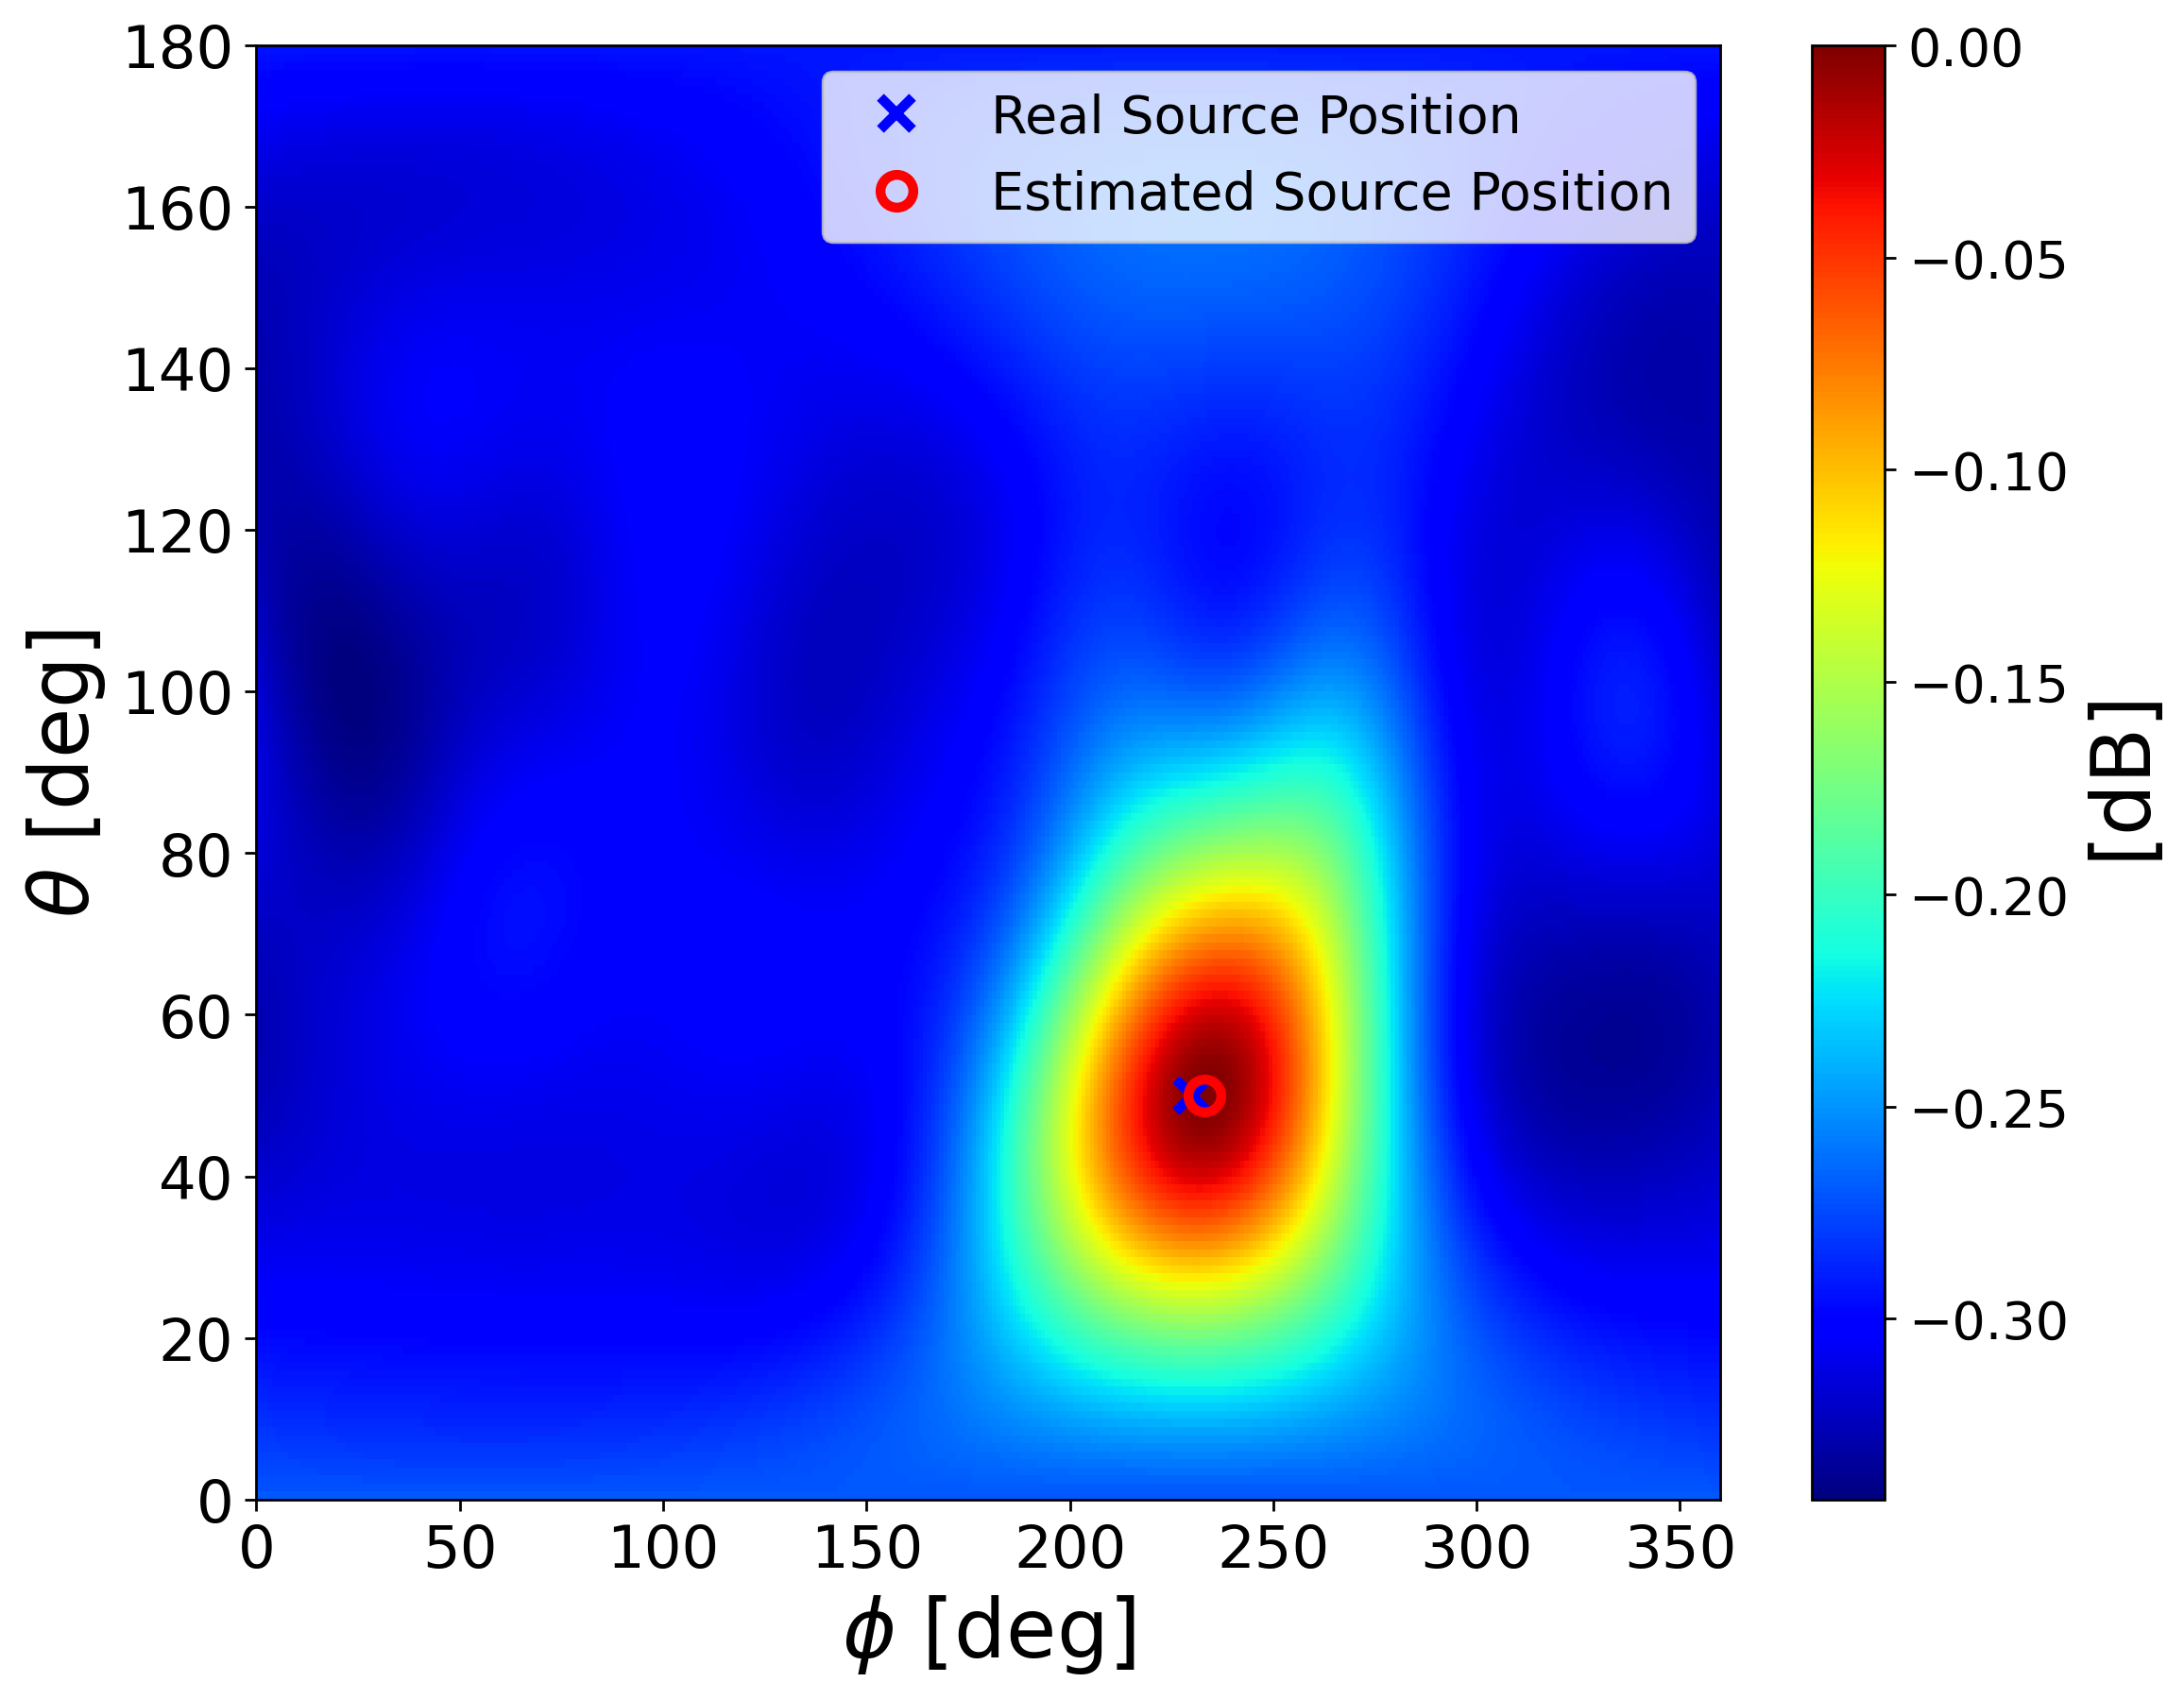

In [27]:
out_SHMLE, pos_est_SHMLE = ssl_SHmethod_broad(mic_signals_noisy,fs,mic_pos_sph,Theta_l,Phi_l,"SHMLE","rigid","2D",resolution = 1)

From the results above, it can be seen that the PWD and SHMUSIC algorithms perform poorly in reverberant and noisy environments. Although the MVDR algorithm can achieve higher spatial resolution and localization accuracy, its computational cost is too high. On the other hand, the SHMLE algorithm maintains good localization accuracy and spatial resolution while also having a more favorable computational cost.

#### Multi-Source Localization
In this section, we consider introducing multiple sound sources for localization to see the results. We consider one sound source coming from $(90\degree, 150\degree)$ and another from $(90\degree, 210\degree)$. Here, we mainly focus on the performance of three high-resolution algorithms, while other simulation settings remain consistent with the previous single-source setup, all conducted in an environment with $T_{60} = 0.6s$ and SNR = 15 for localization.

In [5]:
from tools import setRoom_multi

In [6]:
mic_signals_ori, fs, num_channels = soundread('/content/Classical-Sound-Source-Localization-Algorithms-in-Spherical-Domain/Data/speech@24kHz.wav')
mic_signals1 = mic_signals_ori
mic_signals2 = mic_signals_ori
# The spherical coordinate of sound source
Theta_s1 = 90/180 * np.pi
Phi_s1 = 100/180 * np.pi
source1_pos_car = 50*radius * np.array([np.sin(Theta_s1) * np.cos(Phi_s1), np.sin(Theta_s1) * np.sin(Phi_s1), np.cos(Theta_s1)])
Theta_s2 = 90/180 * np.pi
Phi_s2 = 300/180 * np.pi
source2_pos_car = 50*radius * np.array([np.sin(Theta_s2) * np.cos(Phi_s2), np.sin(Theta_s2) * np.sin(Phi_s2), np.cos(Theta_s2)])
Theta_real = [Theta_s1, Theta_s2]
Phi_real = [Phi_s1, Phi_s2]

In [ ]:
mic_pos_car_cal = mic_pos_car + ori_coor
source1_pos_car_cal = source1_pos_car + ori_coor
source2_pos_car_cal = source2_pos_car + ori_coor

mic_pos_sph_cal = cart2sph(mic_pos_car_cal)
signal_list = [mic_signals1, mic_signals2]
source_pos_car_list = [source1_pos_car_cal, source2_pos_car_cal]

0.6272858072916667


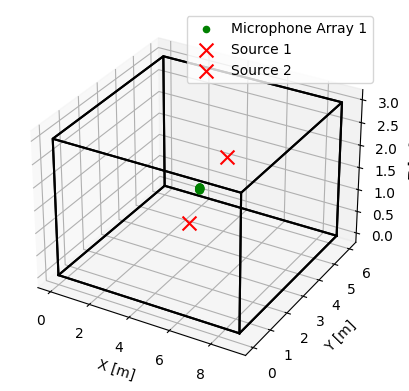

In [92]:
# Add the sources and the microphone array to the room
anechoic_room = setRoom_multi(room_dim, mic_pos_car_cal, source_pos_car_list, signal_list, "Anechoic")

reverb_room,rt60 = setRoom_multi(room_dim, mic_pos_car_cal, source_pos_car_list, signal_list, "Reverb",0.4)
print(rt60)
plot_option(reverb_room,[mic_pos_car_cal],source_pos_car_list)

In [93]:
file_path ='/content/Classical-Sound-Source-Localization-Algorithms-in-Spherical-Domain/Reverberant/Array_output0.wav'
signal_processed = pra.create_noisy_signal(file_path,15)
mic_signals = signal_processed[0]

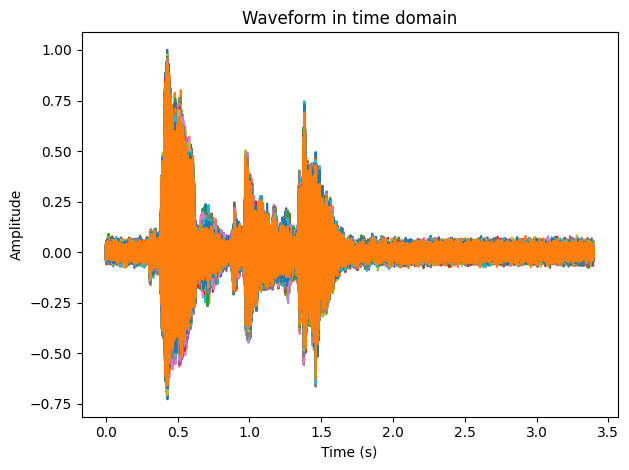

In [94]:
plot_wave(mic_signals,fs)

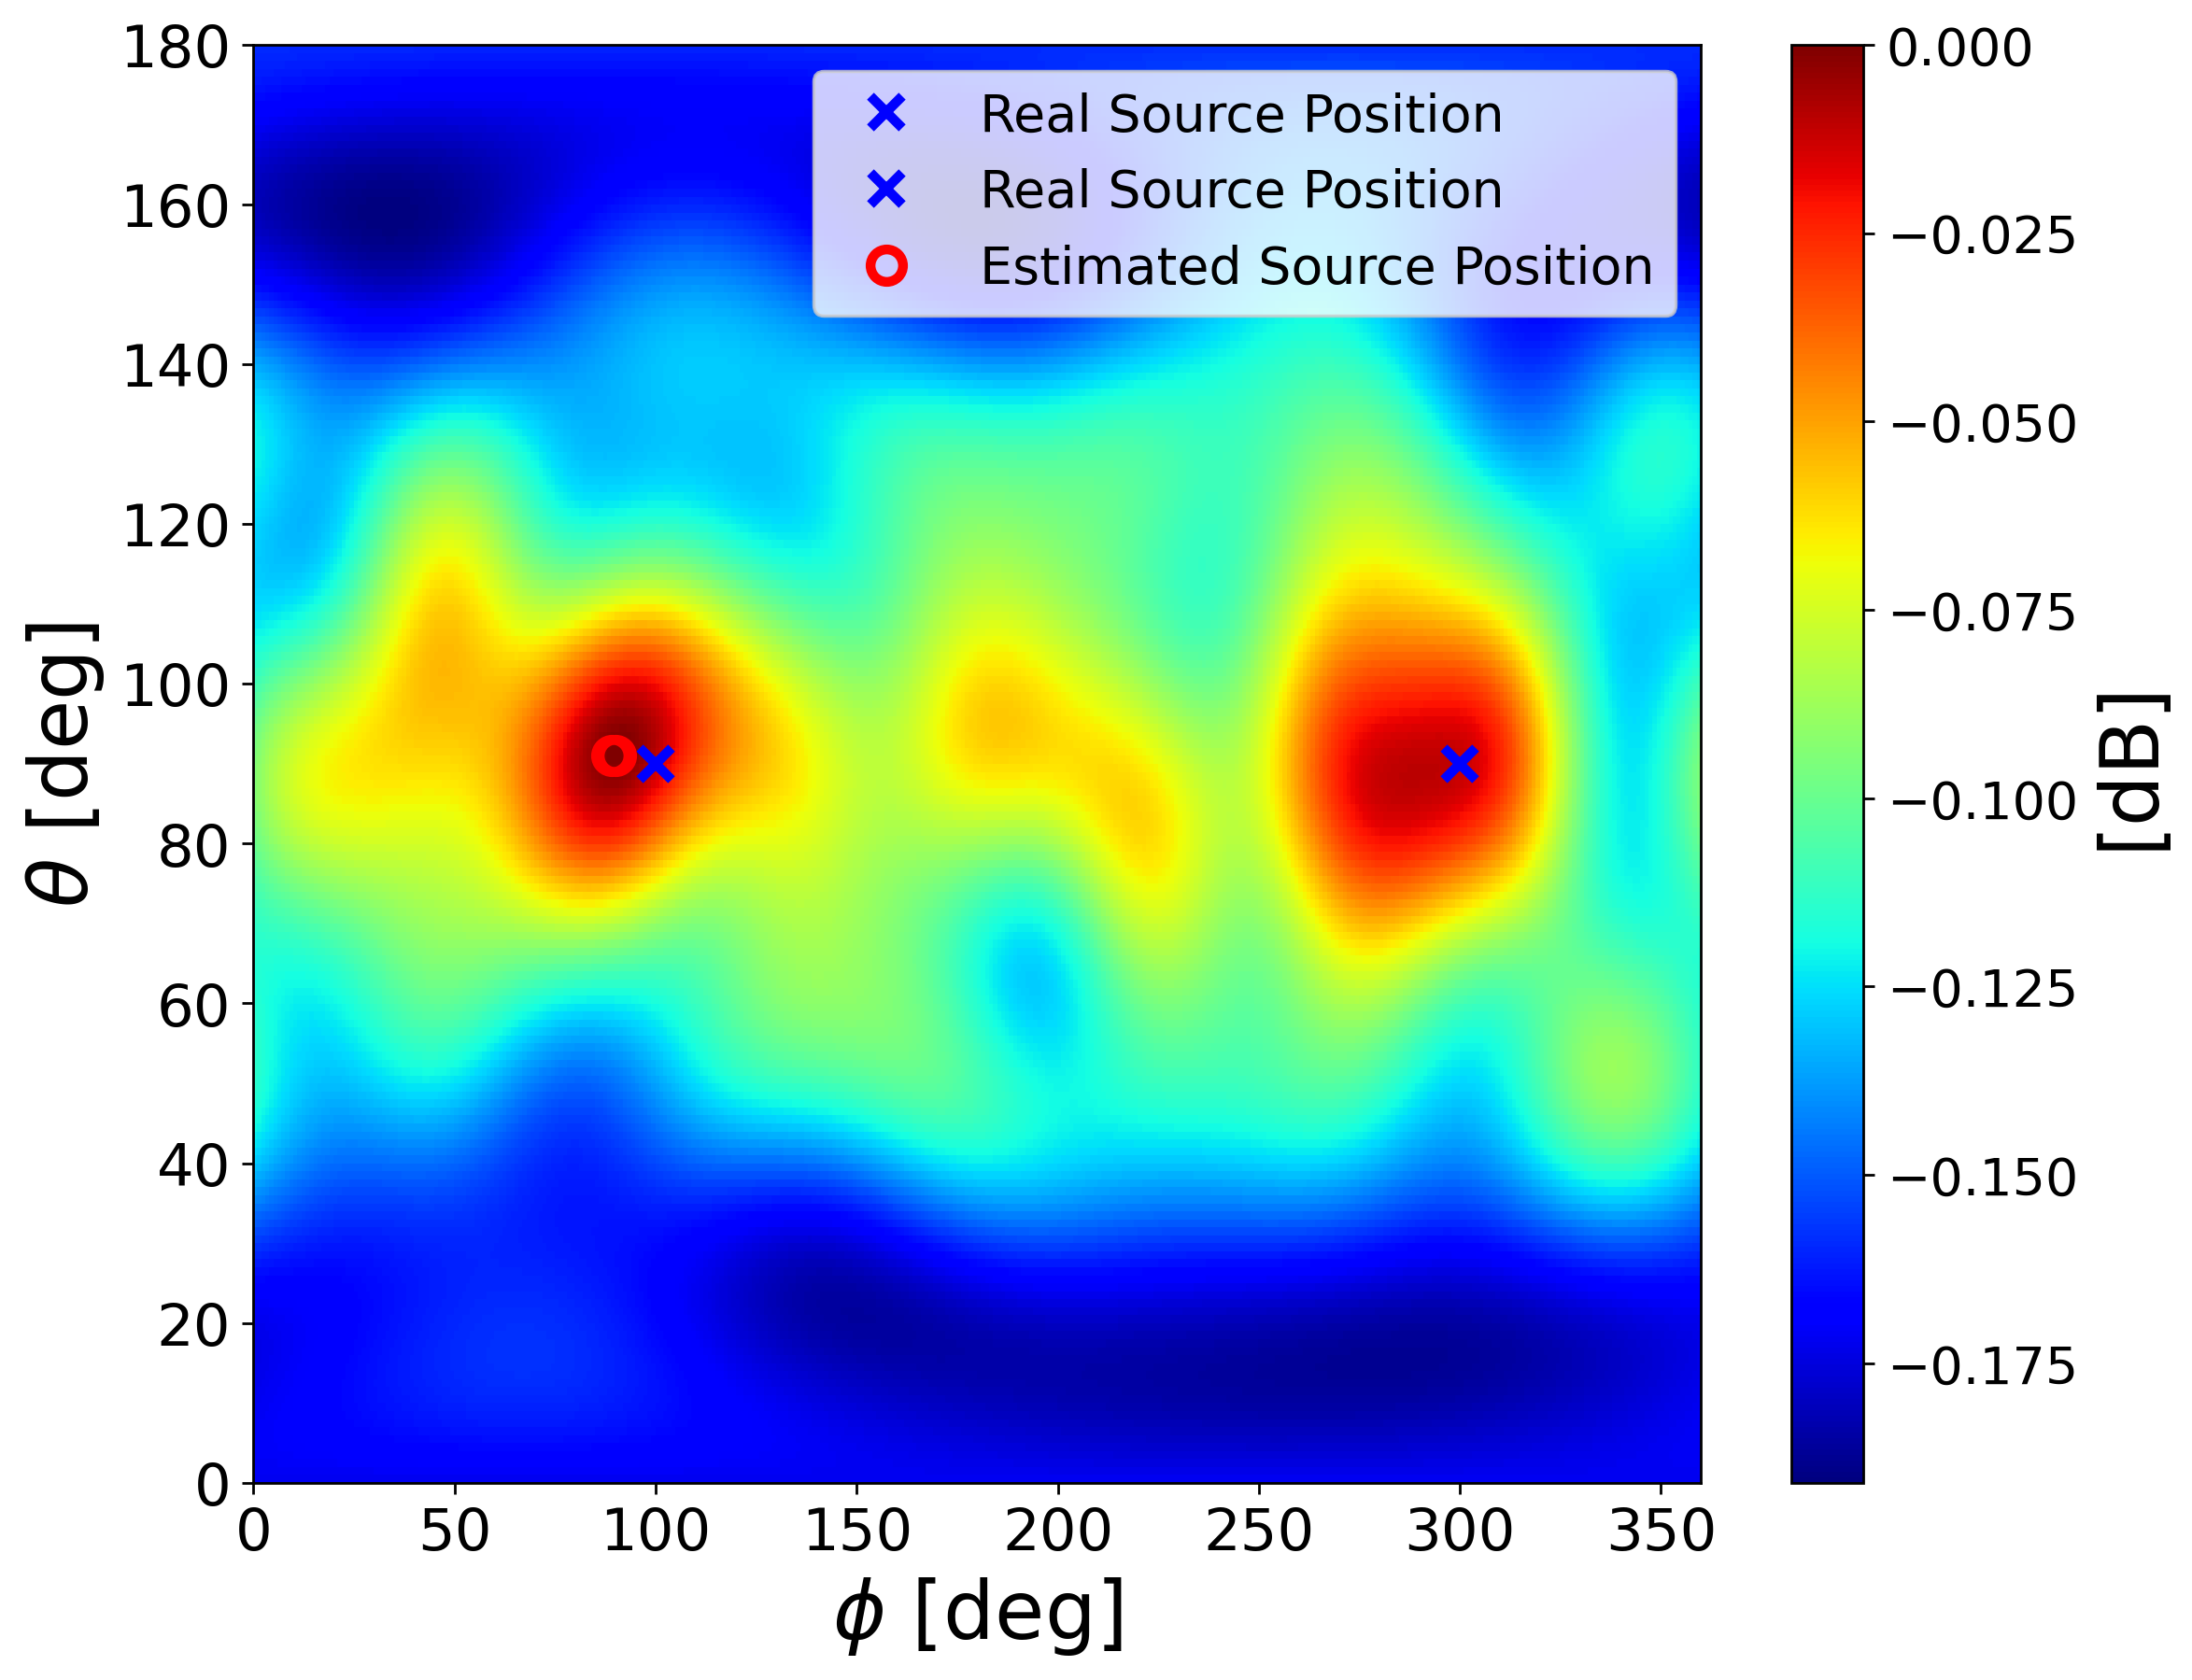

In [95]:
out_SHMUSIC, est_SHMUSIC = ssl_SHmethod_broad(mic_signals,fs,mic_pos_sph,Theta_real,Phi_real,"SHMUSIC","rigid","2D",resolution=1,num_sources=2)

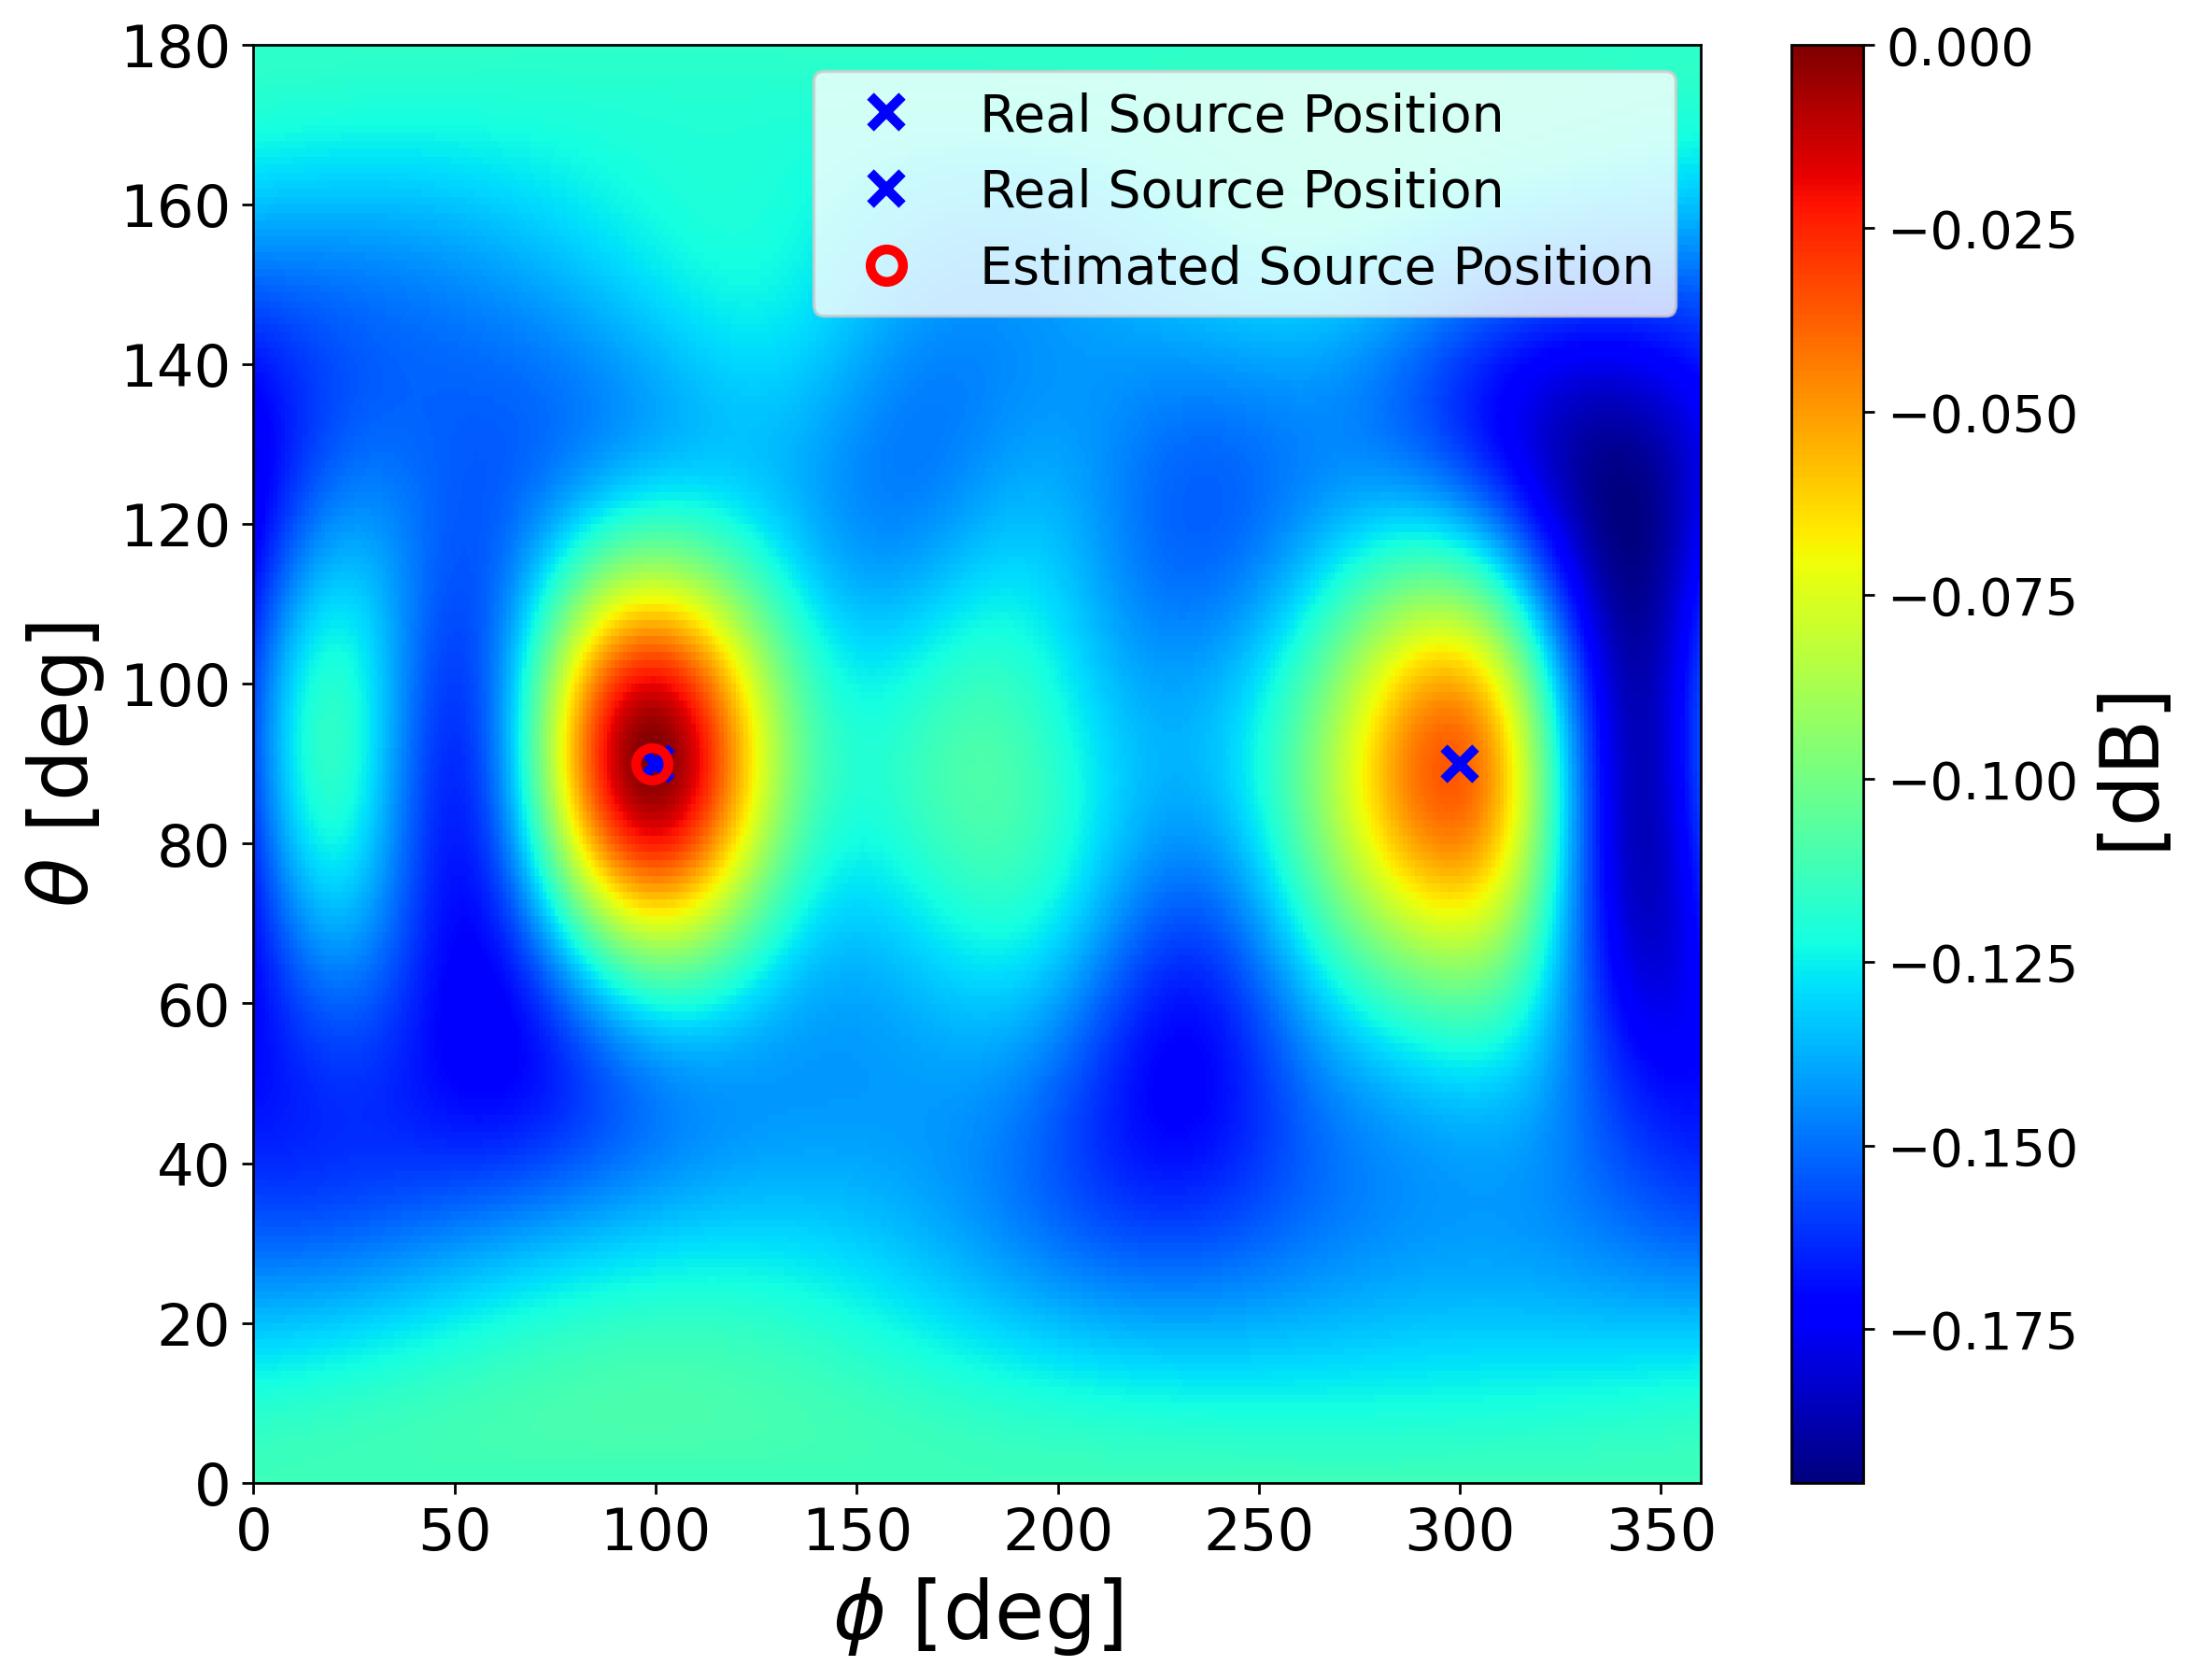

In [96]:
out_SHMUSIC, est_SHMUSIC = ssl_SHmethod_broad(mic_signals,fs,mic_pos_sph,Theta_real,Phi_real,"SHMLE","rigid","2D",resolution=1,num_sources=2)

In [97]:
out_SHMUSIC, est_SHMUSIC = ssl_SHmethod_broad(mic_signals,fs,mic_pos_sph,Theta_real,Phi_real,"SHMVDR","rigid","2D",resolution=1,num_sources=2)

### Multi-Array Localization of a Single Sound Source
In our previous discussions, we explored how to use a single spherical microphone array to locate a narrowband single sound source with unit amplitude, a wideband human voice single source, and multiple wideband human voice sources. This time, we will shift our focus to using a dual microphone array for the localization of a single sound source. This method not only improves spatial resolution but also significantly enhances the accuracy of localization. Although we have not yet had the opportunity to experiment with multi-spherical microphone array localization of multiple sound sources, implementing this based on our established framework should be a straightforward task.

![Geometry of multiple microphone arrays](https://i.ibb.co/55mBGmg/image.png)

In [20]:
# Import neccessary libraries
from MicrophoneArray import EigenmikeEM32
from tools import setRoom
from plot_tools import plot_option_multiArray
from tools import ssl_SHmethod_broad

In [21]:
room_dim = np.array([9,6,3])
ori_coor = room_dim/2

In [22]:
# Define the first Eigenmike EM32 microphone array
eigenmike1 = EigenmikeEM32()
mic_pos_sph1 = []
radius = 0.042
for theta,phi in zip(eigenmike1._thetas, eigenmike1._phis):
    mic_pos_sph1.append([radius,theta,phi])
mic_pos_sph1 = np.array(mic_pos_sph1)
mic_pos_car1 = [sph2cart(r,theta,phi) for r,theta,phi in mic_pos_sph1]
mic_pos_car1 = np.array(mic_pos_car1)
mic_pos_car_cal1 = mic_pos_car1 + ori_coor+np.array([0, -2, 0]) # update the origin coordinates
# Define the second Eigenmike EM32 microphone array
eigenmike2 = EigenmikeEM32()
mic_pos_sph2 = []
for theta,phi in zip(eigenmike2._thetas, eigenmike2._phis):
    mic_pos_sph2.append([radius,theta,phi])
mic_pos_sph2 = np.array(mic_pos_sph2)
mic_pos_car2 = [sph2cart(r,theta,phi) for r,theta,phi in mic_pos_sph2]
mic_pos_car2 = np.array(mic_pos_car2)
mic_pos_car_cal2 = mic_pos_car2 + ori_coor+np.array([0,2,0]) # update the origin coordinates
mic_pos_global = mic_pos_car1 + ori_coor
# Define the second Eigenmike EM32 microphone array

mic_arrays_car = [mic_pos_car_cal1,mic_pos_car_cal2, mic_pos_global]

#### 500Hz sin wave

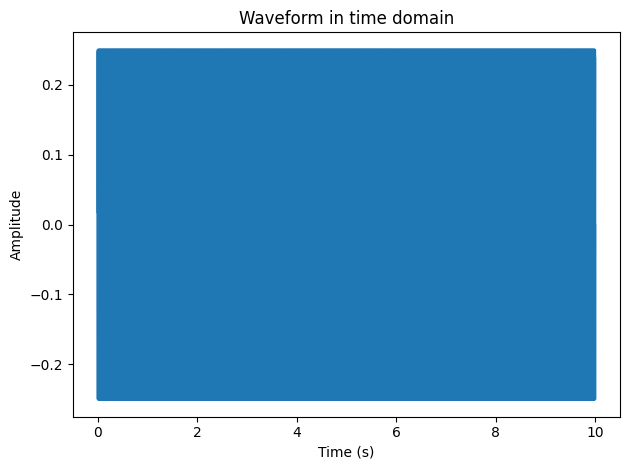

In [23]:
## Define the sound source with 500Hz sin wave
mic_signals_multi, fs, num_channels= soundread('/content/Classical-Sound-Source-Localization-Algorithms-in-Spherical-Domain/Data/500Hz_sin.wav')
plot_wave(mic_signals_multi,fs)
# The spherical coordinate of sound source
Theta_l = 90/180 * np.pi
Phi_l = 180/180 * np.pi
source_pos_car = 50*radius * np.array([np.sin(Theta_l) * np.cos(Phi_l), np.sin(Theta_l) * np.sin(Phi_l), np.cos(Theta_l)])
source_pos_car_cal = source_pos_car + ori_coor
source_pos_car_list = [source_pos_car_cal]
signal_list = [mic_signals_multi]

In [24]:
anechoic_room = setRoom(room_dim, mic_arrays_car, source_pos_car_list, signal_list, "Anechoic")
reverberant_room ,rt60_est= setRoom(room_dim, mic_arrays_car, source_pos_car_list, signal_list, "Reverb",0.4)

In [ ]:
signal_processed1 = soundread("/content/Classical-Sound-Source-Localization-Algorithms-in-Spherical-Domain/Anechoic/Array_output_0/source0.wav")
signal_processed2 = soundread("/content/Classical-Sound-Source-Localization-Algorithms-in-Spherical-Domain/Anechoic/Array_output_1/source0.wav")
mic_signals1 = signal_processed1[0]
mic_signals2 = signal_processed2[0]
fs = signal_processed1[1]

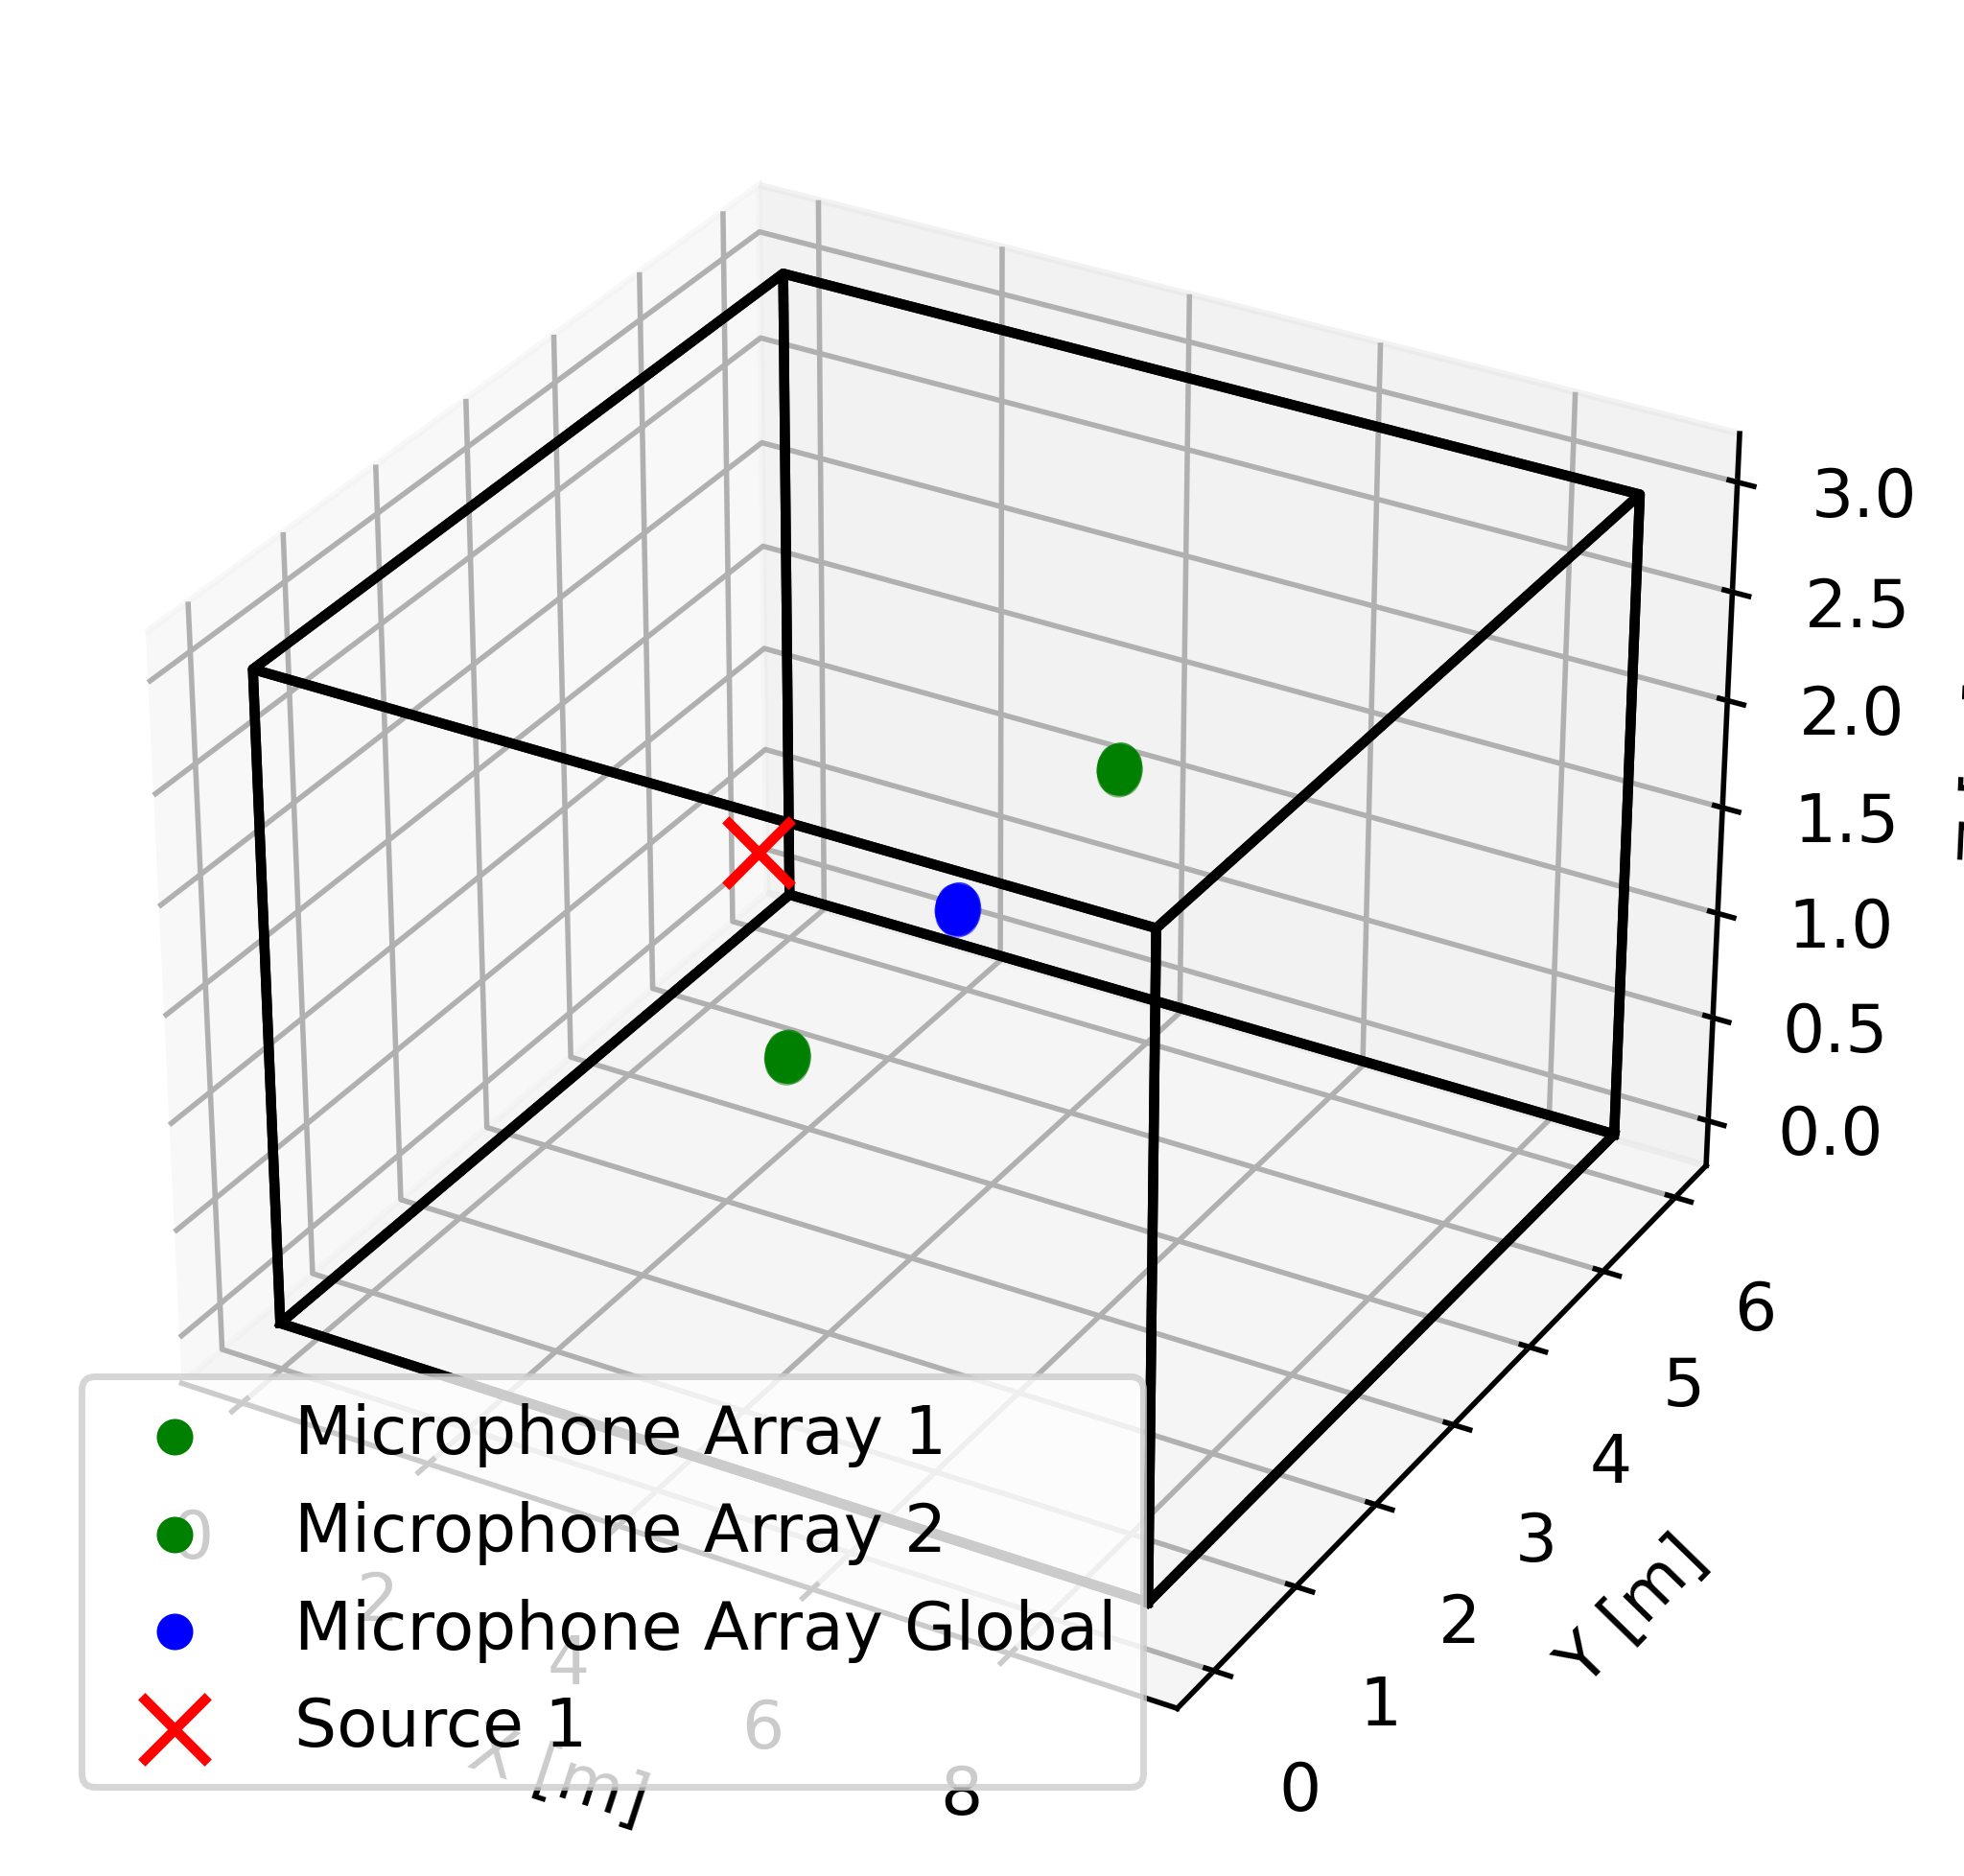

In [26]:

plot_option_multiArray(reverberant_room, mic_arrays_car, source_pos_car_list)

In [18]:
# set sound source position
from tools import calculate_spherical_coordinates
mic_arrays_center1 = np.array([0,-2,0]) + ori_coor
mic_arrays_center2 = np.array([0,2,0]) + ori_coor
r1, theta1, phi1 = calculate_spherical_coordinates(source_pos_car_cal, mic_arrays_center1)
r2, theta2, phi2 = calculate_spherical_coordinates(source_pos_car_cal, mic_arrays_center2)


Seen from local coordinate of Microphone array 1

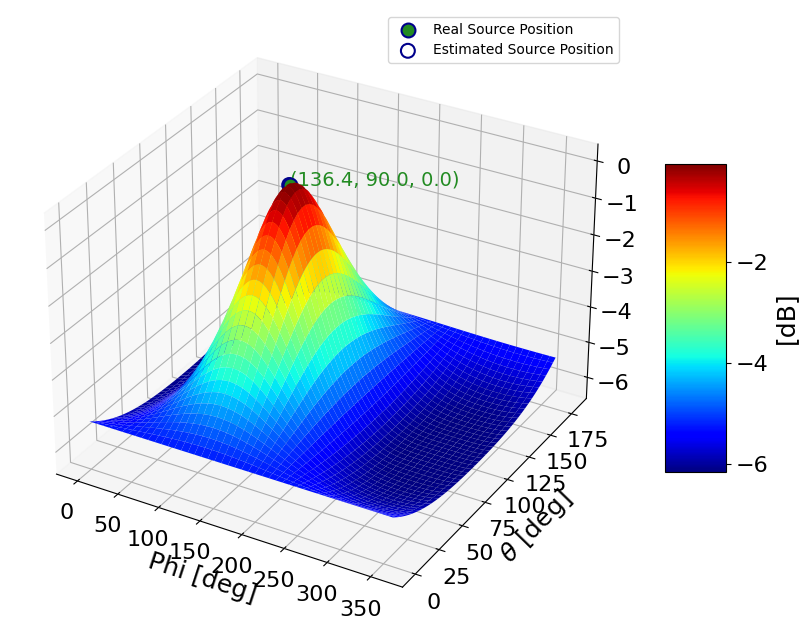

In [29]:
out1, est1= ssl_SHmethod_broad(mic_signals1,fs,mic_pos_sph1,theta1,phi1,"SHMUSIC","rigid","3D",resolution=1,num_sources=1)

Seen from local coordinate of Microphone array 2|

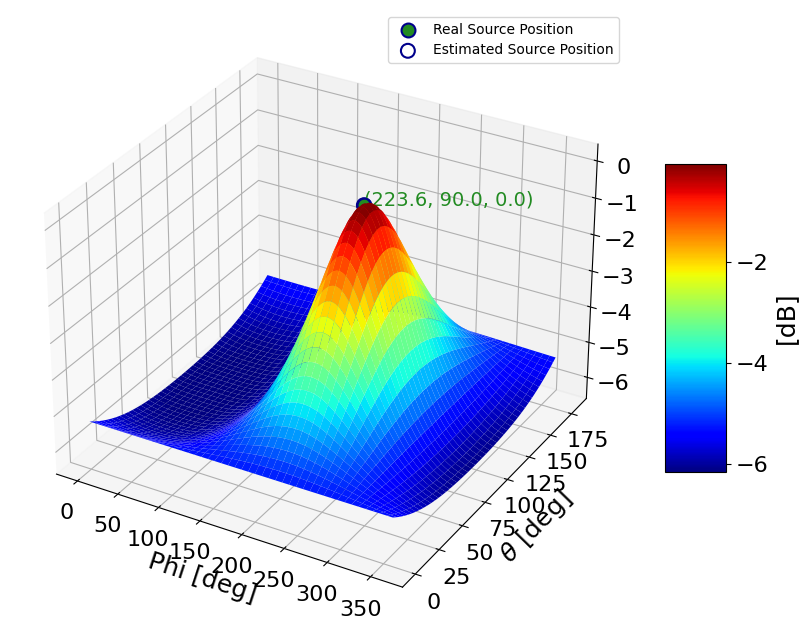

In [30]:
out2, est2 = ssl_SHmethod_broad(mic_signals2,fs,mic_pos_sph2,theta2,phi2,"SHMUSIC","rigid","3D",resolution=1)

We have obtained localization results from a local coordinate system centered on the origin of the two microphone arrays. Now, we will fuse the localization results from these two local coordinate systems and project them to the global coordinate system through coordinate transformation, which provides a data enhancement effect.

In [31]:
source_pos_local1 = sph2cart(r1,theta1,phi1)
source_pos_local2 = sph2cart(r2,theta2,phi2)

source_pos_global1 = mic_arrays_center1 + source_pos_local1
source_pos_global2 = mic_arrays_center2 + source_pos_local2
source_pos_global = (source_pos_global1 + source_pos_global2) / 2

mic_pos_sph_cal1 = cart2sph(mic_pos_car1 + np.array([0,-2,0]))
mic_pos_sph_cal2 = cart2sph(mic_pos_car2 + np.array([0,2,0]))

mic_arrays_pos_sph_list = [mic_pos_sph_cal1,mic_pos_sph_cal2]
mic_signals_list = [mic_signals1,mic_signals2]

r_ol1 = mic_arrays_center1 - ori_coor
r_ol2 = mic_arrays_center2 - ori_coor

azimuth = Phi_l
elevation = Theta_l
y_s = np.array([np.sin(elevation) * np.cos(azimuth), np.sin(elevation) * np.sin(azimuth), np.cos(elevation)])

r_t1 = mic_pos_car_cal1 - mic_arrays_center1
r_t2 = mic_pos_car_cal2 - mic_arrays_center2

k = 2*np.pi*500/343

r_ol1_reshaped = r_ol1[np.newaxis, :]
r_ol2_reshaped = r_ol2[np.newaxis, :]

angle1 = np.arctan2(np.linalg.norm(r_ol1), np.linalg.norm(y_s))
angle2 = np.arctan2(np.linalg.norm(r_ol2), np.linalg.norm(y_s))

r_total1 = (r_ol1_reshaped + r_t1)
r_total2 = (r_ol2_reshaped + r_t2)
phase_shift1 = np.exp(1j * k * np.dot(r_total1, y_s))
phase_shift2 = np.exp(1j * k * np.dot(r_total2, y_s))


# enhance the global signal
mic_signals_global1 = mic_signals1 * phase_shift1[np.newaxis, :] * np.exp(1j * angle1)
mic_signals_global2 = mic_signals2 * phase_shift2[np.newaxis, :] * np.exp(1j * angle2)

# combine
mic_signals_total = mic_signals_global1 + mic_signals_global2


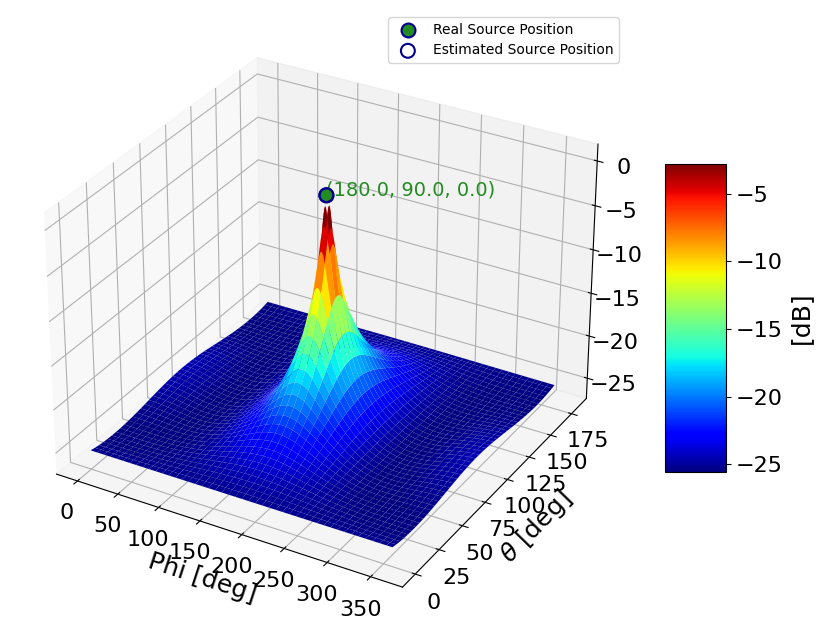

In [34]:
out_total, est_total = ssl_SHmethod_broad(mic_signals_total, fs, mic_pos_sph1, Theta_l,Phi_l,"SHMUSIC","rigid","3D",resolution=1)

#### Broadband speech signal

In [48]:
eigenmike1 = MicrophoneArray.EigenmikeEM32()
mic_pos_sph1 = []
radius = 0.042
for theta,phi in zip(eigenmike1._thetas, eigenmike1._phis):
    mic_pos_sph1.append([radius,theta,phi])
mic_pos_sph1 = np.array(mic_pos_sph1)
mic_pos_car1 = [sph2cart(r,theta,phi) for r,theta,phi in mic_pos_sph1]
mic_pos_car1 = np.array(mic_pos_car1)
mic_pos_car_cal1 = mic_pos_car1 + ori_coor+np.array([0, 0, 1]) # update the origin coordinates
# Define the second Eigenmike EM32 microphone array
eigenmike2 = MicrophoneArray.EigenmikeEM32()
mic_pos_sph2 = []
for theta,phi in zip(eigenmike2._thetas, eigenmike2._phis):
    mic_pos_sph2.append([radius,theta,phi])
mic_pos_sph2 = np.array(mic_pos_sph2)
mic_pos_car2 = [sph2cart(r,theta,phi) for r,theta,phi in mic_pos_sph2]
mic_pos_car2 = np.array(mic_pos_car2)
mic_pos_car_cal2 = mic_pos_car2 + ori_coor+np.array([0,0,-1])# update the origin coordinates
mic_pos_car_global = mic_pos_car1 + ori_coor
mic_arrays_car = [mic_pos_car_cal1,mic_pos_car_cal2, mic_pos_car_global]

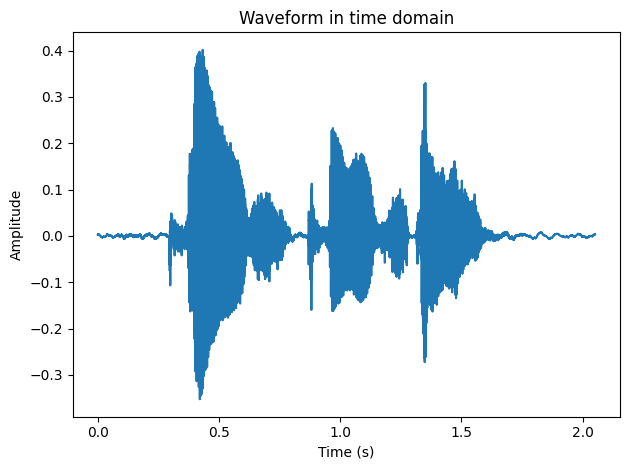

In [49]:
## Define the sound source with multiple-frequency components
mic_signals_multi, fs, num_channels= soundread('/content/Classical-Sound-Source-Localization-Algorithms-in-Spherical-Domain/Data/speech@24kHz.wav')
plot_wave(mic_signals_multi,fs)
# The spherical coordinate of sound source
Theta_l = 90/180 * np.pi
Phi_l = 180/180 * np.pi
source_pos_car = 50*radius * np.array([np.sin(Theta_l) * np.cos(Phi_l), np.sin(Theta_l) * np.sin(Phi_l), np.cos(Theta_l)])
source_pos_car_cal = source_pos_car + ori_coor
source_pos_car_list = [source_pos_car_cal]
signal_list = [mic_signals_multi]

In [50]:
anechoic_room = setRoom(room_dim, mic_arrays_car, source_pos_car_list, signal_list, "Anechoic")
reverberant_room ,rt60_est= setRoom(room_dim, mic_arrays_car, source_pos_car_list, signal_list, "Reverb",0.4)

In [51]:
signal_processed1 = soundread("/content/Classical-Sound-Source-Localization-Algorithms-in-Spherical-Domain/Anechoic/Array_output_0/source0.wav")
signal_processed2 = soundread("/content/Classical-Sound-Source-Localization-Algorithms-in-Spherical-Domain/Anechoic/Array_output_1/source0.wav")
mic_signals1 = signal_processed1[0]
mic_signals2 = signal_processed2[0]
fs = signal_processed1[1]

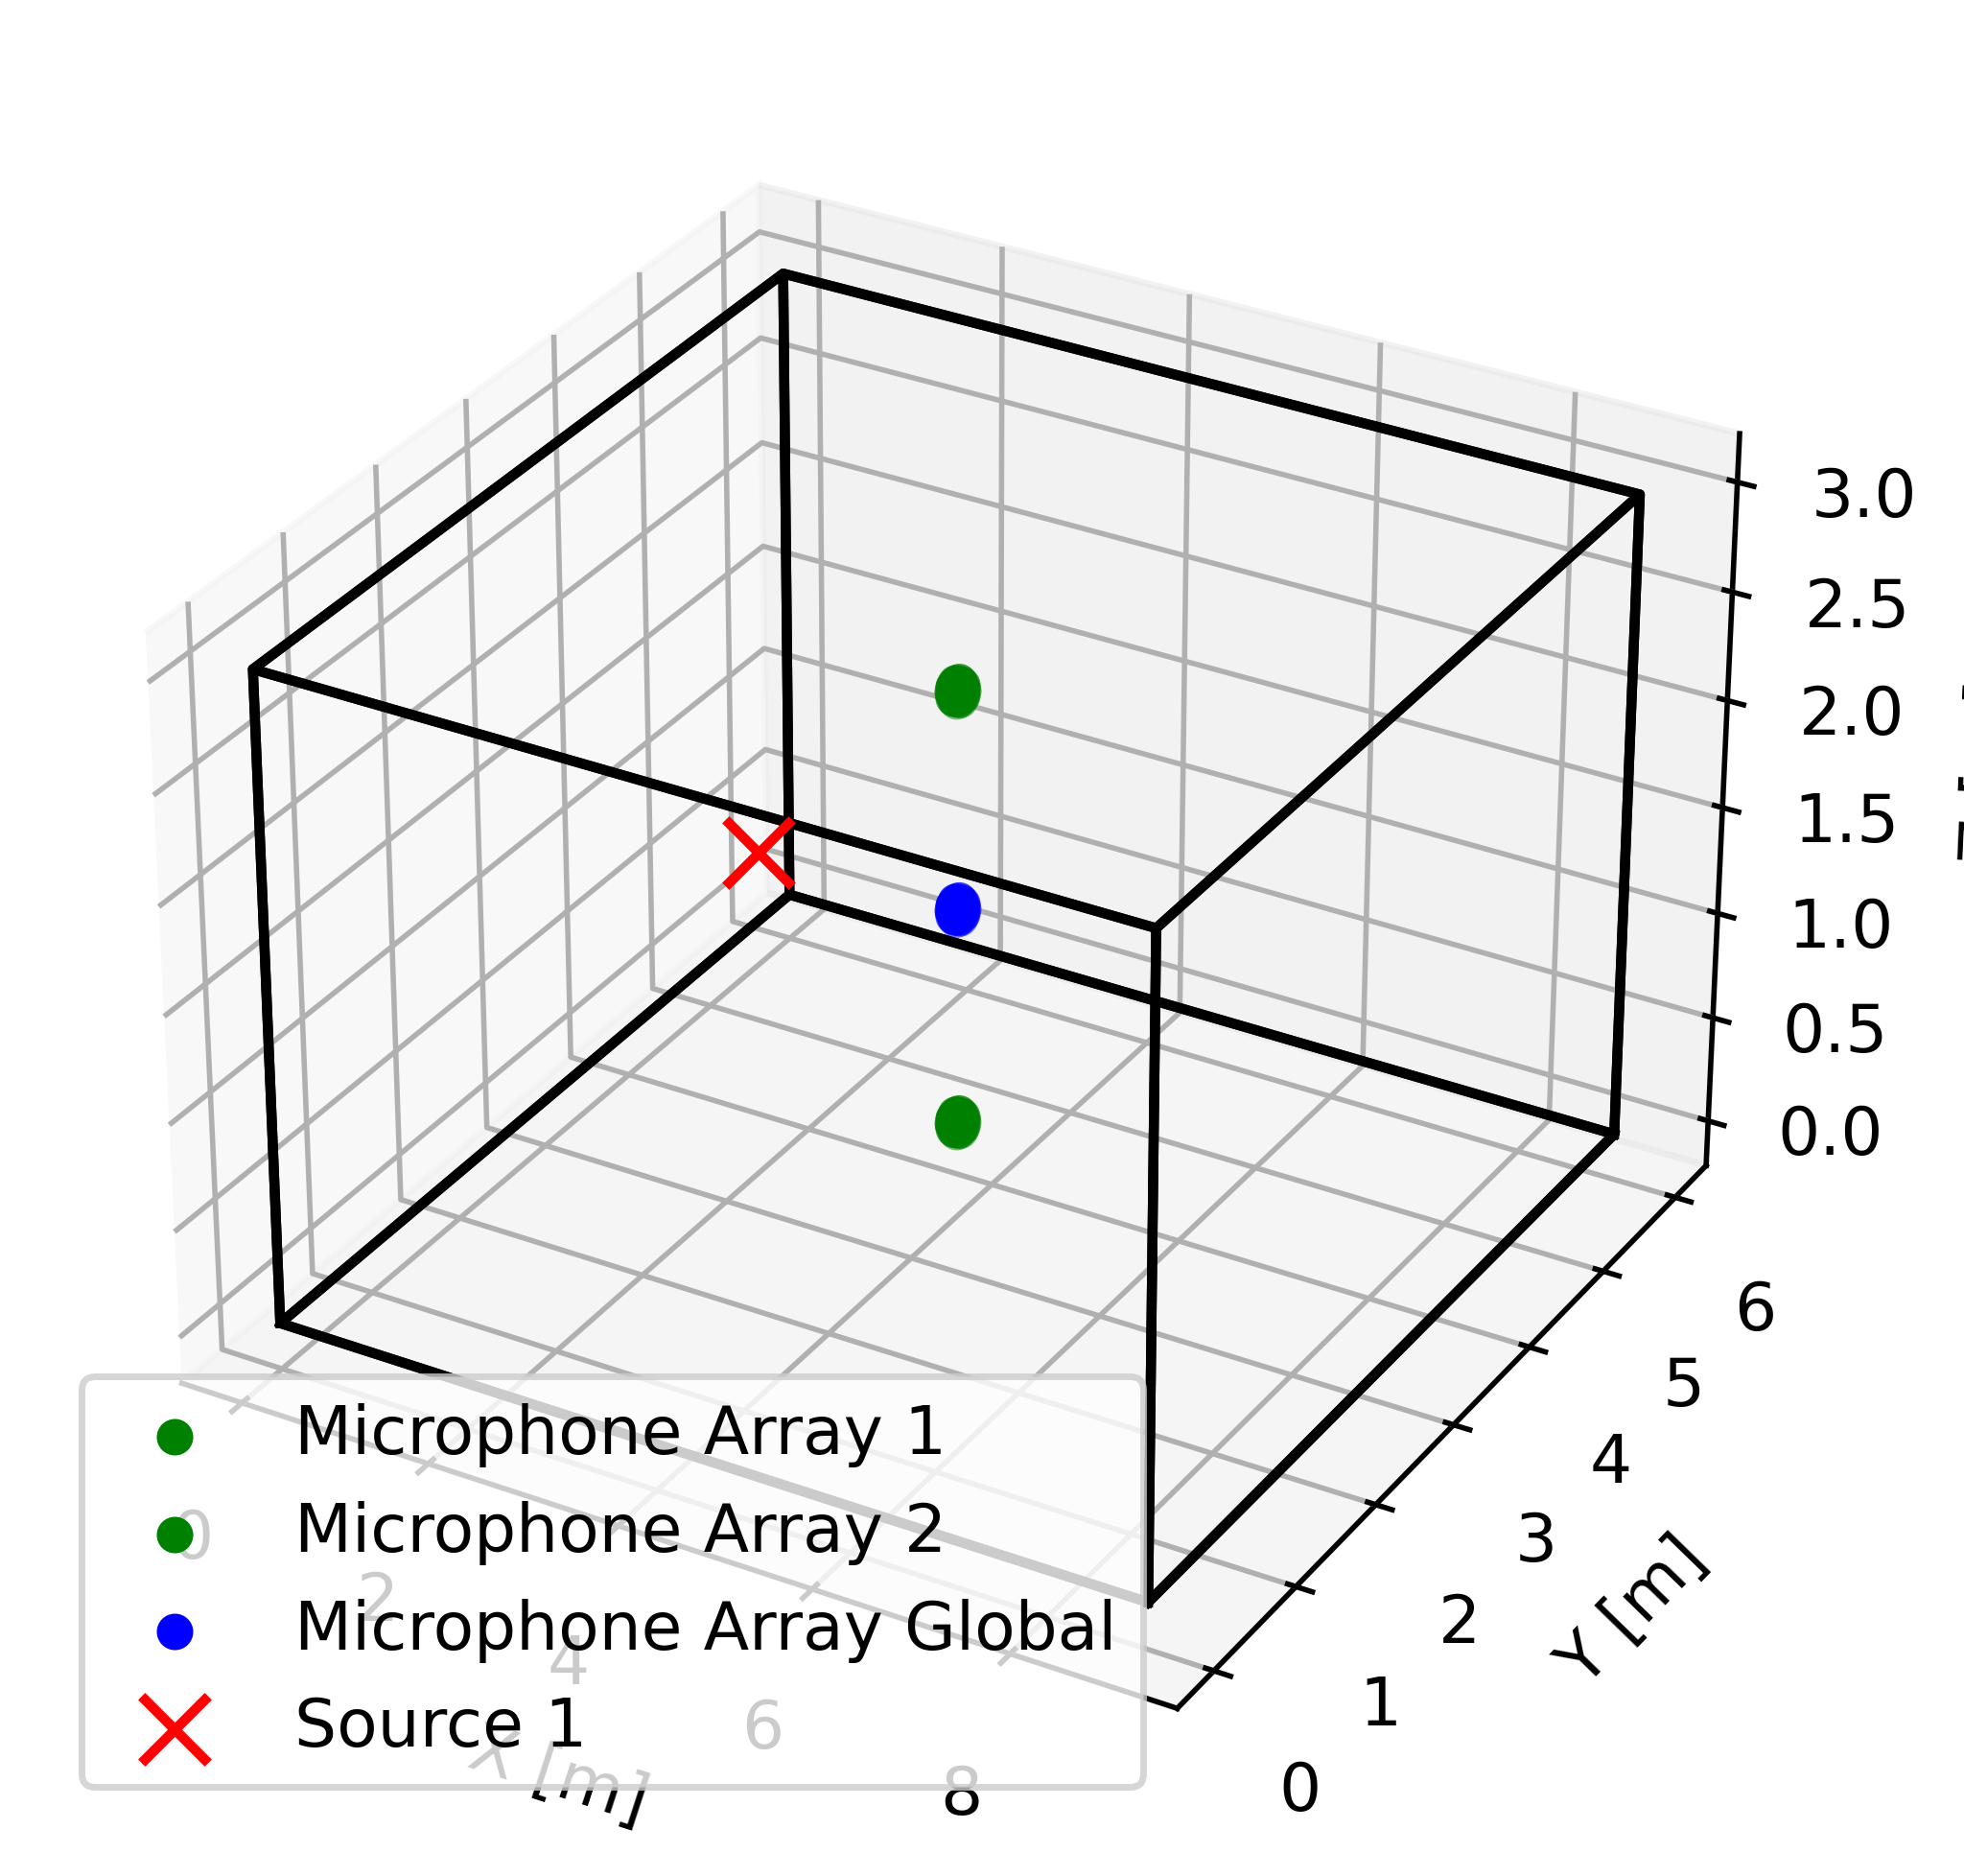

In [53]:
plot_option_multiArray(reverberant_room, mic_arrays_car, source_pos_car_list)

In [54]:
# Set sound source position
from tools import calculate_spherical_coordinates
mic_arrays_center1 = np.array([0, 0,1]) + ori_coor
mic_arrays_center2 = np.array([0,0,-1]) + ori_coor
r1, theta1, phi1 = calculate_spherical_coordinates(source_pos_car_cal, mic_arrays_center1)
r2, theta2, phi2 = calculate_spherical_coordinates(source_pos_car_cal, mic_arrays_center2)



d:\Coderlife\SSL in spherical domain\tools.py:659: RuntimeWarning: invalid value encountered in scalar divide
  bn[n ** 2:(n + 1) ** 2, k] = 4 * np.pi * (1j) ** n * (jn_ka - jn_ka_der / hn2_ka_der * hn2_ka)


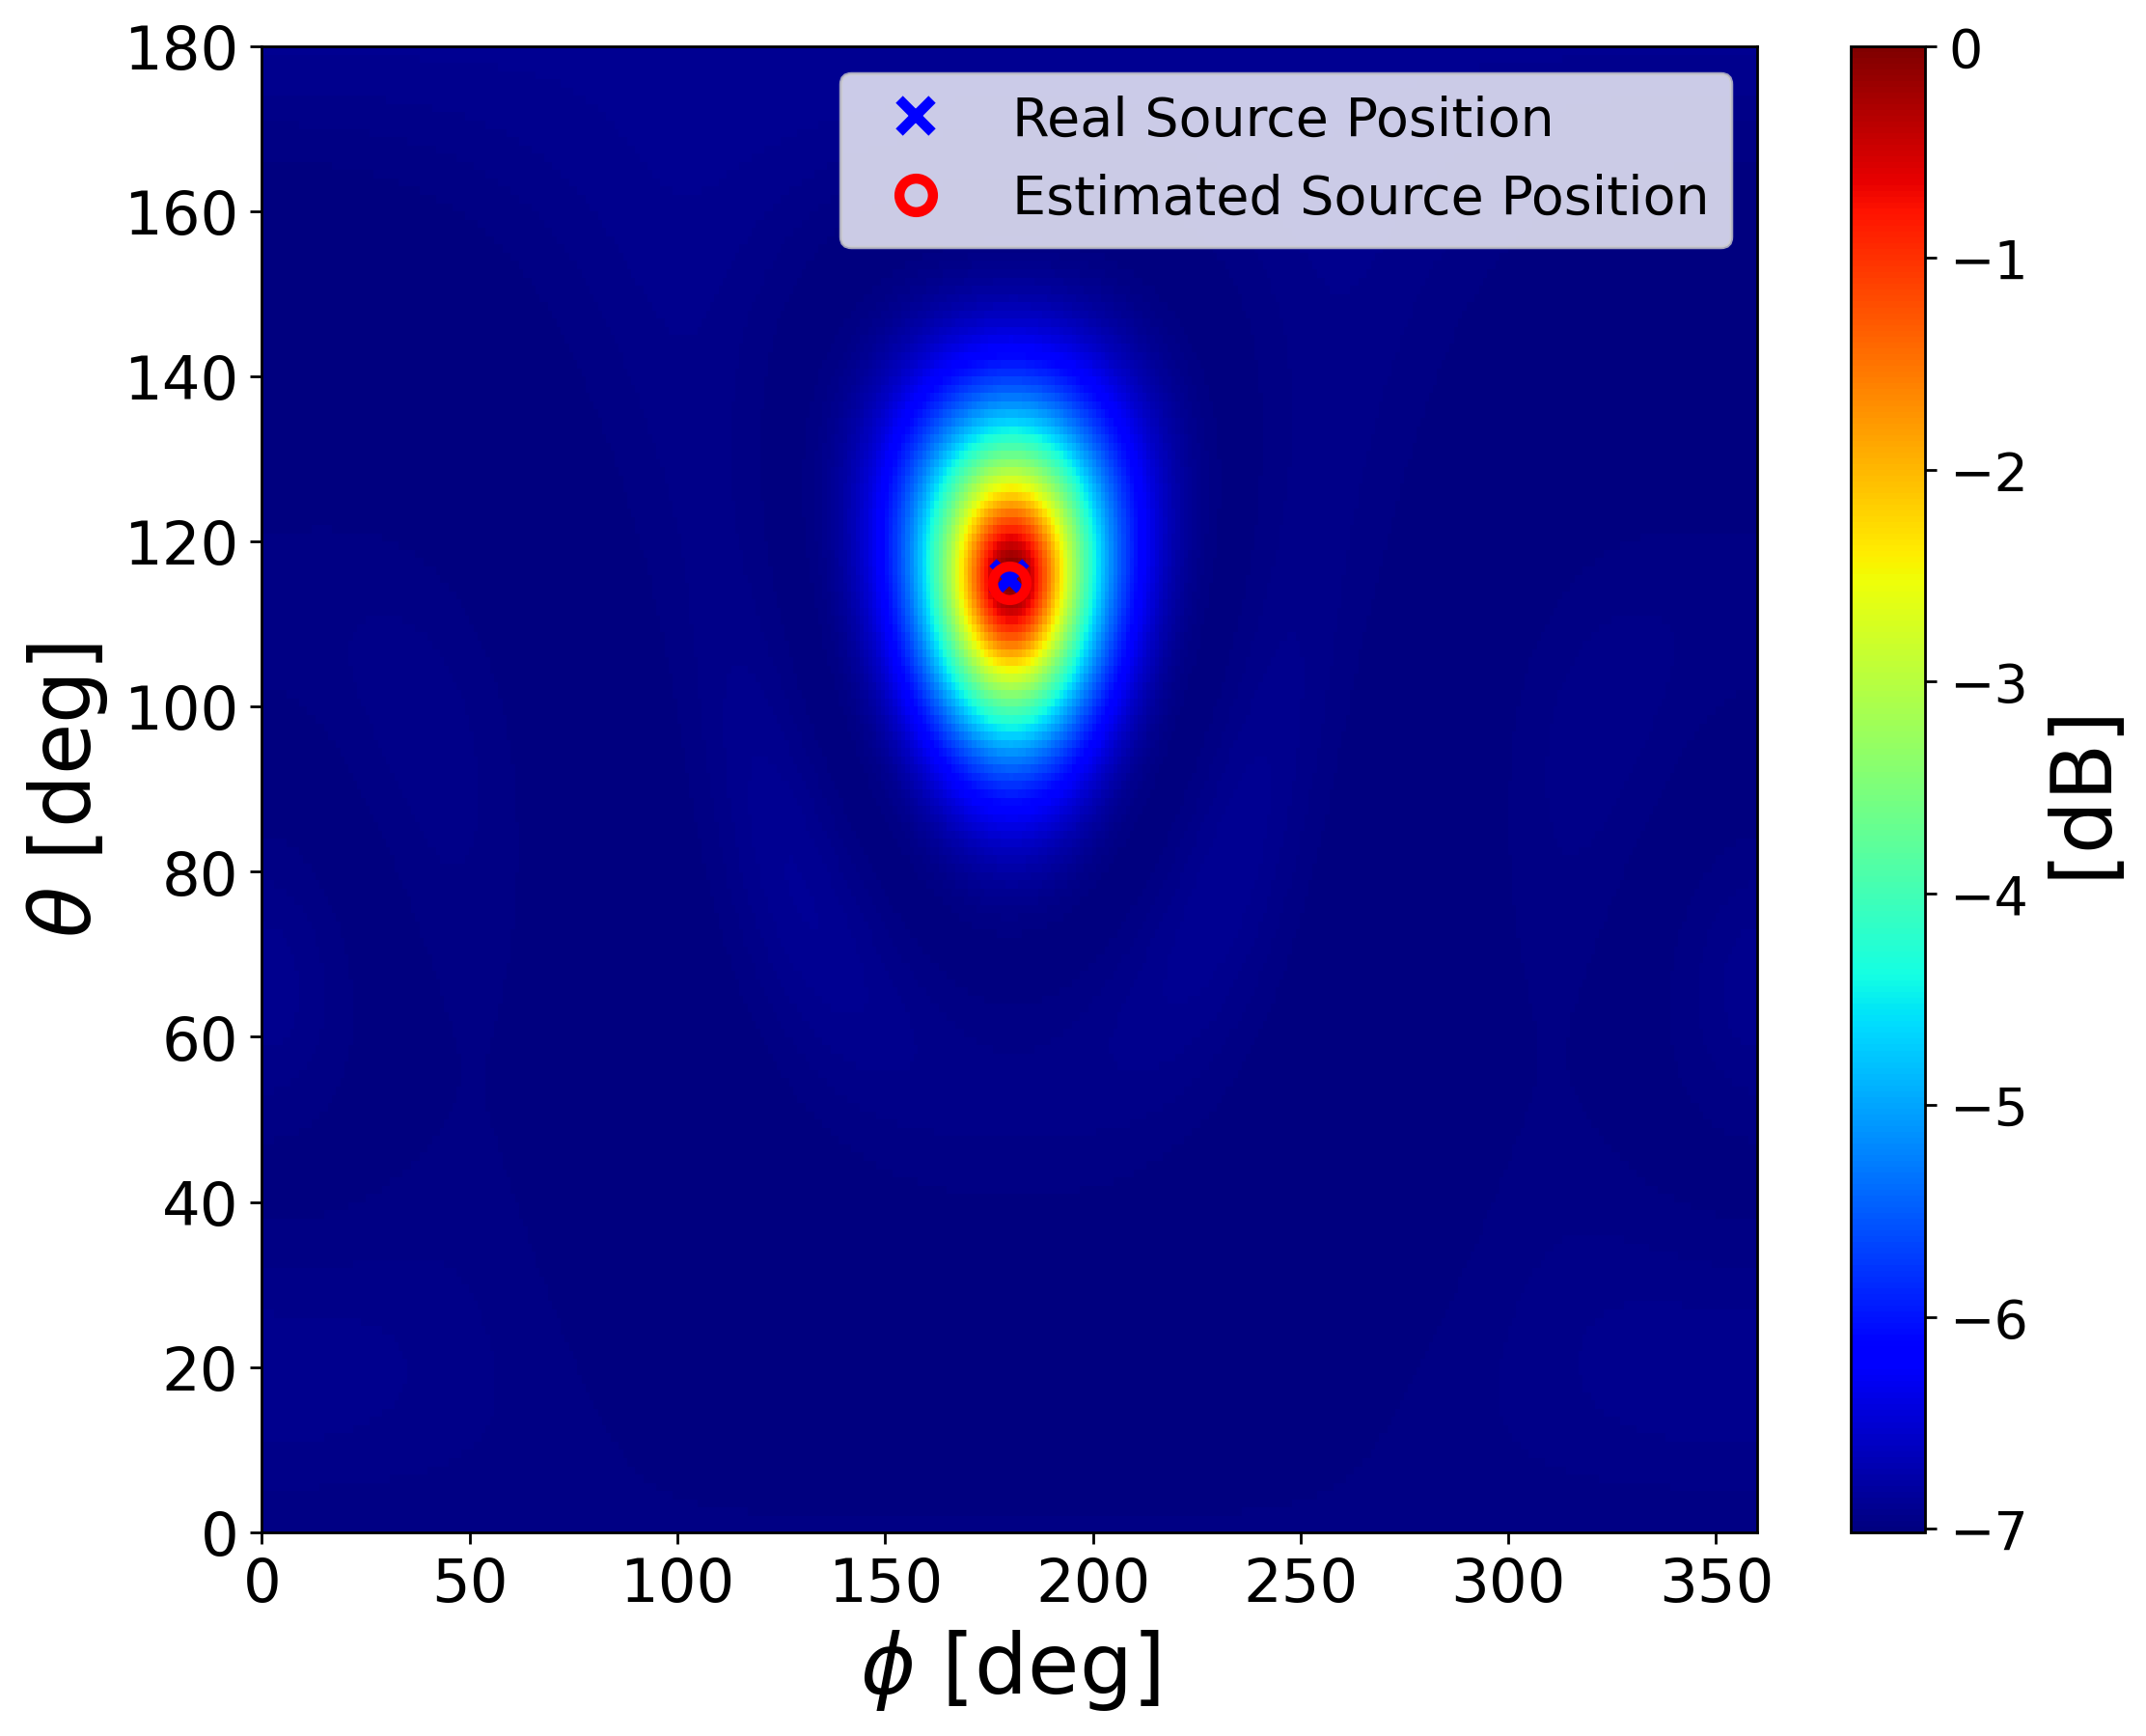

In [55]:
out1, est1= ssl_SHmethod_broad(mic_signals1,fs,mic_pos_sph1,theta1,phi1,"SHMUSIC","rigid","2D",resolution=1,num_sources=1)

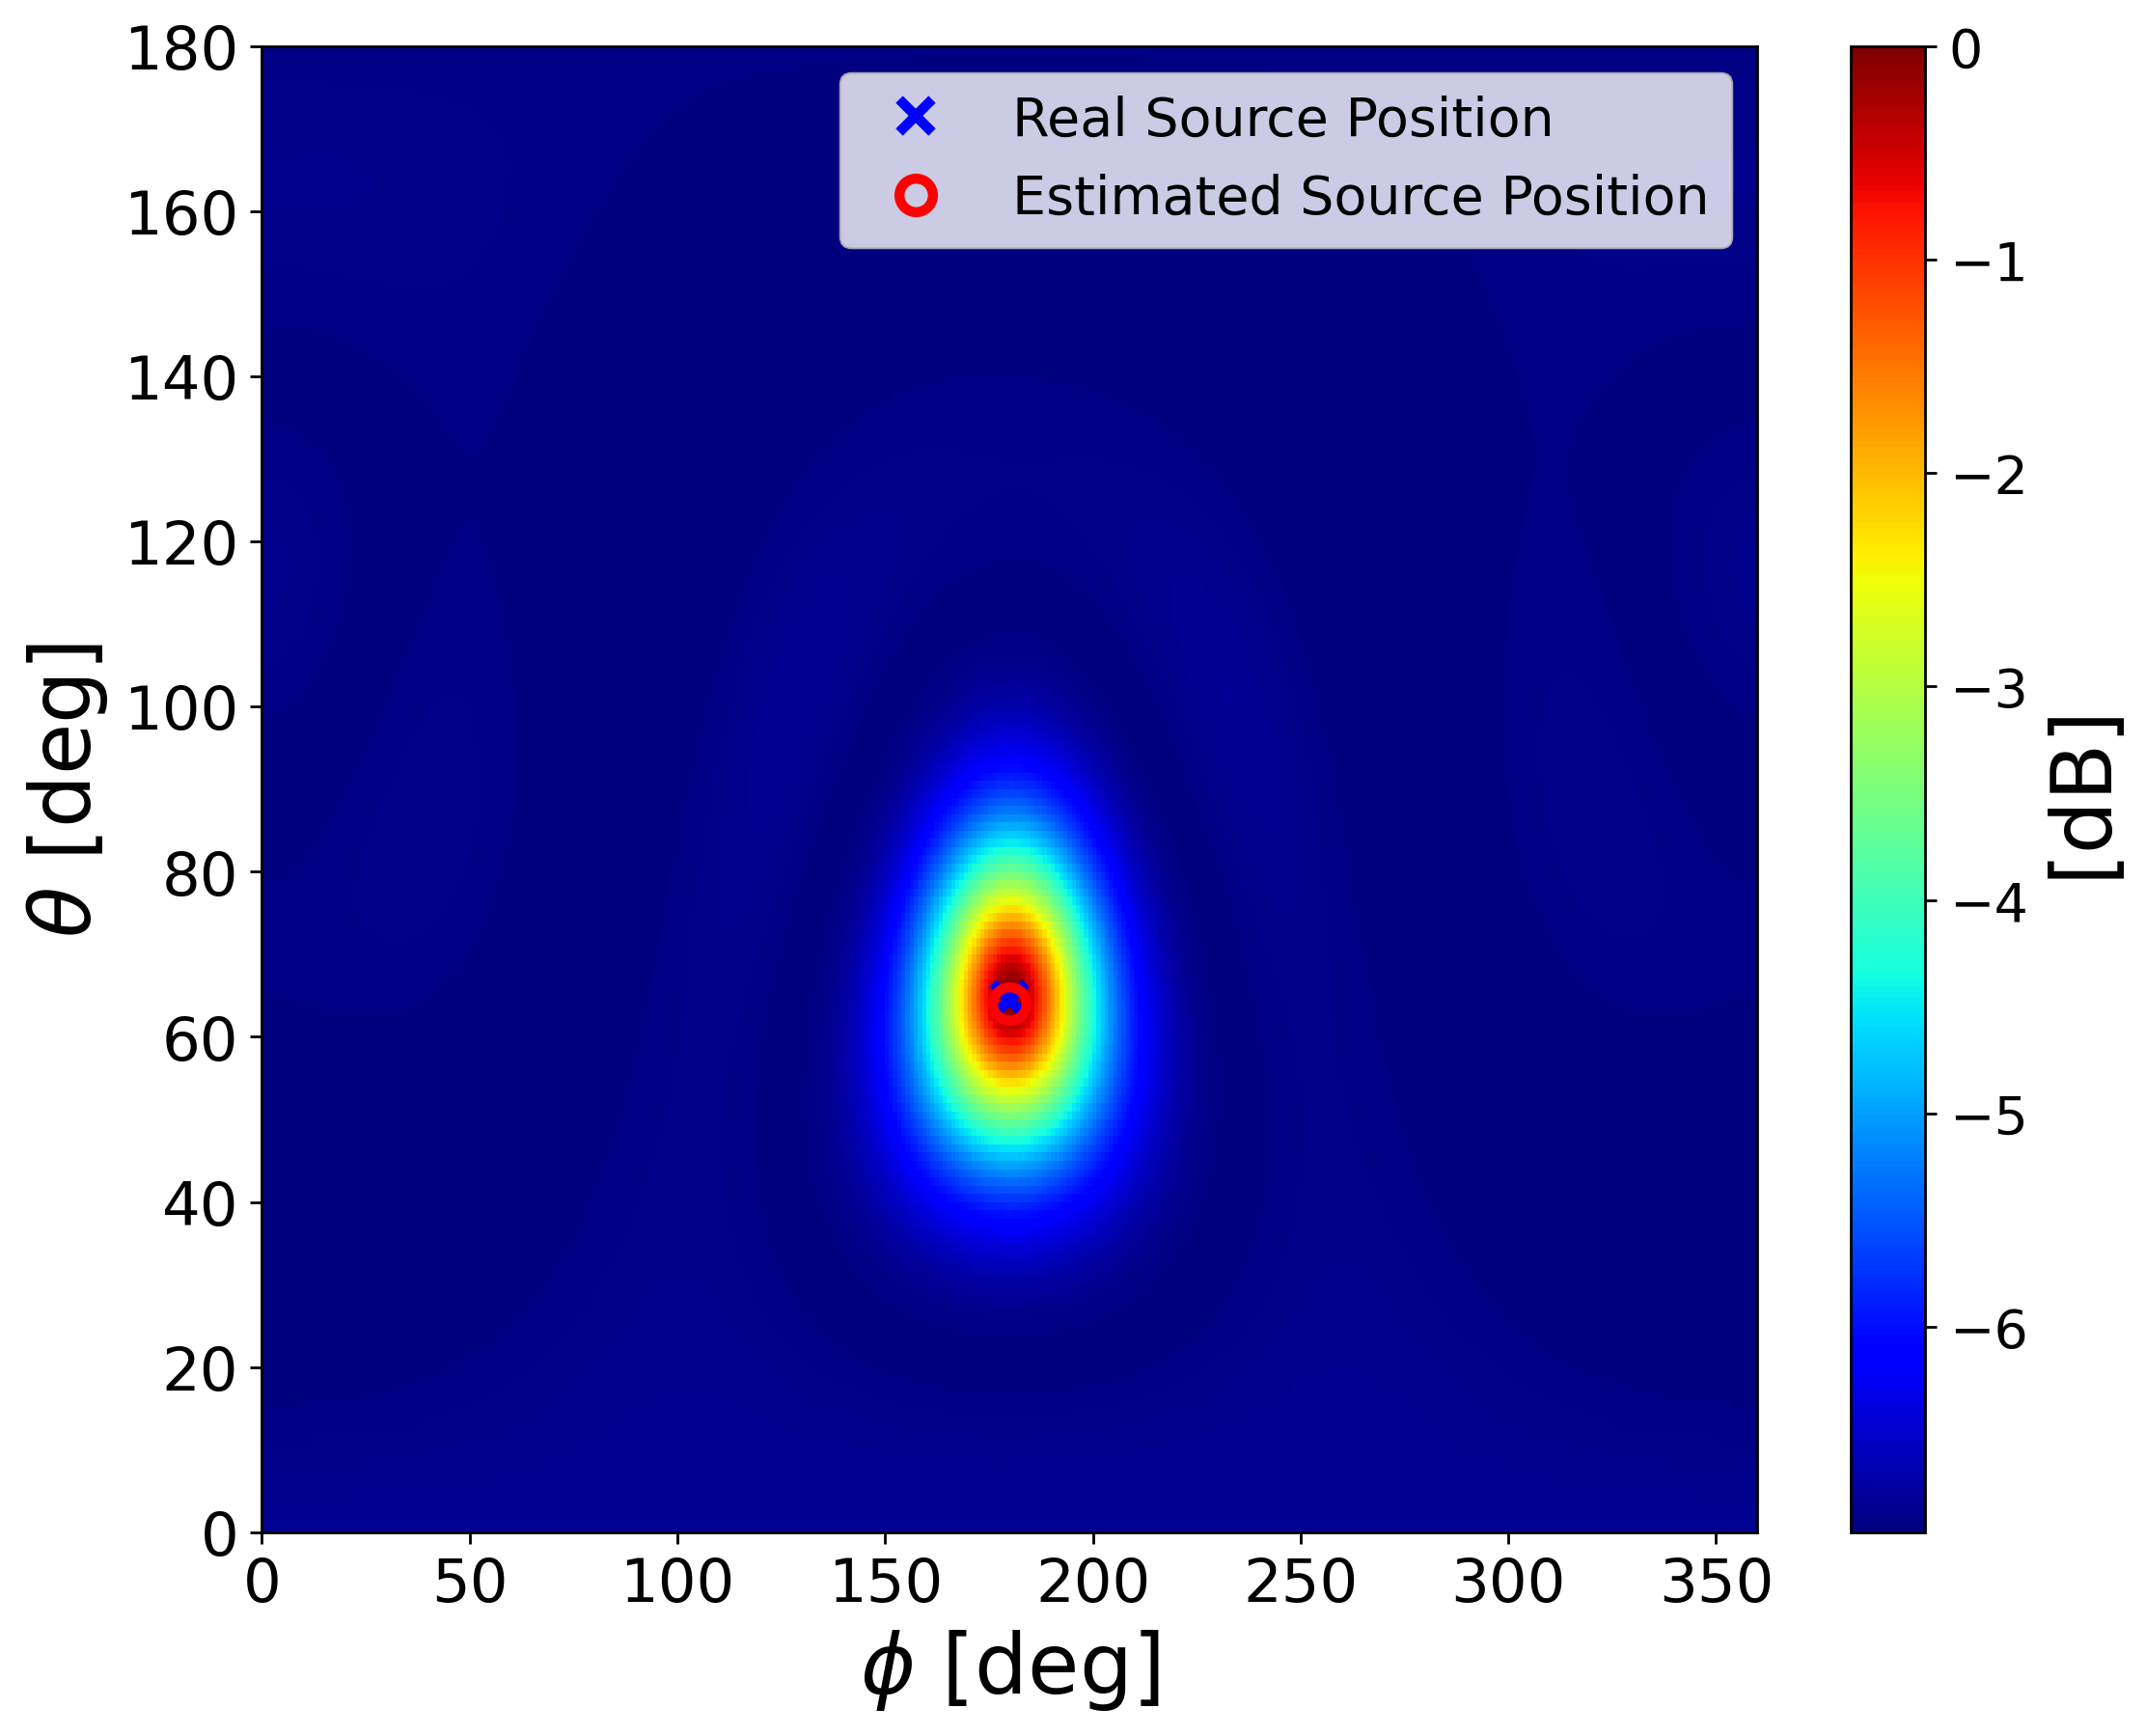

In [56]:
out2, est2 = ssl_SHmethod_broad(mic_signals2,fs,mic_pos_sph2,theta2,phi2,"SHMUSIC","rigid","2D",resolution=1)

In [58]:
import scipy
source_pos_local1 = sph2cart(r1,theta1,phi1)
source_pos_local2 = sph2cart(r2,theta2,phi2)

source_pos_global1 = mic_arrays_center1 + source_pos_local1
source_pos_global2 = mic_arrays_center2 + source_pos_local2
source_pos_global = (source_pos_global1 + source_pos_global2) / 2

mic_pos_sph_cal1 = cart2sph(mic_pos_car1 + np.array([0,0,1]))
mic_pos_sph_cal2 = cart2sph(mic_pos_car2 + np.array([0,0,-1]))

mic_arrays_pos_sph_list = [mic_pos_sph_cal1,mic_pos_sph_cal2]
mic_signals_list = [mic_signals1,mic_signals2]

r_ol1 = mic_arrays_center1 - ori_coor
r_ol2 = mic_arrays_center2 - ori_coor

azimuth = Phi_l
elevation = Theta_l
y_s = np.array([np.sin(elevation) * np.cos(azimuth), np.sin(elevation) * np.sin(azimuth), np.cos(elevation)])

r_t1 = mic_pos_car_cal1 - mic_arrays_center1
r_t2 = mic_pos_car_cal2 - mic_arrays_center2


# This is a broadband signal, transform the signal from the time domain to the stft domain, then phase transform the signal in the frequency domain
# Define the signal in the time domain and freqeuncy domain
from scipy import signal
winn = 256
nfft = 256
hop = winn // 2
# STFT
f1, t1, Sxx1 = signal.stft(mic_signals1[:, 0], fs, window='hann', nperseg=winn, noverlap=hop)
nbin1 = len(f1)
nframe1 = len(t1)
spectra1 = np.zeros((nbin1, nframe1, 32), dtype=complex)
for i in range(32):
    f1, t1, Sxx1 = signal.stft(mic_signals1[:, i], fs, window='hann', nperseg=winn, noverlap=hop)
    spectra1[:, :, i] = Sxx1
spectra1 = spectra1[1:, :, :]
nbin1 = spectra1.shape[0]
freq1 = np.arange(1, nfft // 2 + 1) * fs / nfft
f2, t2, Sxx2 = signal.stft(mic_signals2[:, 0], fs, window='hann', nperseg=winn, noverlap=hop)
nbin2 = len(f2)
nframe2 = len(t2)
spectra2 = np.zeros((nbin2, nframe2, 32), dtype=complex)
for i in range(32):
    f2, t2, Sxx2 = signal.stft(mic_signals2[:, i], fs, window='hann', nperseg=winn, noverlap=hop)
    spectra2[:, :, i] = Sxx2
spectra2 = spectra2[1:, :, :]
nbin2 = spectra2.shape[0]
freq2 = np.arange(1, nfft // 2 + 1) * fs / nfft

K = 1024
c = 343
N = 4

stft_global1 = np.zeros_like(spectra1)
stft_global2 = np.zeros_like(spectra2)

r_ol1_reshaped = r_ol1[np.newaxis, :]
r_ol2_reshaped = r_ol2[np.newaxis, :]

angle1 = np.arctan2(np.linalg.norm(r_ol1), np.linalg.norm(y_s))
angle2 = np.arctan2(np.linalg.norm(r_ol2), np.linalg.norm(y_s))

r_total1 = (r_ol1_reshaped + r_t1)
r_total2 = (r_ol2_reshaped + r_t2)
#phase_shift1 = np.exp(1j * k * np.dot(r_total1, y_s))
#phase_shift2 = np.exp(1j * k * np.dot(r_total2, y_s))

for idx in range(len(freq1)):
    freq = freq1[idx]
    k = 2 * np.pi * freq / 343
    phase_shift1 = np.exp(1j * k * np.dot(r_total1, y_s))
    phase_shift2 = np.exp(1j * k * np.dot(r_total2, y_s))

    stft_global1[idx, :] = spectra1[idx, :] * phase_shift1 * np.exp(1j * angle1)
    stft_global2[idx, :] = spectra2[idx, :] * phase_shift2 * np.exp(1j * angle2)

# Initialize an array with the same shape as the original signal to store the ISTFT results
istft_results1 = np.zeros((49524, 32))
istft_results2 = np.zeros((49524, 32))

# Perform ISTFT for each channel of the first array
for ch in range(32):
    _, istft_result = scipy.signal.istft(stft_global1[:,:,ch], fs)
    if istft_result.shape[0] > istft_results1.shape[0]:
        istft_result = istft_result[:istft_results1.shape[0]]
    elif istft_result.shape[0] < istft_results1.shape[0]:
        pad_length = istft_results1.shape[0] - istft_result.shape[0]
        istft_result = np.pad(istft_result, (0, pad_length), 'constant')
    istft_results1[:, ch] = istft_result

# Perform ISTFT for each channel of the second array
for ch in range(32):
    _, istft_result = scipy.signal.istft(stft_global2[:,:,ch], fs)
    if istft_result.shape[0] > istft_results2.shape[0]:
        istft_result = istft_result[:istft_results2.shape[0]]
    elif istft_result.shape[0] < istft_results2.shape[0]:
        pad_length = istft_results2.shape[0] - istft_result.shape[0]
        istft_result = np.pad(istft_result, (0, pad_length), 'constant')
    istft_results2[:, ch] = istft_result

# Add the results of the two arrays
istft_results_total = istft_results1 + istft_results2

# Turning the signal back into the time domain using the inverse STFT
import scipy
_, mic_signals_global1 = scipy.signal.istft(stft_global1, fs)
_, mic_signals_global2 = scipy.signal.istft(stft_global2, fs)


# Adjusting the microphone signal
mic_signals_global1 = mic_signals1 * phase_shift1[np.newaxis, :] * np.exp(1j * angle1)
mic_signals_global2 = mic_signals2 * phase_shift2[np.newaxis, :] * np.exp(1j * angle2)

# Combined signals
mic_signals_total = mic_signals_global1 + mic_signals_global2


d:\Coderlife\SSL in spherical domain\tools.py:659: RuntimeWarning: invalid value encountered in scalar divide
  bn[n ** 2:(n + 1) ** 2, k] = 4 * np.pi * (1j) ** n * (jn_ka - jn_ka_der / hn2_ka_der * hn2_ka)


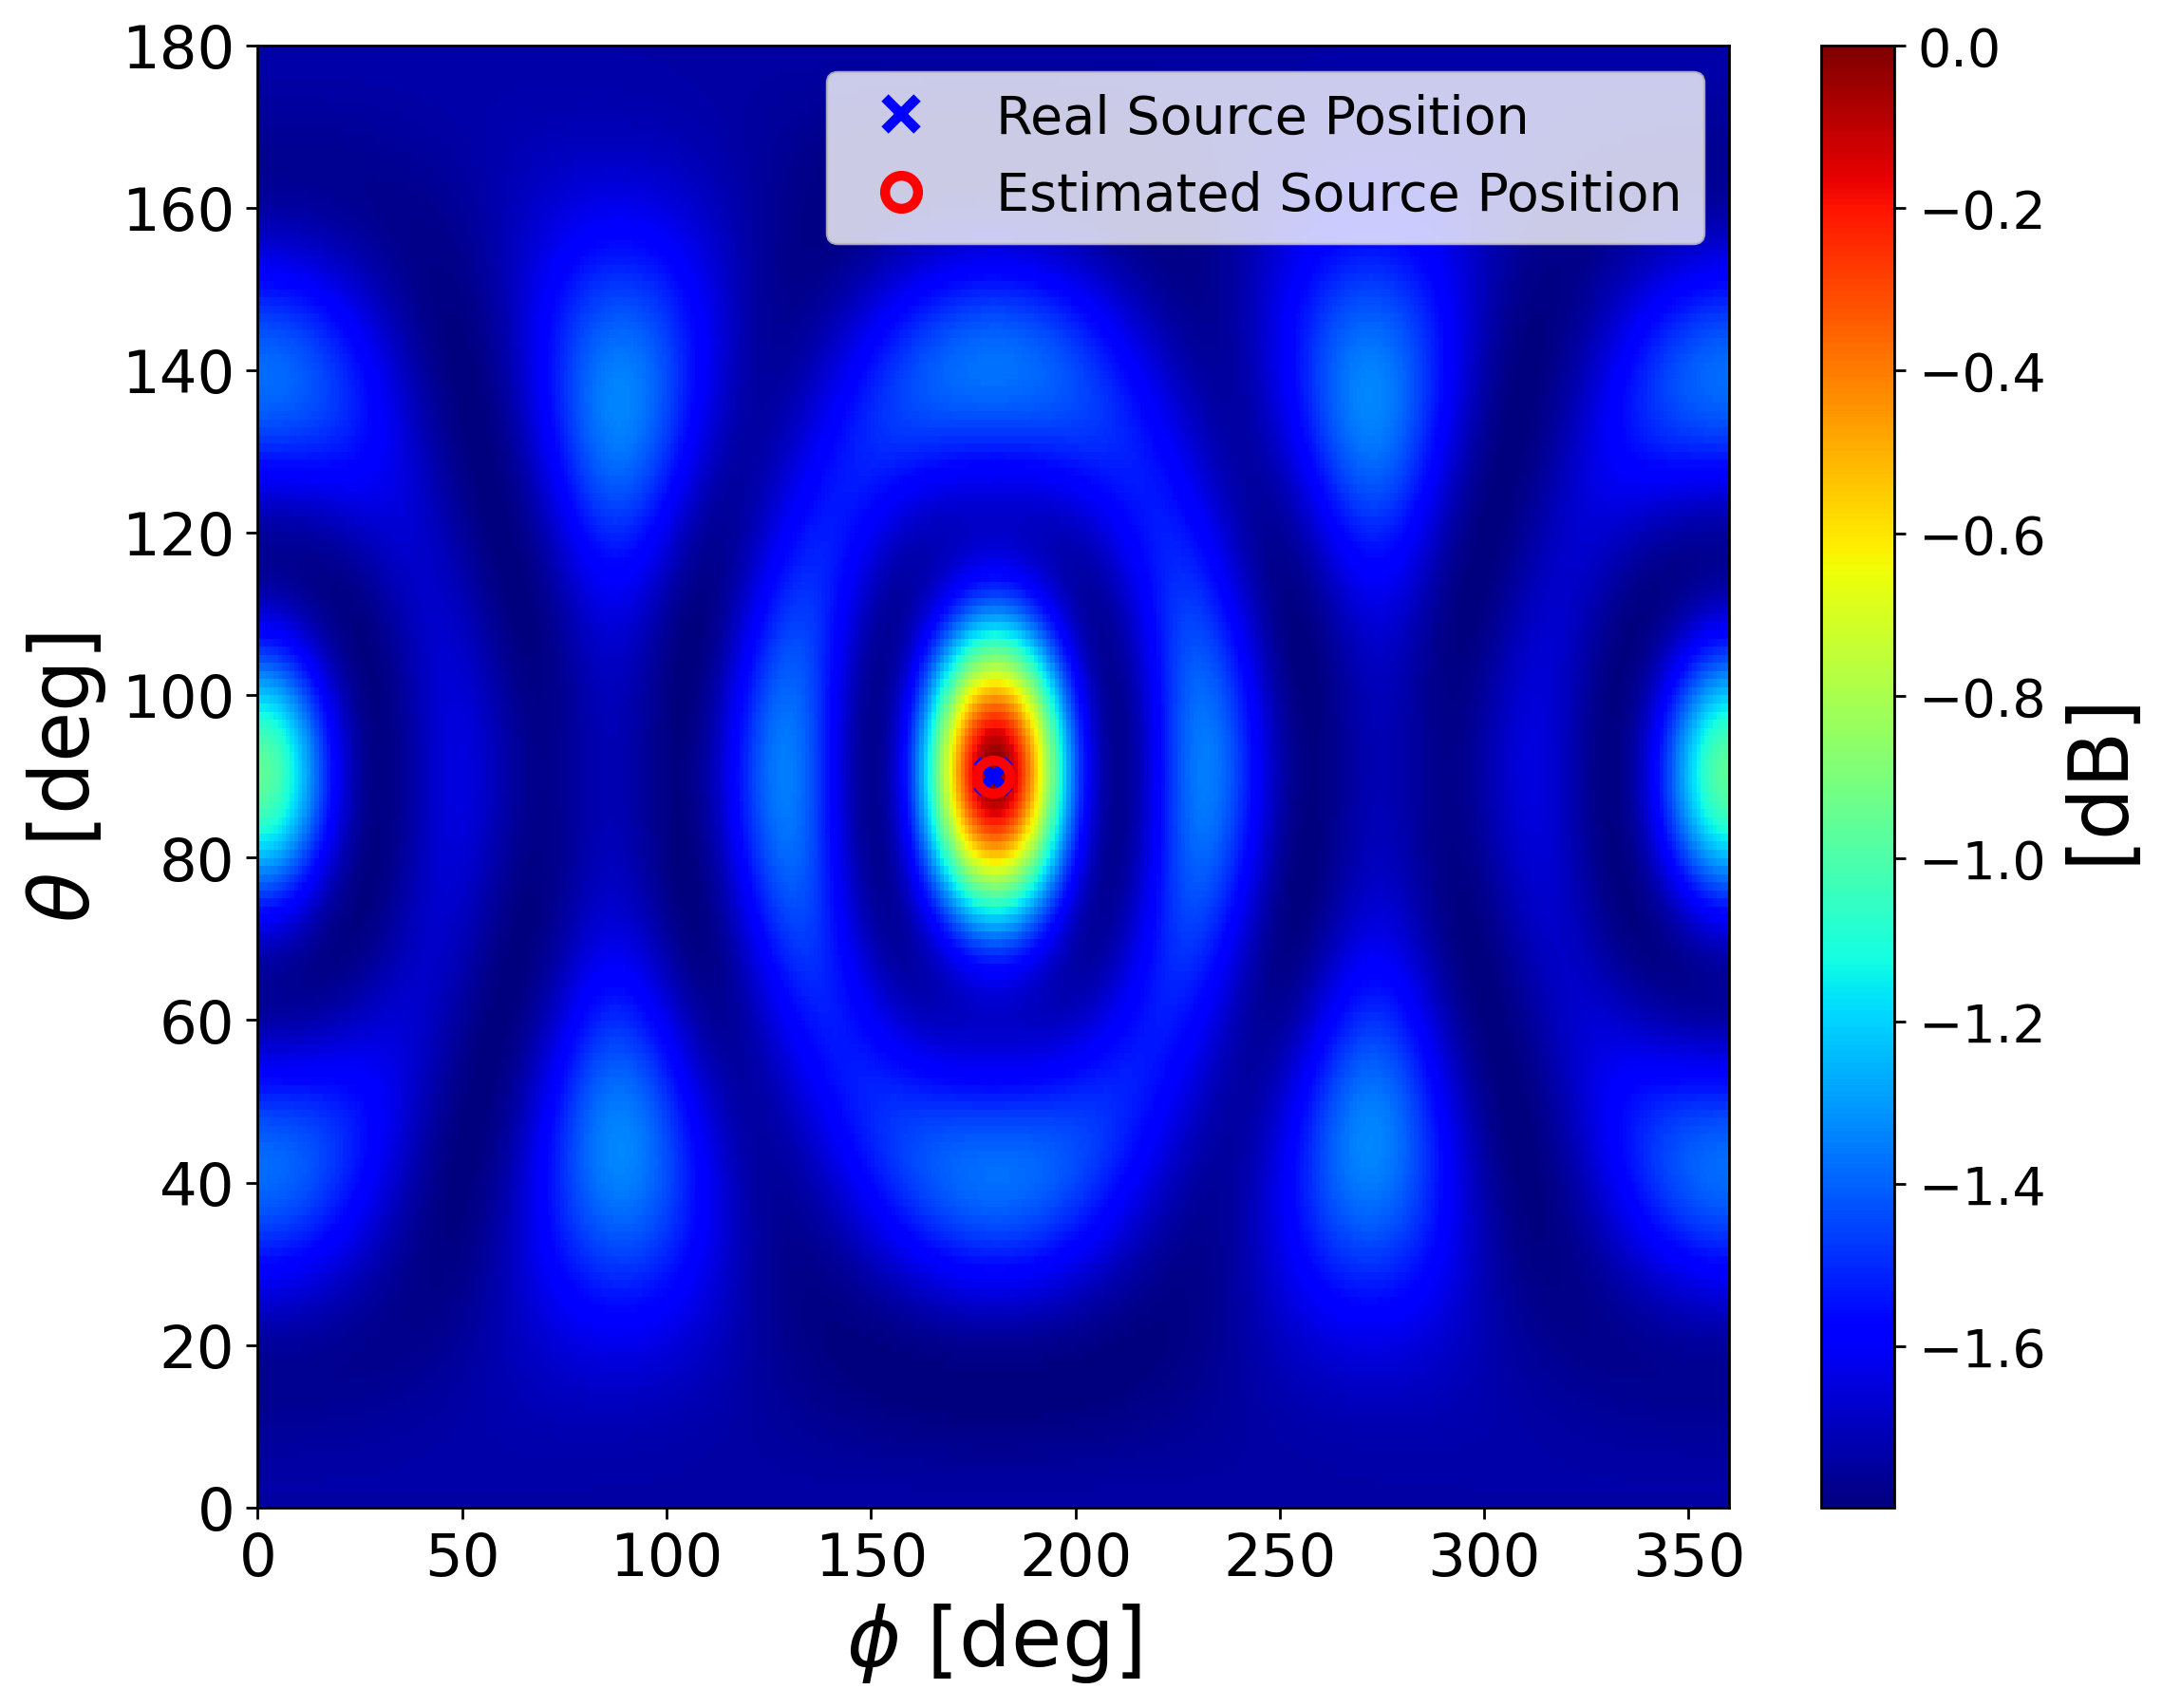

In [59]:
out_total, est_total = ssl_SHmethod_broad(istft_results_total, fs, mic_pos_sph1, Theta_l,Phi_l,"SHMUSIC","rigid","2D",resolution=1)

### Validating Algorithm Performance with Real Data

In the previous sections, we have introduced the principles of sound source localization, how to simulate, and how to locate single and multiple sound sources. In this section, we will discuss how to use real data sets for sound source localization.

The dataset used here is the Eigenmike em 32 Sound Impulse Response Dataset v0.1.0 from the METU SPARG Laboratory. This dataset was recorded in a highly reverberant rectangular room with dimensions $6.5 × 8.3 × 2.9 m^3$. The sound impulse responses were measured at 240 points on a grid with a horizontal resolution of 0.5 meters and a vertical resolution of 0.3 meters, covering the entire azimuthal range from 0° to 360° with respect to the array origin, and an elevation range of approximately ±50° from the horizontal plane. The measurement positions are shown below:

![Alt text](image-3.png)

The dataset was preprocessed by extracting the files in each folder and converting them to the corresponding DoA

In [ ]:

import math 

def calculate_DoA(X, Y, Z):
    x = (3 - X) * 0.5
    y = (3 - Y) * 0.5
    z = (2 - Z) * 0.3
    r = math.sqrt(x ** 2 + y ** 2 + z ** 2)
    
    theta_rad = math.acos(z / r)
    
    if z < 0:
        theta_rad = math.pi - theta_rad
    
    phi_rad = math.atan2(y, x) + math.pi

    if phi_rad < 0:
        phi_rad += 2 * math.pi
    
    return math.degrees(theta_rad), math.degrees(phi_rad)

directory = "/content/Classical-Sound-Source-Localization-Algorithms-in-Spherical-Domain/Data/spargair/em32"

# Create a dictionary to store each folder and corresponding DoA
folder_DoA_dict = {}

for folder in os.listdir(directory):
    try:
        X = int(folder[0])
        Y = int(folder[1])
        Z = int(folder[2])
        theta, phi = calculate_DoA(X, Y, Z)
        folder_DoA_dict[folder] = (theta, phi)
    except ValueError:
        print(f"Skipping folder {folder}, as it does not math the expected format.")
        continue

# Print the transform result
for folder, (theta, phi) in folder_DoA_dict.items():
    print(f"Folder: {folder}, DoA (theta, phi): ({theta}, {phi})")


Folder: 000, DoA (theta, phi): (74.20683095173604, 225.0)
Folder: 001, DoA (theta, phi): (81.95053302447161, 225.0)
Folder: 002, DoA (theta, phi): (90.0, 225.0)
Folder: 003, DoA (theta, phi): (81.9505330244716, 225.0)
Folder: 004, DoA (theta, phi): (74.20683095173602, 225.0)
Folder: 010, DoA (theta, phi): (71.59151982941417, 213.69006752597977)
Folder: 011, DoA (theta, phi): (80.55198356479771, 213.69006752597977)
Folder: 012, DoA (theta, phi): (90.0, 213.69006752597977)
Folder: 013, DoA (theta, phi): (80.5519835647977, 213.69006752597977)
Folder: 014, DoA (theta, phi): (71.59151982941417, 213.69006752597977)
Folder: 020, DoA (theta, phi): (69.21958251233642, 198.434948822922)
Folder: 021, DoA (theta, phi): (79.25659619822405, 198.434948822922)
Folder: 022, DoA (theta, phi): (90.0, 198.434948822922)
Folder: 023, DoA (theta, phi): (79.25659619822403, 198.434948822922)
Folder: 024, DoA (theta, phi): (69.21958251233642, 198.434948822922)
Folder: 030, DoA (theta, phi): (68.19859051364818, 

So now consider locating Folder 032 as an example, corresponding to the real DoA of $(90\degree, 180\degree)$.

In [ ]:
Theta_l = 90/180 * np.pi
Phi_l = 180/180 * np.pi

In [ ]:
# set the data file direction
data_path = '/content/Classical-Sound-Source-Localization-Algorithms-in-Spherical-Domain/Data/spargair/em32/032'
# get all the wav file in the folder
wav_files = [f for f in os.listdir(data_path) if f.endswith('.wav')]
fs = 48000

audio_data_list = []
# read each wav file
for wav_file in wav_files:
    file_path = os.path.join(data_path, wav_file)

    sample_rate, audio_data = wavfile.read(file_path)

    audio_data_list.append(audio_data)


In [ ]:
audio_data_array3 = np.stack(audio_data_list, axis=-1)
audio_data_array2 = np.stack(audio_data_list, axis=-1)
audio_data_array1 = np.stack(audio_data_list, axis=-1)
audio_data_array = audio_data_array1 + audio_data_array2 +audio_data_array3

d:\Coderlife\SSL in spherical domain\tools.py:658: RuntimeWarning: invalid value encountered in scalar divide
  


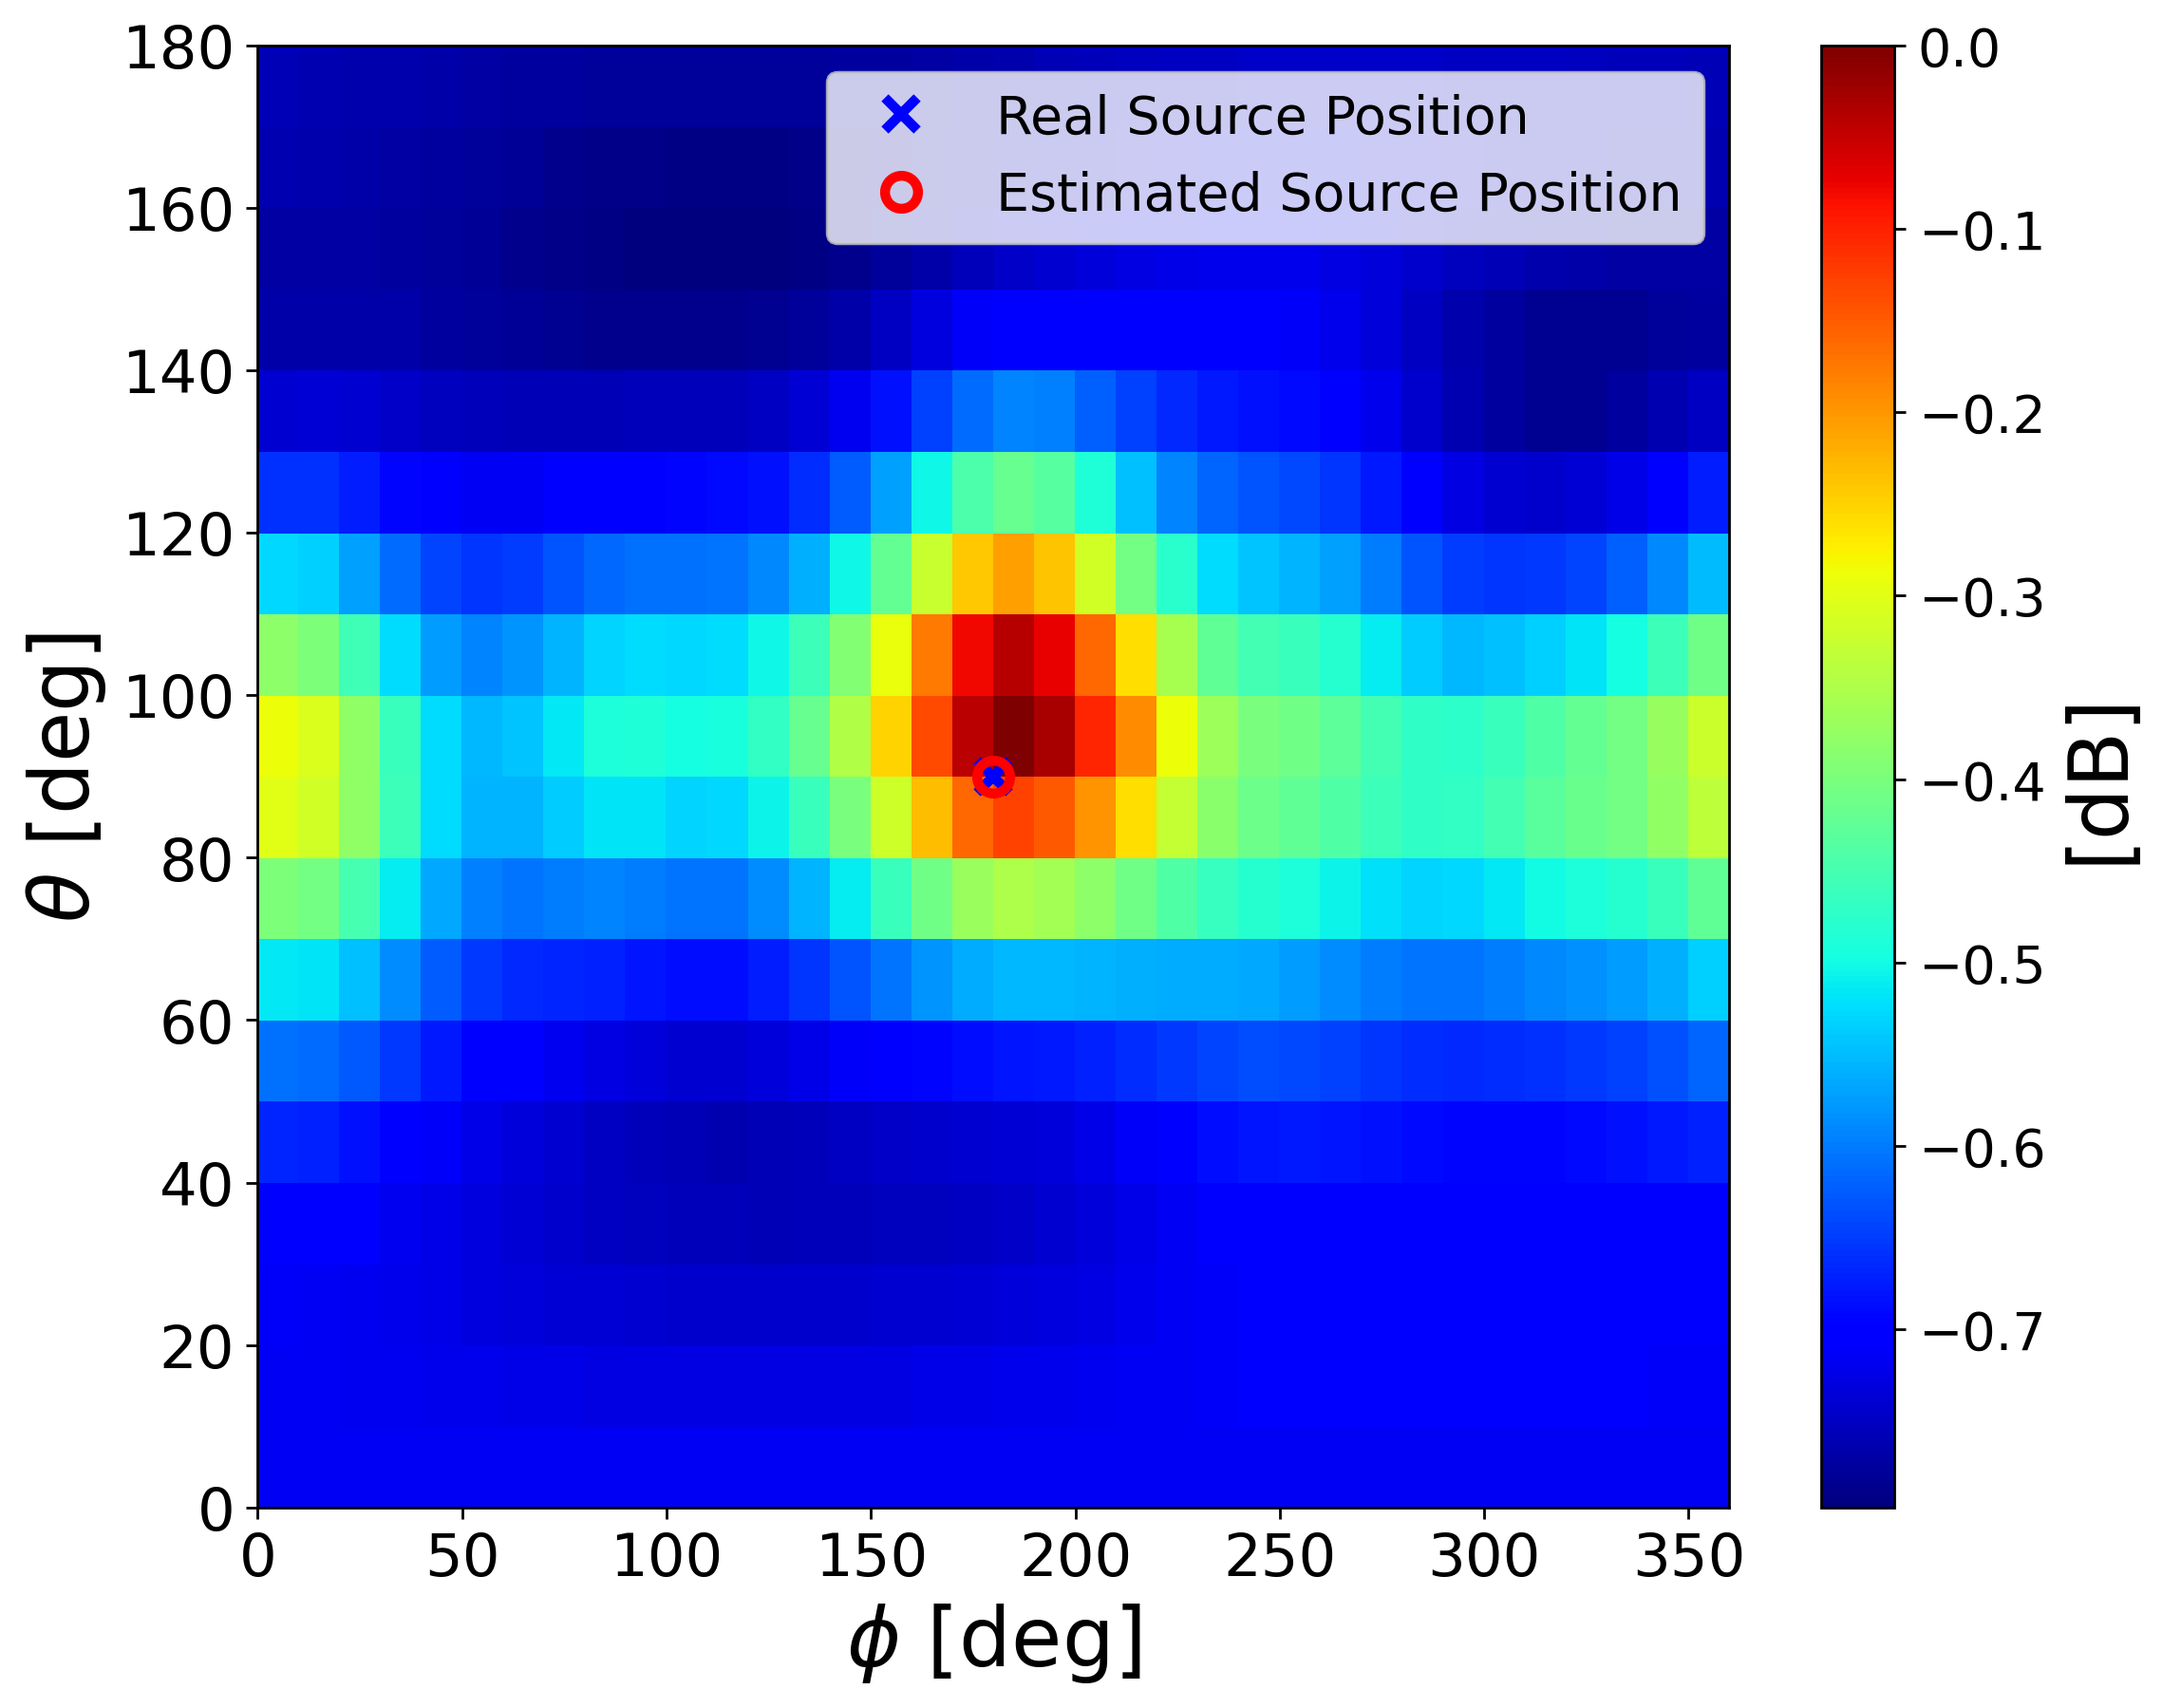

In [ ]:
out_MVDR, pos_MVDR = ssl_SHmethod_broad(audio_data_array,fs,mic_pos_sph,Theta_l,Phi_l,"SHMVDR","rigid","2D",resolution=1)

In [ ]:
out_SHMUSIC, pos_SHMUSIC = ssl_SHmethod_broad(audio_data_array,fs,mic_pos_sph,Theta_l,Phi_l,"SHMUSIC","rigid","2D",resolution=1)

In [ ]:
out_MLE, pos_MLE = ssl_SHmethod(audio_data_array,fs,mic_pos_sph,Theta_l,Phi_l,"SHMLE","rigid","2D",resolution=1)